In [3]:
# Normalise features
# Find the optimal parameters C (inverse regulalisation strengths)
# Find the best features to predict stock movement (up or down)
# Convert probability into absolute values (stock % increase/decrease)
# SVC, RandomForest, MinMax, LongShortTermMemory

%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell
from jupyterthemes import jtplot

#import classes
from company import Company
from onestep_baseline_company import OneStepBaselineCompany
from onestep_lstm_company import OneStepLSTMCompany
from multistep_baseline_company import MultiStepBaselineCompany
from multistep_lstm_company import MultiStepLSTMCompany

jtplot.style(theme='grade3')
jtplot.style(theme='grade3')
jtplot.style(theme='grade3')


Populating the interactive namespace from numpy and matplotlib


D:\Softwares\Miniconda3\envs\Hons\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [128]:
start_train_date = "01/01/2018"
end_train_start_test_date = "01/02/2018"
end_test_date = "01/03/2018"

one_step_lstm = OneStepLSTMCompany("MU", start_train_date, end_train_start_test_date, end_test_date, 
                         n_epochs=3000, n_batch=1, n_neurons=4)
one_step_lstm.train()


NameError: name 'OneStepLSTMCompany' is not defined

In [ ]:
predictions = one_step_lstm.predict()
one_step_lstm.plot(predictions)

lstm_score = one_step_lstm.score(metric="rmse", predictions=predictions)
print("LSTM RMSE Score: %.3f US dollar" % lstm_score)
trend_score = one_step_lstm.score(metric="trend", predictions=predictions)
print("LSTM trend Score: %.1f %%" % (trend_score*100))

print("\n")
one_day_pred = one_step_lstm.forecast_lstm_one_step()
one_step_lstm.plot(one_day_pred)

In [135]:
start_train_date = "01/01/2015"
end_train_start_test_date = "01/02/2017"
end_test_date = "01/03/2019"

multi_step_lstm = MultiStepLSTMCompany("MU", start_train_date, end_train_start_test_date, end_test_date, 
                         n_lag=30, n_seq=30, n_epochs=3000, n_batch=1, n_neurons=4)

multi_step_lstm.train()

'data series'

date
2015-01-02    34.750
2015-01-05    33.775
2015-01-06    32.870
2015-01-07    32.100
2015-01-08    33.670
2015-01-09    33.525
2015-01-12    31.660
2015-01-13    30.835
2015-01-14    30.050
2015-01-15    29.300
2015-01-16    28.990
2015-01-20    29.670
2015-01-21    30.490
2015-01-22    30.890
2015-01-23    30.950
2015-01-26    31.020
2015-01-27    29.650
2015-01-28    29.095
2015-01-29    29.710
2015-01-30    29.265
2015-02-02    28.435
2015-02-03    28.945
2015-02-04    29.030
2015-02-05    29.490
2015-02-06    28.910
2015-02-09    28.350
2015-02-10    31.090
2015-02-11    31.020
2015-02-12    31.940
2015-02-13    31.850
               ...  
2019-01-04    32.700
2019-01-07    34.000
2019-01-08    33.740
2019-01-09    35.440
2019-01-10    35.910
2019-01-11    36.010
2019-01-14    34.670
2019-01-15    33.990
2019-01-16    33.580
2019-01-17    33.880
2019-01-18    35.760
2019-01-22    33.870
2019-01-23    34.240
2019-01-24    36.590
2019-01-25    38.960
2019-01-28    38.080
2019-01-

'scaled train supervised'

array([[-0.04647887, -0.02676056,  0.01126761, ...,  0.23239437,
         0.22957746,  0.35492958],
       [-0.02676056,  0.01126761,  0.67042254, ...,  0.22957746,
         0.35492958,  0.22816901],
       [ 0.01126761,  0.67042254,  0.18732394, ...,  0.35492958,
         0.22816901,  0.11408451],
       ...,
       [ 0.14366197,  0.21126761,  0.24507042, ...,  0.21690141,
         0.35492958,  0.28732394],
       [ 0.21126761,  0.24507042,  0.42394366, ...,  0.35492958,
         0.28732394,  0.2084507 ],
       [ 0.24507042,  0.42394366,  0.23802817, ...,  0.28732394,
         0.2084507 ,  0.4084507 ]])

'scaled test supervised'

array([[ 0.25070423,  0.31267606,  0.2084507 , ...,  0.1943662 ,
         0.38028169,  0.2056338 ],
       [ 0.31267606,  0.2084507 ,  0.96338028, ...,  0.38028169,
         0.2056338 ,  0.16056338],
       [ 0.2084507 ,  0.96338028,  0.24788732, ...,  0.2056338 ,
         0.16056338,  0.34366197],
       ...,
       [ 0.75774648,  0.09577465, -0.50704225, ...,  0.22816901,
         0.74084507,  0.58873239],
       [ 0.09577465, -0.50704225,  0.02816901, ...,  0.74084507,
         0.58873239,  0.38309859],
       [-0.50704225,  0.02816901,  0.30140845, ...,  0.58873239,
         0.38309859,  0.16056338]])

Fitting the model


'train X data'

array([[[-0.04647887, -0.02676056,  0.01126761, ...,  0.48732394,
          0.2028169 ,  0.36338028]],

       [[-0.02676056,  0.01126761,  0.67042254, ...,  0.2028169 ,
          0.36338028,  0.18309859]],

       [[ 0.01126761,  0.67042254,  0.18732394, ...,  0.36338028,
          0.18309859,  0.12676056]],

       ...,

       [[ 0.14366197,  0.21126761,  0.24507042, ...,  0.09295775,
          0.25915493,  0.1971831 ]],

       [[ 0.21126761,  0.24507042,  0.42394366, ...,  0.25915493,
          0.1971831 ,  0.30422535]],

       [[ 0.24507042,  0.42394366,  0.23802817, ...,  0.1971831 ,
          0.30422535,  0.22253521]]])

'train y data'

array([[0.18309859, 0.12676056, 0.29014085, ..., 0.23239437, 0.22957746,
        0.35492958],
       [0.12676056, 0.29014085, 0.05070423, ..., 0.22957746, 0.35492958,
        0.22816901],
       [0.29014085, 0.05070423, 0.05070423, ..., 0.35492958, 0.22816901,
        0.11408451],
       ...,
       [0.30422535, 0.22253521, 0.25070423, ..., 0.21690141, 0.35492958,
        0.28732394],
       [0.22253521, 0.25070423, 0.31267606, ..., 0.35492958, 0.28732394,
        0.2084507 ],
       [0.25070423, 0.31267606, 0.2084507 , ..., 0.28732394, 0.2084507 ,
        0.4084507 ]])

Finished fitting the model, time taken to train: 2222.5 s


X:  [0.25070423 0.31267606 0.2084507  0.96338028 0.24788732 0.23943662
 0.08169014 0.08450704 0.12957746 0.4056338  0.17464789 0.15774648
 0.2084507  0.31267606 0.26760563 0.31549296 0.09295775 0.1915493
 0.10422535 0.3915493  0.05633803 0.29859155 0.2084507  0.49859155
 0.42816901 0.21690141 0.35492958 0.28732394 0.2084507  0.4084507 ] y:  [0.23943662 0.17464789 0.15492958 0.30140845 0.11830986 0.29577465
 0.11549296 0.18591549 0.0084507  0.2        0.21690141 0.33239437
 0.34647887 0.22253521 0.15211268 0.16056338 0.37464789 0.13802817
 0.54084507 0.27042254 0.47323944 0.26760563 0.2084507  0.15492958
 0.16338028 0.23661972 0.37464789 0.1943662  0.38028169 0.2056338 ]
Prediction:  [0.23739025, 0.23660465, 0.23675174, 0.23854613, 0.23870477, 0.23826866, 0.2395405, 0.23832911, 0.23859514, 0.24053624, 0.23979545, 0.2400292, 0.24315377, 0.24079803, 0.24052806, 0.2402769, 0.24044667, 0.24125898, 0.23921506, 0.23953001, 0.23918772, 0.23902263, 0.2384547, 0.23755392, 0.23965771, 0.23892424,

Prediction:  [0.23739025, 0.23660465, 0.23675174, 0.23854613, 0.23870477, 0.23826866, 0.2395405, 0.23832911, 0.23859514, 0.24053624, 0.23979545, 0.2400292, 0.24315377, 0.24079803, 0.24052806, 0.2402769, 0.24044667, 0.24125898, 0.23921506, 0.23953001, 0.23918772, 0.23902263, 0.2384547, 0.23755392, 0.23965771, 0.23892424, 0.23998854, 0.24041408, 0.24109237, 0.24429159]
X:  [ 0.26760563  0.2084507   0.15492958  0.16338028  0.23661972  0.37464789
  0.1943662   0.38028169  0.2056338   0.16056338  0.34366197  0.03380282
  0.38028169  0.34366197  0.78028169  0.32112676  0.2084507   0.17464789
  0.36056338  0.2084507   0.15492958  0.21408451  0.13521127  0.32957746
  0.2        -0.01971831  0.09859155  0.09014085  0.24225352  0.33802817] y:  [ 0.23098592  0.26197183  0.42535211  0.04788732  0.01690141  0.34647887
  0.17183099  0.46478873  0.23943662  0.4028169   0.08169014  0.29295775
  0.16901408  0.34366197  0.18873239  0.43943662  0.37183099  0.14647887
  0.2         0.2         0.28169014 

Prediction:  [0.23739025, 0.23660465, 0.23675174, 0.23854613, 0.23870477, 0.23826866, 0.2395405, 0.23832911, 0.23859514, 0.24053624, 0.23979545, 0.2400292, 0.24315377, 0.24079803, 0.24052806, 0.2402769, 0.24044667, 0.24125898, 0.23921506, 0.23953001, 0.23918772, 0.23902263, 0.2384547, 0.23755392, 0.23965771, 0.23892424, 0.23998854, 0.24041408, 0.24109237, 0.24429159]
X:  [ 0.35492958  0.22816901  0.32957746  0.49014085  0.21408451 -0.29295775
  0.3971831   0.32394366  0.09295775  0.08732394  0.03098592  0.6056338
  0.12394366  0.56056338  0.1943662   0.18309859  0.44507042 -0.0084507
  0.3915493   0.01126761 -0.22535211  0.02535211  0.61408451  0.11267606
  0.25633803  0.31267606  0.47323944  0.25070423  0.13802817  0.41408451] y:  [ 0.2084507   0.27887324  0.2056338   0.27887324  0.23098592  0.13239437
 -0.27042254  0.2028169   0.34929577 -0.04225352 -0.09859155  0.29014085
  0.30985915  0.0028169   0.25352113  0.41690141  0.29859155  0.15492958
 -0.07887324  0.37464789  0.57464789  0

X:  [ 4.05633803e-01  7.88732394e-02  2.78873239e-01  3.80281690e-01
  1.32394366e-01  5.07042254e-01  4.67605634e-01  3.12676056e-01
  2.25352113e-01  2.47887324e-01  4.47887324e-01  3.74647887e-01
  2.33802817e-01  2.11267606e-01  2.73239437e-01 -1.09859155e-01
  3.38028169e-02  1.04788732e+00  4.73239437e-01  6.14084507e-01
  4.19718310e-01  3.29577465e-01  1.44328993e-15  1.74647887e-01
  3.12676056e-01  5.91549296e-01  5.15492958e-01  1.23943662e-01
 -6.19718310e-02  1.77464789e-01] y:  [ 0.53521127 -0.08169014  0.58309859  0.13239437  0.28169014  0.24507042
  0.23943662  0.07605634  0.09859155  0.29859155  0.45352113  0.97746479
  0.24788732  0.21690141  0.05070423  0.09859155  0.42535211  0.26760563
  0.06197183  0.58873239  0.45915493  0.28450704  0.10422535  0.45915493
  0.22253521  0.64507042  0.72394366  0.15492958  0.38028169 -0.23098592]
Prediction:  [0.21332797, 0.23015684, 0.22885768, 0.21608588, 0.23836432, 0.23207584, 0.23724496, 0.23384473, 0.23521833, 0.2294883, 0.22

X:  [-0.95211268 -0.15211268  0.11549296 -0.36056338  0.5971831   0.33239437
  0.68450704  0.23098592  0.17183099 -0.09577465  0.28169014  0.28169014
  0.27323944  0.5971831   0.30422535  0.72676056 -0.14647887  0.14366197
 -0.29859155  0.29295775  0.03943662  0.03380282  0.94647887  0.5971831
  0.76338028 -0.07605634  0.15774648 -0.49859155  0.32394366  0.09014085] y:  [ 0.22535211  0.25915493  0.6056338   0.15211268 -0.12112676  0.26478873
  0.52957746 -0.01690141  0.2084507   0.41408451  0.12112676 -0.22816901
  0.8056338  -0.11830986 -0.24225352 -0.17183099  1.49014085 -0.29859155
 -0.33802817  0.34366197  0.72957746  0.35211268  0.45915493  0.24225352
  0.42816901  0.42253521  0.12676056  0.14647887  0.87042254  0.63661972]
Prediction:  [0.1389727, 0.2757501, 0.2618156, 0.20887494, 0.4399786, 0.23514396, 0.4407744, 0.18978846, 0.23426357, 0.45187286, 0.09075928, 0.71724737, 0.45292363, 0.49674782, 0.31148142, 0.19401494, 0.37329274, 0.10611203, 0.43545175, 0.22686416, 0.30165306, 

X:  [ 0.70985915  0.29295775  0.58028169  0.05070423  1.57464789  0.24507042
  0.32676056 -0.03661972  0.71830986  0.10422535  0.51267606  0.2056338
 -0.37746479 -1.09859155  0.6084507  -0.66197183 -0.02816901  0.41126761
 -0.35774648  0.64788732  0.74647887 -0.77183099 -0.16056338  0.08732394
  0.93802817  0.22816901  0.82253521  0.12676056  0.06478873  0.4       ] y:  [ 0.72112676 -0.50140845  0.0028169  -0.22253521 -0.30985915  0.36619718
  0.94366197 -0.50985915 -0.2056338   0.45633803 -0.02535211  0.43380282
  0.49859155  0.48169014  0.25352113  0.91549296  0.69295775 -0.0084507
  0.56056338  0.51267606  0.92957746 -0.27887324 -0.14084507  0.81690141
  1.22816901  0.49295775  0.65633803  0.18873239  0.58591549  0.21408451]
Prediction:  [0.42417073, 0.28665498, 0.29802838, 0.41289112, 0.24134748, 0.28633967, 0.2573593, 0.27313864, 0.2648072, 0.32629454, 0.34330165, 0.07576233, 0.5071244, 0.2690729, 0.29154366, 0.32049376, 0.2694291, 0.45048374, 0.13752663, 0.23977321, 0.21004094, 0

X:  [ 0.56056338  0.51267606  0.92957746 -0.27887324 -0.14084507  0.81690141
  1.22816901  0.49295775  0.65633803  0.18873239  0.58591549  0.21408451
 -1.17464789  0.55211268  0.32957746  0.31549296  0.23098592  0.28732394
  0.72394366  0.22816901 -0.0084507   0.08732394 -0.01690141 -0.03943662
  0.29014085  0.45352113  0.14366197  0.36619718 -0.43098592 -0.88169014] y:  [ 0.63098592 -0.42816901  0.47605634  0.03098592  0.8028169  -0.61690141
  0.61126761  0.33802817  0.53239437  0.63098592 -0.21126761  0.58591549
  0.48169014  0.17183099  0.45633803  0.36619718 -0.11830986 -0.10985915
  0.02253521 -0.08732394  0.29014085  0.33239437  0.28450704 -0.03943662
  0.16619718  0.08732394  0.54084507  0.06197183  0.18873239  0.33239437]
Prediction:  [0.3941312, 0.2786055, 0.28817338, 0.38485157, 0.24092245, 0.2786085, 0.25449353, 0.2675403, 0.26059157, 0.3125022, 0.32665497, 0.10218103, 0.46467054, 0.2645255, 0.2833389, 0.30759263, 0.2647679, 0.41683456, 0.15388098, 0.2397341, 0.21472856, 0.1

  0.16056338  0.06197183 -0.44507042 -1.14929577  0.28732394  0.23943662] y:  [-0.13802817 -0.29577465  0.75774648  0.41971831  0.02535211  0.72112676
  0.15211268  0.50985915 -0.14366197  0.34647887  0.08169014  0.14647887
  0.4084507   0.29577465  0.2056338   0.4         0.05633803 -0.05070423
  0.06478873  0.08450704  0.0028169   0.04225352  0.32957746  0.36901408
  0.1915493   0.47323944 -0.01408451 -0.06760563 -0.01126761  0.03380282]
Prediction:  [0.12871926, 0.22071075, 0.20125584, 0.18332133, 0.19243693, 0.20409295, 0.24488595, 0.22557493, 0.2470418, 0.15829326, 0.18938969, 0.2583522, 0.022594213, 0.15320231, 0.14940168, 0.19243918, 0.19363384, 0.12621185, 0.25593686, 0.20444193, 0.25587368, 0.26780537, 0.2774966, 0.35276186, 0.23983318, 0.29827005, 0.25827587, 0.2368486, 0.23492286, 0.10827878]
X:  [ 0.16619718  0.08732394  0.54084507  0.06197183  0.18873239  0.33239437
  0.32676056 -0.09014085 -0.02253521  0.21971831  0.02535211 -0.65352113
  0.11830986  0.23098592  0.4985915

Prediction:  [0.23739025, 0.23660465, 0.23675174, 0.23854613, 0.23870477, 0.23826866, 0.2395405, 0.23832911, 0.23859514, 0.24053624, 0.23979545, 0.2400292, 0.24315377, 0.24079803, 0.24052806, 0.2402769, 0.24044667, 0.24125898, 0.23921506, 0.23953001, 0.23918772, 0.23902263, 0.2384547, 0.23755392, 0.23965771, 0.23892424, 0.23998854, 0.24041408, 0.24109237, 0.24429159]
X:  [-0.68732394  0.6084507  -0.16056338  0.01971831  0.6084507   0.70985915
  0.90422535  0.28450704  0.11549296  0.1943662   0.54647887  0.09014085
 -0.14647887 -0.24225352  0.34366197  0.27887324  0.75774648  0.09577465
 -0.50704225  0.02816901  0.30140845  0.23380282  0.27605634  0.34929577
  0.70985915  0.0028169   0.41126761  0.64225352 -0.65915493  0.45070423] y:  [-0.43661972  0.08450704  0.34366197  0.45915493 -0.05633803 -0.0028169
  0.13802817  0.29295775 -0.53239437  0.1915493  -0.04225352 -0.13802817
  0.75492958  0.52112676  0.12676056  0.27323944  0.51549296 -0.26478873
  0.70704225  0.5943662   0.15492958  

Inverse difference Pred:  [0.04106875]   + Reference Price: [25.544231]  =  [25.5853]
Inverse difference Pred:  [0.03841601]   + Reference Price: [25.5853]  =  [25.623716]
Inverse difference Pred:  [0.0419747]   + Reference Price: [25.623716]  =  [25.665691]
Inverse difference Pred:  [0.04355035]   + Reference Price: [25.665691]  =  [25.709242]
Inverse difference Pred:  [0.04580756]   + Reference Price: [25.709242]  =  [25.755049]
Inverse difference Pred:  [0.05747038]   + Reference Price: [25.755049]  =  [25.81252]
Final inverted values:  [array([24.632713], dtype=float32), array([24.662724], dtype=float32), array([24.693186], dtype=float32), array([24.730247], dtype=float32), array([24.767412], dtype=float32), array([24.803226], dtype=float32), array([24.843676], dtype=float32), array([24.87978], dtype=float32), array([24.916914], dtype=float32), array([24.960636], dtype=float32), array([25.00195], dtype=float32), array([25.043665], dtype=float32), array([25.096476], dtype=float32), 

Inverse difference Pred:  [0.03740194]   + Reference Price: [24.02999]  =  [24.06739]
Inverse difference Pred:  [0.03585374]   + Reference Price: [24.06739]  =  [24.103245]
Inverse difference Pred:  [0.04036878]   + Reference Price: [24.103245]  =  [24.143614]
Inverse difference Pred:  [0.03606835]   + Reference Price: [24.143614]  =  [24.179682]
Inverse difference Pred:  [0.03701276]   + Reference Price: [24.179682]  =  [24.216694]
Inverse difference Pred:  [0.04390366]   + Reference Price: [24.216694]  =  [24.260597]
Inverse difference Pred:  [0.04127384]   + Reference Price: [24.260597]  =  [24.30187]
Inverse difference Pred:  [0.04210366]   + Reference Price: [24.30187]  =  [24.343973]
Inverse difference Pred:  [0.05319587]   + Reference Price: [24.343973]  =  [24.39717]
Inverse difference Pred:  [0.04483299]   + Reference Price: [24.39717]  =  [24.442001]
Inverse difference Pred:  [0.04387462]   + Reference Price: [24.442001]  =  [24.485876]
Inverse difference Pred:  [0.04298301] 

Inverse difference Pred:  [0.04358569]   + Reference Price: [24.398859]  =  [24.442444]
Inverse difference Pred:  [0.04646938]   + Reference Price: [24.442444]  =  [24.488913]
Inverse difference Pred:  [0.03921347]   + Reference Price: [24.488913]  =  [24.528126]
Inverse difference Pred:  [0.04033154]   + Reference Price: [24.528126]  =  [24.568457]
Inverse difference Pred:  [0.0391164]   + Reference Price: [24.568457]  =  [24.607573]
Inverse difference Pred:  [0.03853033]   + Reference Price: [24.607573]  =  [24.646103]
Inverse difference Pred:  [0.03651419]   + Reference Price: [24.646103]  =  [24.682617]
Inverse difference Pred:  [0.03331643]   + Reference Price: [24.682617]  =  [24.715933]
Inverse difference Pred:  [0.04078489]   + Reference Price: [24.715933]  =  [24.756718]
Inverse difference Pred:  [0.03818104]   + Reference Price: [24.756718]  =  [24.794899]
Inverse difference Pred:  [0.0419593]   + Reference Price: [24.794899]  =  [24.836859]
Inverse difference Pred:  [0.04347

Inverse difference Pred:  [0.04587791]   + Reference Price: [24.55033]  =  [24.596207]
Inverse difference Pred:  [0.05723514]   + Reference Price: [24.596207]  =  [24.653442]
Final inverted values:  [array([23.472736], dtype=float32), array([23.502684], dtype=float32), array([23.533152], dtype=float32), array([23.56999], dtype=float32), array([23.607391], dtype=float32), array([23.643246], dtype=float32), array([23.683615], dtype=float32), array([23.719683], dtype=float32), array([23.756695], dtype=float32), array([23.800598], dtype=float32), array([23.841871], dtype=float32), array([23.883974], dtype=float32), array([23.93717], dtype=float32), array([23.982002], dtype=float32), array([24.025877], dtype=float32), array([24.06886], dtype=float32), array([24.112444], dtype=float32), array([24.158913], dtype=float32), array([24.198126], dtype=float32), array([24.238457], dtype=float32), array([24.277573], dtype=float32), array([24.316103], dtype=float32), array([24.352617], dtype=float32)

Inverse difference Pred:  [0.03701276]   + Reference Price: [25.659681]  =  [25.696693]
Inverse difference Pred:  [0.04390366]   + Reference Price: [25.696693]  =  [25.740597]
Inverse difference Pred:  [0.04127384]   + Reference Price: [25.740597]  =  [25.78187]
Inverse difference Pred:  [0.04210366]   + Reference Price: [25.78187]  =  [25.823973]
Inverse difference Pred:  [0.05319587]   + Reference Price: [25.823973]  =  [25.877169]
Inverse difference Pred:  [0.04483299]   + Reference Price: [25.877169]  =  [25.922]
Inverse difference Pred:  [0.04387462]   + Reference Price: [25.922]  =  [25.965876]
Inverse difference Pred:  [0.04298301]   + Reference Price: [25.965876]  =  [26.008858]
Inverse difference Pred:  [0.04358569]   + Reference Price: [26.008858]  =  [26.052443]
Inverse difference Pred:  [0.04646938]   + Reference Price: [26.052443]  =  [26.098911]
Inverse difference Pred:  [0.03921347]   + Reference Price: [26.098911]  =  [26.138124]
Inverse difference Pred:  [0.04033154]  

Inverse difference Pred:  [0.16191833]   + Reference Price: [26.738087]  =  [26.900005]
Inverse difference Pred:  [0.01196846]   + Reference Price: [26.900005]  =  [26.911974]
Inverse difference Pred:  [-0.02576417]   + Reference Price: [26.911974]  =  [26.88621]
Inverse difference Pred:  [0.16228057]   + Reference Price: [26.88621]  =  [27.04849]
Inverse difference Pred:  [-0.05373928]   + Reference Price: [27.04849]  =  [26.994751]
Inverse difference Pred:  [0.14268897]   + Reference Price: [26.994751]  =  [27.13744]
Inverse difference Pred:  [0.11220416]   + Reference Price: [27.13744]  =  [27.249643]
Inverse difference Pred:  [0.00845987]   + Reference Price: [27.249643]  =  [27.258102]
Inverse difference Pred:  [0.126233]   + Reference Price: [27.258102]  =  [27.384335]
Inverse difference Pred:  [0.22432108]   + Reference Price: [27.384335]  =  [27.608656]
Final inverted values:  [array([25.929556], dtype=float32), array([26.133045], dtype=float32), array([26.201372], dtype=float3

Inverse difference Pred:  [0.03273539]   + Reference Price: 26.47  =  [26.502735]
Inverse difference Pred:  [0.02994649]   + Reference Price: [26.502735]  =  [26.532682]
Inverse difference Pred:  [0.03046866]   + Reference Price: [26.532682]  =  [26.56315]
Inverse difference Pred:  [0.03683877]   + Reference Price: [26.56315]  =  [26.599989]
Inverse difference Pred:  [0.03740194]   + Reference Price: [26.599989]  =  [26.63739]
Inverse difference Pred:  [0.03585374]   + Reference Price: [26.63739]  =  [26.673244]
Inverse difference Pred:  [0.04036878]   + Reference Price: [26.673244]  =  [26.713614]
Inverse difference Pred:  [0.03606835]   + Reference Price: [26.713614]  =  [26.749681]
Inverse difference Pred:  [0.03701276]   + Reference Price: [26.749681]  =  [26.786694]
Inverse difference Pred:  [0.04390366]   + Reference Price: [26.786694]  =  [26.830597]
Inverse difference Pred:  [0.04127384]   + Reference Price: [26.830597]  =  [26.87187]
Inverse difference Pred:  [0.04210366]   + 

Inverse difference Pred:  [0.05319587]   + Reference Price: [29.413973]  =  [29.467169]
Inverse difference Pred:  [0.04483299]   + Reference Price: [29.467169]  =  [29.512001]
Inverse difference Pred:  [0.04387462]   + Reference Price: [29.512001]  =  [29.555876]
Inverse difference Pred:  [0.04298301]   + Reference Price: [29.555876]  =  [29.598858]
Inverse difference Pred:  [0.04358569]   + Reference Price: [29.598858]  =  [29.642443]
Inverse difference Pred:  [0.04646938]   + Reference Price: [29.642443]  =  [29.688911]
Inverse difference Pred:  [0.03921347]   + Reference Price: [29.688911]  =  [29.728125]
Inverse difference Pred:  [0.04033154]   + Reference Price: [29.728125]  =  [29.768456]
Inverse difference Pred:  [0.0391164]   + Reference Price: [29.768456]  =  [29.807571]
Inverse difference Pred:  [0.03853033]   + Reference Price: [29.807571]  =  [29.846102]
Inverse difference Pred:  [0.03651419]   + Reference Price: [29.846102]  =  [29.882616]
Inverse difference Pred:  [0.0333

Inverse difference Pred:  [0.02173475]   + Reference Price: [29.383692]  =  [29.405426]
Inverse difference Pred:  [0.04345159]   + Reference Price: [29.405426]  =  [29.448877]
Inverse difference Pred:  [0.04742299]   + Reference Price: [29.448877]  =  [29.4963]
Inverse difference Pred:  [0.03679344]   + Reference Price: [29.4963]  =  [29.533092]
Inverse difference Pred:  [0.04842426]   + Reference Price: [29.533092]  =  [29.581516]
Inverse difference Pred:  [-0.00695112]   + Reference Price: [29.581516]  =  [29.574566]
Final inverted values:  [array([28.615623], dtype=float32), array([28.635626], dtype=float32), array([28.65392], dtype=float32), array([28.656116], dtype=float32), array([28.692993], dtype=float32), array([28.719296], dtype=float32), array([28.756124], dtype=float32), array([28.785276], dtype=float32), array([28.817081], dtype=float32), array([28.843946], dtype=float32), array([28.864655], dtype=float32), array([28.939396], dtype=float32), array([28.940144], dtype=float3

Inverse difference Pred:  [-0.31649426]   + Reference Price: [27.534548]  =  [27.218054]
Inverse difference Pred:  [0.03323894]   + Reference Price: [27.218054]  =  [27.251293]
Inverse difference Pred:  [-0.37194777]   + Reference Price: [27.251293]  =  [26.879345]
Inverse difference Pred:  [-0.01830132]   + Reference Price: [26.879345]  =  [26.861044]
Inverse difference Pred:  [0.15005793]   + Reference Price: [26.861044]  =  [27.011103]
Inverse difference Pred:  [-0.18445317]   + Reference Price: [27.011103]  =  [26.826649]
Inverse difference Pred:  [0.5116681]   + Reference Price: [26.826649]  =  [27.338316]
Inverse difference Pred:  [-0.14742479]   + Reference Price: [27.338316]  =  [27.190891]
Inverse difference Pred:  [0.10988114]   + Reference Price: [27.190891]  =  [27.300772]
Inverse difference Pred:  [0.0109418]   + Reference Price: [27.300772]  =  [27.311714]
Inverse difference Pred:  [0.07156694]   + Reference Price: [27.311714]  =  [27.383282]
Inverse difference Pred:  [0.

Inverse difference Pred:  [0.04358569]   + Reference Price: [27.198858]  =  [27.242443]
Inverse difference Pred:  [0.04646938]   + Reference Price: [27.242443]  =  [27.288912]
Inverse difference Pred:  [0.03921347]   + Reference Price: [27.288912]  =  [27.328125]
Inverse difference Pred:  [0.04033154]   + Reference Price: [27.328125]  =  [27.368456]
Inverse difference Pred:  [0.0391164]   + Reference Price: [27.368456]  =  [27.407572]
Inverse difference Pred:  [0.03853033]   + Reference Price: [27.407572]  =  [27.446102]
Inverse difference Pred:  [0.03651419]   + Reference Price: [27.446102]  =  [27.482616]
Inverse difference Pred:  [0.03331643]   + Reference Price: [27.482616]  =  [27.515932]
Inverse difference Pred:  [0.04078489]   + Reference Price: [27.515932]  =  [27.556717]
Inverse difference Pred:  [0.03818104]   + Reference Price: [27.556717]  =  [27.594898]
Inverse difference Pred:  [0.0419593]   + Reference Price: [27.594898]  =  [27.636858]
Inverse difference Pred:  [0.04347

Inverse difference Pred:  [0.04347]   + Reference Price: [29.35686]  =  [29.40033]
Inverse difference Pred:  [0.04587791]   + Reference Price: [29.40033]  =  [29.446207]
Inverse difference Pred:  [0.05723514]   + Reference Price: [29.446207]  =  [29.503443]
Final inverted values:  [array([28.322737], dtype=float32), array([28.352684], dtype=float32), array([28.383152], dtype=float32), array([28.41999], dtype=float32), array([28.457392], dtype=float32), array([28.493246], dtype=float32), array([28.533615], dtype=float32), array([28.569683], dtype=float32), array([28.606695], dtype=float32), array([28.650599], dtype=float32), array([28.691872], dtype=float32), array([28.733974], dtype=float32), array([28.78717], dtype=float32), array([28.832003], dtype=float32), array([28.875877], dtype=float32), array([28.91886], dtype=float32), array([28.962444], dtype=float32), array([29.008913], dtype=float32), array([29.048126], dtype=float32), array([29.088457], dtype=float32), array([29.127573], d

Inverse difference Pred:  [0.05591314]   + Reference Price: [29.185799]  =  [29.241713]
Inverse difference Pred:  [0.07282461]   + Reference Price: [29.241713]  =  [29.314537]
Inverse difference Pred:  [0.00631217]   + Reference Price: [29.314537]  =  [29.320848]
Inverse difference Pred:  [0.11085363]   + Reference Price: [29.320848]  =  [29.431702]
Inverse difference Pred:  [0.04800266]   + Reference Price: [29.431702]  =  [29.479704]
Inverse difference Pred:  [0.05353474]   + Reference Price: [29.479704]  =  [29.53324]
Inverse difference Pred:  [0.00911598]   + Reference Price: [29.53324]  =  [29.542355]
Inverse difference Pred:  [0.02750901]   + Reference Price: [29.542355]  =  [29.569864]
Inverse difference Pred:  [0.05388996]   + Reference Price: [29.569864]  =  [29.623755]
Inverse difference Pred:  [0.01054548]   + Reference Price: [29.623755]  =  [29.6343]
Inverse difference Pred:  [0.05886962]   + Reference Price: [29.6343]  =  [29.69317]
Inverse difference Pred:  [0.00638755] 

Inverse difference Pred:  [0.0402687]   + Reference Price: [29.471392]  =  [29.51166]
Inverse difference Pred:  [0.04664839]   + Reference Price: [29.51166]  =  [29.558308]
Inverse difference Pred:  [0.06192507]   + Reference Price: [29.558308]  =  [29.620234]
Inverse difference Pred:  [0.03050241]   + Reference Price: [29.620234]  =  [29.650736]
Inverse difference Pred:  [0.07817341]   + Reference Price: [29.650736]  =  [29.728909]
Inverse difference Pred:  [0.01600868]   + Reference Price: [29.728909]  =  [29.744917]
Inverse difference Pred:  [0.04503581]   + Reference Price: [29.744917]  =  [29.789953]
Inverse difference Pred:  [0.04906524]   + Reference Price: [29.789953]  =  [29.839018]
Inverse difference Pred:  [0.0347866]   + Reference Price: [29.839018]  =  [29.873804]
Inverse difference Pred:  [0.04918966]   + Reference Price: [29.873804]  =  [29.922995]
Inverse difference Pred:  [-0.02624407]   + Reference Price: [29.922995]  =  [29.896751]
Final inverted values:  [array([29.

Inverse difference Pred:  [0.03273539]   + Reference Price: 28.99  =  [29.022736]
Inverse difference Pred:  [0.02994649]   + Reference Price: [29.022736]  =  [29.052683]
Inverse difference Pred:  [0.03046866]   + Reference Price: [29.052683]  =  [29.08315]
Inverse difference Pred:  [0.03683877]   + Reference Price: [29.08315]  =  [29.11999]
Inverse difference Pred:  [0.03740194]   + Reference Price: [29.11999]  =  [29.15739]
Inverse difference Pred:  [0.03585374]   + Reference Price: [29.15739]  =  [29.193245]
Inverse difference Pred:  [0.04036878]   + Reference Price: [29.193245]  =  [29.233614]
Inverse difference Pred:  [0.03606835]   + Reference Price: [29.233614]  =  [29.269682]
Inverse difference Pred:  [0.03701276]   + Reference Price: [29.269682]  =  [29.306694]
Inverse difference Pred:  [0.04390366]   + Reference Price: [29.306694]  =  [29.350597]
Inverse difference Pred:  [0.04127384]   + Reference Price: [29.350597]  =  [29.39187]
Inverse difference Pred:  [0.04210366]   + Re

Inverse difference Pred:  [0.05319587]   + Reference Price: [31.203974]  =  [31.25717]
Inverse difference Pred:  [0.04483299]   + Reference Price: [31.25717]  =  [31.302002]
Inverse difference Pred:  [0.04387462]   + Reference Price: [31.302002]  =  [31.345877]
Inverse difference Pred:  [0.04298301]   + Reference Price: [31.345877]  =  [31.388859]
Inverse difference Pred:  [0.04358569]   + Reference Price: [31.388859]  =  [31.432444]
Inverse difference Pred:  [0.04646938]   + Reference Price: [31.432444]  =  [31.478912]
Inverse difference Pred:  [0.03921347]   + Reference Price: [31.478912]  =  [31.518126]
Inverse difference Pred:  [0.04033154]   + Reference Price: [31.518126]  =  [31.558456]
Inverse difference Pred:  [0.0391164]   + Reference Price: [31.558456]  =  [31.597572]
Inverse difference Pred:  [0.03853033]   + Reference Price: [31.597572]  =  [31.636103]
Inverse difference Pred:  [0.03651419]   + Reference Price: [31.636103]  =  [31.672617]
Inverse difference Pred:  [0.033316

Inverse difference Pred:  [0.03331643]   + Reference Price: [33.362625]  =  [33.395943]
Inverse difference Pred:  [0.04078489]   + Reference Price: [33.395943]  =  [33.43673]
Inverse difference Pred:  [0.03818104]   + Reference Price: [33.43673]  =  [33.47491]
Inverse difference Pred:  [0.0419593]   + Reference Price: [33.47491]  =  [33.51687]
Inverse difference Pred:  [0.04347]   + Reference Price: [33.51687]  =  [33.560337]
Inverse difference Pred:  [0.04587791]   + Reference Price: [33.560337]  =  [33.606216]
Inverse difference Pred:  [0.05723514]   + Reference Price: [33.606216]  =  [33.663452]
Final inverted values:  [array([32.482735], dtype=float32), array([32.51268], dtype=float32), array([32.543148], dtype=float32), array([32.579987], dtype=float32), array([32.61739], dtype=float32), array([32.653244], dtype=float32), array([32.69361], dtype=float32), array([32.72968], dtype=float32), array([32.766693], dtype=float32), array([32.810596], dtype=float32), array([32.85187], dtype

Inverse difference Pred:  [0.03793236]   + Reference Price: [30.084812]  =  [30.122744]
Inverse difference Pred:  [0.0455018]   + Reference Price: [30.122744]  =  [30.168245]
Inverse difference Pred:  [0.04394508]   + Reference Price: [30.168245]  =  [30.21219]
Inverse difference Pred:  [0.04305479]   + Reference Price: [30.21219]  =  [30.255245]
Inverse difference Pred:  [0.04227363]   + Reference Price: [30.255245]  =  [30.29752]
Inverse difference Pred:  [0.06111571]   + Reference Price: [30.29752]  =  [30.358635]
Inverse difference Pred:  [0.06204795]   + Reference Price: [30.358635]  =  [30.420683]
Inverse difference Pred:  [0.00913466]   + Reference Price: [30.420683]  =  [30.429817]
Inverse difference Pred:  [0.10617587]   + Reference Price: [30.429817]  =  [30.535994]
Inverse difference Pred:  [0.05050785]   + Reference Price: [30.535994]  =  [30.586502]
Inverse difference Pred:  [0.05411367]   + Reference Price: [30.586502]  =  [30.640615]
Inverse difference Pred:  [0.05908285

Inverse difference Pred:  [0.27074176]   + Reference Price: [30.159891]  =  [30.430634]
Inverse difference Pred:  [-0.10808102]   + Reference Price: [30.430634]  =  [30.322552]
Inverse difference Pred:  [0.575227]   + Reference Price: [30.322552]  =  [30.89778]
Inverse difference Pred:  [-0.2501017]   + Reference Price: [30.89778]  =  [30.647678]
Inverse difference Pred:  [0.5399475]   + Reference Price: [30.647678]  =  [31.187626]
Inverse difference Pred:  [-0.22162516]   + Reference Price: [31.187626]  =  [30.966002]
Inverse difference Pred:  [-0.00578639]   + Reference Price: [30.966002]  =  [30.960215]
Inverse difference Pred:  [0.41078436]   + Reference Price: [30.960215]  =  [31.370998]
Inverse difference Pred:  [-0.1582317]   + Reference Price: [31.370998]  =  [31.212767]
Inverse difference Pred:  [0.49199066]   + Reference Price: [31.212767]  =  [31.704758]
Inverse difference Pred:  [0.02096829]   + Reference Price: [31.704758]  =  [31.725725]
Inverse difference Pred:  [-0.0947

Inverse difference Pred:  [0.04347]   + Reference Price: [30.926859]  =  [30.97033]
Inverse difference Pred:  [0.04587791]   + Reference Price: [30.97033]  =  [31.016207]
Inverse difference Pred:  [0.05723514]   + Reference Price: [31.016207]  =  [31.073442]
Final inverted values:  [array([29.892736], dtype=float32), array([29.922684], dtype=float32), array([29.953152], dtype=float32), array([29.98999], dtype=float32), array([30.027391], dtype=float32), array([30.063246], dtype=float32), array([30.103615], dtype=float32), array([30.139683], dtype=float32), array([30.176695], dtype=float32), array([30.220598], dtype=float32), array([30.261871], dtype=float32), array([30.303974], dtype=float32), array([30.35717], dtype=float32), array([30.402002], dtype=float32), array([30.445877], dtype=float32), array([30.48886], dtype=float32), array([30.532444], dtype=float32), array([30.578913], dtype=float32), array([30.618126], dtype=float32), array([30.658457], dtype=float32), array([30.697573], 

Inverse difference Pred:  [0.03701276]   + Reference Price: [31.649683]  =  [31.686695]
Inverse difference Pred:  [0.04390366]   + Reference Price: [31.686695]  =  [31.730598]
Inverse difference Pred:  [0.04127384]   + Reference Price: [31.730598]  =  [31.771872]
Inverse difference Pred:  [0.04210366]   + Reference Price: [31.771872]  =  [31.813974]
Inverse difference Pred:  [0.05319587]   + Reference Price: [31.813974]  =  [31.86717]
Inverse difference Pred:  [0.04483299]   + Reference Price: [31.86717]  =  [31.912003]
Inverse difference Pred:  [0.04387462]   + Reference Price: [31.912003]  =  [31.955877]
Inverse difference Pred:  [0.04298301]   + Reference Price: [31.955877]  =  [31.99886]
Inverse difference Pred:  [0.04358569]   + Reference Price: [31.99886]  =  [32.042446]
Inverse difference Pred:  [0.04646938]   + Reference Price: [32.042446]  =  [32.088917]
Inverse difference Pred:  [0.03921347]   + Reference Price: [32.088917]  =  [32.12813]
Inverse difference Pred:  [0.04033154

Inverse difference Pred:  [0.18741782]   + Reference Price: [34.684982]  =  [34.8724]
Inverse difference Pred:  [-0.16065311]   + Reference Price: [34.8724]  =  [34.711746]
Inverse difference Pred:  [-0.29482335]   + Reference Price: [34.711746]  =  [34.416924]
Inverse difference Pred:  [0.37647283]   + Reference Price: [34.416924]  =  [34.793396]
Inverse difference Pred:  [-0.528771]   + Reference Price: [34.793396]  =  [34.264626]
Inverse difference Pred:  [0.63369644]   + Reference Price: [34.264626]  =  [34.898323]
Inverse difference Pred:  [0.04355977]   + Reference Price: [34.898323]  =  [34.941883]
Inverse difference Pred:  [-0.09348753]   + Reference Price: [34.941883]  =  [34.848396]
Inverse difference Pred:  [0.23821092]   + Reference Price: [34.848396]  =  [35.08661]
Inverse difference Pred:  [-0.12177141]   + Reference Price: [35.08661]  =  [34.964836]
Inverse difference Pred:  [1.0430921]   + Reference Price: [34.964836]  =  [36.007927]
Final inverted values:  [array([32.6

Inverse difference Pred:  [-0.5863591]   + Reference Price: 29.81  =  [29.22364]
Inverse difference Pred:  [-0.13594817]   + Reference Price: [29.22364]  =  [29.087692]
Inverse difference Pred:  [-0.17263624]   + Reference Price: [29.087692]  =  [28.915056]
Inverse difference Pred:  [-0.5410375]   + Reference Price: [28.915056]  =  [28.37402]
Inverse difference Pred:  [0.02864253]   + Reference Price: [28.37402]  =  [28.402662]
Inverse difference Pred:  [-0.12348032]   + Reference Price: [28.402662]  =  [28.279182]
Inverse difference Pred:  [-0.01869261]   + Reference Price: [28.279182]  =  [28.26049]
Inverse difference Pred:  [-0.07930987]   + Reference Price: [28.26049]  =  [28.181181]
Inverse difference Pred:  [-0.0498686]   + Reference Price: [28.181181]  =  [28.131311]
Inverse difference Pred:  [-0.24034703]   + Reference Price: [28.131311]  =  [27.890965]
Inverse difference Pred:  [-0.30180344]   + Reference Price: [27.890965]  =  [27.58916]
Inverse difference Pred:  [0.58657557]

Inverse difference Pred:  [0.04210366]   + Reference Price: [29.03187]  =  [29.073973]
Inverse difference Pred:  [0.05319587]   + Reference Price: [29.073973]  =  [29.127169]
Inverse difference Pred:  [0.04483299]   + Reference Price: [29.127169]  =  [29.172]
Inverse difference Pred:  [0.04387462]   + Reference Price: [29.172]  =  [29.215876]
Inverse difference Pred:  [0.04298301]   + Reference Price: [29.215876]  =  [29.258858]
Inverse difference Pred:  [0.04358569]   + Reference Price: [29.258858]  =  [29.302443]
Inverse difference Pred:  [0.04646938]   + Reference Price: [29.302443]  =  [29.348911]
Inverse difference Pred:  [0.03921347]   + Reference Price: [29.348911]  =  [29.388124]
Inverse difference Pred:  [0.04033154]   + Reference Price: [29.388124]  =  [29.428455]
Inverse difference Pred:  [0.0391164]   + Reference Price: [29.428455]  =  [29.467571]
Inverse difference Pred:  [0.03853033]   + Reference Price: [29.467571]  =  [29.506102]
Inverse difference Pred:  [0.03651419]  

Inverse difference Pred:  [-0.12229533]   + Reference Price: [28.36162]  =  [28.239325]
Inverse difference Pred:  [0.43631843]   + Reference Price: [28.239325]  =  [28.675644]
Inverse difference Pred:  [0.02356083]   + Reference Price: [28.675644]  =  [28.699205]
Inverse difference Pred:  [-0.07132994]   + Reference Price: [28.699205]  =  [28.627876]
Inverse difference Pred:  [0.1586263]   + Reference Price: [28.627876]  =  [28.786503]
Inverse difference Pred:  [-0.14087953]   + Reference Price: [28.786503]  =  [28.645624]
Inverse difference Pred:  [-0.07911933]   + Reference Price: [28.645624]  =  [28.566505]
Final inverted values:  [array([28.995918], dtype=float32), array([28.74809], dtype=float32), array([28.710585], dtype=float32), array([28.361376], dtype=float32), array([28.210688], dtype=float32), array([28.341053], dtype=float32), array([27.516668], dtype=float32), array([27.657888], dtype=float32), array([27.437605], dtype=float32), array([27.125912], dtype=float32), array([2

Inverse difference Pred:  [-0.25615668]   + Reference Price: [29.212168]  =  [28.95601]
Inverse difference Pred:  [0.03296074]   + Reference Price: [28.95601]  =  [28.988972]
Inverse difference Pred:  [-0.04493195]   + Reference Price: [28.988972]  =  [28.94404]
Inverse difference Pred:  [0.01042344]   + Reference Price: [28.94404]  =  [28.954464]
Inverse difference Pred:  [-0.02243083]   + Reference Price: [28.954464]  =  [28.932034]
Inverse difference Pred:  [-0.00703793]   + Reference Price: [28.932034]  =  [28.924995]
Inverse difference Pred:  [-0.10021746]   + Reference Price: [28.924995]  =  [28.824778]
Inverse difference Pred:  [-0.1326735]   + Reference Price: [28.824778]  =  [28.692104]
Inverse difference Pred:  [0.31816232]   + Reference Price: [28.692104]  =  [29.010267]
Inverse difference Pred:  [-0.39042]   + Reference Price: [29.010267]  =  [28.619846]
Inverse difference Pred:  [-0.00268433]   + Reference Price: [28.619846]  =  [28.617163]
Inverse difference Pred:  [-0.04

Inverse difference Pred:  [0.05407976]   + Reference Price: [30.700834]  =  [30.754913]
Inverse difference Pred:  [0.03619626]   + Reference Price: [30.754913]  =  [30.79111]
Inverse difference Pred:  [0.0722313]   + Reference Price: [30.79111]  =  [30.86334]
Inverse difference Pred:  [0.02511754]   + Reference Price: [30.86334]  =  [30.888458]
Inverse difference Pred:  [0.06467365]   + Reference Price: [30.888458]  =  [30.953133]
Inverse difference Pred:  [0.02641262]   + Reference Price: [30.953133]  =  [30.979546]
Inverse difference Pred:  [0.03637115]   + Reference Price: [30.979546]  =  [31.015917]
Inverse difference Pred:  [0.05474925]   + Reference Price: [31.015917]  =  [31.070665]
Inverse difference Pred:  [0.02398391]   + Reference Price: [31.070665]  =  [31.094648]
Inverse difference Pred:  [0.06276838]   + Reference Price: [31.094648]  =  [31.157417]
Inverse difference Pred:  [0.03734243]   + Reference Price: [31.157417]  =  [31.19476]
Inverse difference Pred:  [0.03529989]

Inverse difference Pred:  [0.03404967]   + Reference Price: [32.7259]  =  [32.75995]
Inverse difference Pred:  [0.04898848]   + Reference Price: [32.75995]  =  [32.808937]
Inverse difference Pred:  [-0.03984469]   + Reference Price: [32.808937]  =  [32.769093]
Final inverted values:  [array([31.944681], dtype=float32), array([31.959919], dtype=float32), array([31.971352], dtype=float32), array([31.95696], dtype=float32), array([31.990677], dtype=float32), array([32.011192], dtype=float32), array([32.047028], dtype=float32), array([32.072758], dtype=float32), array([32.10314], dtype=float32), array([32.11832], dtype=float32), array([32.12805], dtype=float32), array([32.216263], dtype=float32), array([32.183125], dtype=float32), array([32.21461], dtype=float32), array([32.238693], dtype=float32), array([32.256668], dtype=float32), array([32.289326], dtype=float32), array([32.271194], dtype=float32), array([32.339294], dtype=float32), array([32.37731], dtype=float32), array([32.42547], dt

Inverse difference Pred:  [0.03606835]   + Reference Price: [33.68361]  =  [33.719677]
Inverse difference Pred:  [0.03701276]   + Reference Price: [33.719677]  =  [33.75669]
Inverse difference Pred:  [0.04390366]   + Reference Price: [33.75669]  =  [33.800594]
Inverse difference Pred:  [0.04127384]   + Reference Price: [33.800594]  =  [33.84187]
Inverse difference Pred:  [0.04210366]   + Reference Price: [33.84187]  =  [33.883972]
Inverse difference Pred:  [0.05319587]   + Reference Price: [33.883972]  =  [33.93717]
Inverse difference Pred:  [0.04483299]   + Reference Price: [33.93717]  =  [33.982002]
Inverse difference Pred:  [0.04387462]   + Reference Price: [33.982002]  =  [34.025875]
Inverse difference Pred:  [0.04298301]   + Reference Price: [34.025875]  =  [34.06886]
Inverse difference Pred:  [0.04358569]   + Reference Price: [34.06886]  =  [34.112446]
Inverse difference Pred:  [0.04646938]   + Reference Price: [34.112446]  =  [34.158916]
Inverse difference Pred:  [0.03921347]   

Inverse difference Pred:  [0.04033154]   + Reference Price: [36.188133]  =  [36.228466]
Inverse difference Pred:  [0.0391164]   + Reference Price: [36.228466]  =  [36.267582]
Inverse difference Pred:  [0.03853033]   + Reference Price: [36.267582]  =  [36.30611]
Inverse difference Pred:  [0.03651419]   + Reference Price: [36.30611]  =  [36.342625]
Inverse difference Pred:  [0.03331643]   + Reference Price: [36.342625]  =  [36.375942]
Inverse difference Pred:  [0.04078489]   + Reference Price: [36.375942]  =  [36.41673]
Inverse difference Pred:  [0.03818104]   + Reference Price: [36.41673]  =  [36.45491]
Inverse difference Pred:  [0.0419593]   + Reference Price: [36.45491]  =  [36.49687]
Inverse difference Pred:  [0.04347]   + Reference Price: [36.49687]  =  [36.540337]
Inverse difference Pred:  [0.04587791]   + Reference Price: [36.540337]  =  [36.586216]
Inverse difference Pred:  [0.05723514]   + Reference Price: [36.586216]  =  [36.64345]
Final inverted values:  [array([35.462734], dt

 [0.24429159]]    After Scaling:  [[0.03273539]
 [0.02994649]
 [0.03046866]
 [0.03683877]
 [0.03740194]
 [0.03585374]
 [0.04036878]
 [0.03606835]
 [0.03701276]
 [0.04390366]
 [0.04127384]
 [0.04210366]
 [0.05319587]
 [0.04483299]
 [0.04387462]
 [0.04298301]
 [0.04358569]
 [0.04646938]
 [0.03921347]
 [0.04033154]
 [0.0391164 ]
 [0.03853033]
 [0.03651419]
 [0.03331643]
 [0.04078489]
 [0.03818104]
 [0.0419593 ]
 [0.04347   ]
 [0.04587791]
 [0.05723514]]
Inverse difference Pred:  [0.03273539]   + Reference Price: 34.18  =  [34.212734]
Inverse difference Pred:  [0.02994649]   + Reference Price: [34.212734]  =  [34.24268]
Inverse difference Pred:  [0.03046866]   + Reference Price: [34.24268]  =  [34.273148]
Inverse difference Pred:  [0.03683877]   + Reference Price: [34.273148]  =  [34.309986]
Inverse difference Pred:  [0.03740194]   + Reference Price: [34.309986]  =  [34.34739]
Inverse difference Pred:  [0.03585374]   + Reference Price: [34.34739]  =  [34.383244]
Inverse difference Pred:  [

Inverse difference Pred:  [0.04210366]   + Reference Price: [40.77187]  =  [40.813972]
Inverse difference Pred:  [0.05319587]   + Reference Price: [40.813972]  =  [40.86717]
Inverse difference Pred:  [0.04483299]   + Reference Price: [40.86717]  =  [40.912003]
Inverse difference Pred:  [0.04387462]   + Reference Price: [40.912003]  =  [40.955875]
Inverse difference Pred:  [0.04298301]   + Reference Price: [40.955875]  =  [40.99886]
Inverse difference Pred:  [0.04358569]   + Reference Price: [40.99886]  =  [41.042446]
Inverse difference Pred:  [0.04646938]   + Reference Price: [41.042446]  =  [41.088917]
Inverse difference Pred:  [0.03921347]   + Reference Price: [41.088917]  =  [41.12813]
Inverse difference Pred:  [0.04033154]   + Reference Price: [41.12813]  =  [41.168465]
Inverse difference Pred:  [0.0391164]   + Reference Price: [41.168465]  =  [41.20758]
Inverse difference Pred:  [0.03853033]   + Reference Price: [41.20758]  =  [41.24611]
Inverse difference Pred:  [0.03651419]   + 

Inverse difference Pred:  [0.09540064]   + Reference Price: [42.000618]  =  [42.09602]
Inverse difference Pred:  [0.076522]   + Reference Price: [42.09602]  =  [42.172543]
Inverse difference Pred:  [0.05011318]   + Reference Price: [42.172543]  =  [42.222656]
Inverse difference Pred:  [0.03023495]   + Reference Price: [42.222656]  =  [42.25289]
Inverse difference Pred:  [0.05340408]   + Reference Price: [42.25289]  =  [42.306297]
Inverse difference Pred:  [0.00597303]   + Reference Price: [42.306297]  =  [42.31227]
Inverse difference Pred:  [-0.16114259]   + Reference Price: [42.31227]  =  [42.151127]
Final inverted values:  [array([41.996887], dtype=float32), array([41.933857], dtype=float32), array([41.911125], dtype=float32), array([41.761528], dtype=float32), array([41.74668], dtype=float32), array([41.77615], dtype=float32), array([41.59939], dtype=float32), array([41.638092], dtype=float32), array([41.603466], dtype=float32), array([41.511208], dtype=float32), array([41.596634], 

Inverse difference Pred:  [-0.09238617]   + Reference Price: [41.760303]  =  [41.66792]
Inverse difference Pred:  [-0.03963204]   + Reference Price: [41.66792]  =  [41.62829]
Inverse difference Pred:  [0.06860781]   + Reference Price: [41.62829]  =  [41.696896]
Inverse difference Pred:  [-0.27371395]   + Reference Price: [41.696896]  =  [41.423183]
Inverse difference Pred:  [0.07081164]   + Reference Price: [41.423183]  =  [41.493996]
Inverse difference Pred:  [-0.04866023]   + Reference Price: [41.493996]  =  [41.445335]
Inverse difference Pred:  [-0.08719142]   + Reference Price: [41.445335]  =  [41.358143]
Inverse difference Pred:  [0.19975072]   + Reference Price: [41.358143]  =  [41.55789]
Inverse difference Pred:  [-0.26953125]   + Reference Price: [41.55789]  =  [41.28836]
Inverse difference Pred:  [0.07673592]   + Reference Price: [41.28836]  =  [41.365097]
Inverse difference Pred:  [0.00538903]   + Reference Price: [41.365097]  =  [41.370487]
Inverse difference Pred:  [0.20143

Inverse difference Pred:  [0.04298301]   + Reference Price: [41.645878]  =  [41.68886]
Inverse difference Pred:  [0.04358569]   + Reference Price: [41.68886]  =  [41.73245]
Inverse difference Pred:  [0.04646938]   + Reference Price: [41.73245]  =  [41.77892]
Inverse difference Pred:  [0.03921347]   + Reference Price: [41.77892]  =  [41.818134]
Inverse difference Pred:  [0.04033154]   + Reference Price: [41.818134]  =  [41.858467]
Inverse difference Pred:  [0.0391164]   + Reference Price: [41.858467]  =  [41.897583]
Inverse difference Pred:  [0.03853033]   + Reference Price: [41.897583]  =  [41.93611]
Inverse difference Pred:  [0.03651419]   + Reference Price: [41.93611]  =  [41.972626]
Inverse difference Pred:  [0.03331643]   + Reference Price: [41.972626]  =  [42.005943]
Inverse difference Pred:  [0.04078489]   + Reference Price: [42.005943]  =  [42.04673]
Inverse difference Pred:  [0.03818104]   + Reference Price: [42.04673]  =  [42.08491]
Inverse difference Pred:  [0.0419593]   + Re

Inverse difference Pred:  [0.03791739]   + Reference Price: [45.41508]  =  [45.453]
Inverse difference Pred:  [0.05187292]   + Reference Price: [45.453]  =  [45.50487]
Inverse difference Pred:  [0.03369482]   + Reference Price: [45.50487]  =  [45.538567]
Inverse difference Pred:  [0.06156382]   + Reference Price: [45.538567]  =  [45.600132]
Final inverted values:  [array([44.42316], dtype=float32), array([44.45662], dtype=float32), array([44.48153], dtype=float32), array([44.535458], dtype=float32), array([44.55063], dtype=float32), array([44.584724], dtype=float32), array([44.60992], dtype=float32), array([44.640347], dtype=float32), array([44.689735], dtype=float32), array([44.723186], dtype=float32), array([44.79133], dtype=float32), array([44.834457], dtype=float32), array([44.89068], dtype=float32), array([44.934917], dtype=float32), array([44.97328], dtype=float32), array([45.031567], dtype=float32), array([45.0697], dtype=float32), array([45.126236], dtype=float32), array([45.16

Inverse difference Pred:  [-0.01434563]   + Reference Price: [42.960114]  =  [42.945766]
Inverse difference Pred:  [-0.00094966]   + Reference Price: [42.945766]  =  [42.944817]
Inverse difference Pred:  [-0.08029835]   + Reference Price: [42.944817]  =  [42.864517]
Inverse difference Pred:  [-0.10863218]   + Reference Price: [42.864517]  =  [42.755886]
Inverse difference Pred:  [0.2800081]   + Reference Price: [42.755886]  =  [43.035892]
Inverse difference Pred:  [-0.32910758]   + Reference Price: [43.035892]  =  [42.706783]
Inverse difference Pred:  [0.00388304]   + Reference Price: [42.706783]  =  [42.710667]
Inverse difference Pred:  [-0.03001022]   + Reference Price: [42.710667]  =  [42.680656]
Inverse difference Pred:  [-0.07319347]   + Reference Price: [42.680656]  =  [42.607464]
Inverse difference Pred:  [0.00161102]   + Reference Price: [42.607464]  =  [42.609074]
Inverse difference Pred:  [-0.25654677]   + Reference Price: [42.609074]  =  [42.352528]
Inverse difference Pred: 

Inverse difference Pred:  [-0.42072266]   + Reference Price: [43.487392]  =  [43.06667]
Inverse difference Pred:  [-0.36033082]   + Reference Price: [43.06667]  =  [42.706337]
Inverse difference Pred:  [0.04361769]   + Reference Price: [42.706337]  =  [42.749954]
Inverse difference Pred:  [-0.21165486]   + Reference Price: [42.749954]  =  [42.5383]
Inverse difference Pred:  [0.633134]   + Reference Price: [42.5383]  =  [43.171432]
Inverse difference Pred:  [0.2416336]   + Reference Price: [43.171432]  =  [43.413067]
Inverse difference Pred:  [0.65717894]   + Reference Price: [43.413067]  =  [44.070248]
Inverse difference Pred:  [0.54849243]   + Reference Price: [44.070248]  =  [44.61874]
Inverse difference Pred:  [0.07538117]   + Reference Price: [44.61874]  =  [44.694122]
Inverse difference Pred:  [0.21792284]   + Reference Price: [44.694122]  =  [44.912045]
Inverse difference Pred:  [-0.10696712]   + Reference Price: [44.912045]  =  [44.805077]
Inverse difference Pred:  [0.568157]   

Inverse scale  Original Pred:  [[0.23739025]
 [0.23660465]
 [0.23675174]
 [0.23854613]
 [0.23870477]
 [0.23826866]
 [0.2395405 ]
 [0.23832911]
 [0.23859514]
 [0.24053624]
 [0.23979545]
 [0.2400292 ]
 [0.24315377]
 [0.24079803]
 [0.24052806]
 [0.2402769 ]
 [0.24044667]
 [0.24125898]
 [0.23921506]
 [0.23953001]
 [0.23918772]
 [0.23902263]
 [0.2384547 ]
 [0.23755392]
 [0.23965771]
 [0.23892424]
 [0.23998854]
 [0.24041408]
 [0.24109237]
 [0.24429159]]    After Scaling:  [[0.03273539]
 [0.02994649]
 [0.03046866]
 [0.03683877]
 [0.03740194]
 [0.03585374]
 [0.04036878]
 [0.03606835]
 [0.03701276]
 [0.04390366]
 [0.04127384]
 [0.04210366]
 [0.05319587]
 [0.04483299]
 [0.04387462]
 [0.04298301]
 [0.04358569]
 [0.04646938]
 [0.03921347]
 [0.04033154]
 [0.0391164 ]
 [0.03853033]
 [0.03651419]
 [0.03331643]
 [0.04078489]
 [0.03818104]
 [0.0419593 ]
 [0.04347   ]
 [0.04587791]
 [0.05723514]]
Inverse difference Pred:  [0.03273539]   + Reference Price: 48.05  =  [48.082733]
Inverse difference Pred:  

Inverse difference Pred:  [0.04210366]   + Reference Price: [40.301872]  =  [40.343975]
Inverse difference Pred:  [0.05319587]   + Reference Price: [40.343975]  =  [40.39717]
Inverse difference Pred:  [0.04483299]   + Reference Price: [40.39717]  =  [40.442005]
Inverse difference Pred:  [0.04387462]   + Reference Price: [40.442005]  =  [40.485878]
Inverse difference Pred:  [0.04298301]   + Reference Price: [40.485878]  =  [40.528862]
Inverse difference Pred:  [0.04358569]   + Reference Price: [40.528862]  =  [40.57245]
Inverse difference Pred:  [0.04646938]   + Reference Price: [40.57245]  =  [40.61892]
Inverse difference Pred:  [0.03921347]   + Reference Price: [40.61892]  =  [40.658134]
Inverse difference Pred:  [0.04033154]   + Reference Price: [40.658134]  =  [40.698467]
Inverse difference Pred:  [0.0391164]   + Reference Price: [40.698467]  =  [40.737583]
Inverse difference Pred:  [0.03853033]   + Reference Price: [40.737583]  =  [40.77611]
Inverse difference Pred:  [0.03651419]  

Inverse difference Pred:  [0.07397617]   + Reference Price: [44.007717]  =  [44.08169]
Inverse difference Pred:  [-0.02578739]   + Reference Price: [44.08169]  =  [44.055904]
Inverse difference Pred:  [0.01686258]   + Reference Price: [44.055904]  =  [44.072765]
Inverse difference Pred:  [0.03645462]   + Reference Price: [44.072765]  =  [44.10922]
Inverse difference Pred:  [0.01245037]   + Reference Price: [44.10922]  =  [44.12167]
Inverse difference Pred:  [0.10481711]   + Reference Price: [44.12167]  =  [44.226486]
Inverse difference Pred:  [-0.04306678]   + Reference Price: [44.226486]  =  [44.18342]
Inverse difference Pred:  [0.08883734]   + Reference Price: [44.18342]  =  [44.272255]
Final inverted values:  [array([43.118828], dtype=float32), array([43.174408], dtype=float32), array([43.1643], dtype=float32), array([43.325916], dtype=float32), array([43.20101], dtype=float32), array([43.22403], dtype=float32), array([43.15364], dtype=float32), array([43.148506], dtype=float32), ar

Inverse difference Pred:  [0.22057922]   + Reference Price: [44.38732]  =  [44.607903]
Inverse difference Pred:  [0.04018708]   + Reference Price: [44.607903]  =  [44.64809]
Inverse difference Pred:  [0.08651528]   + Reference Price: [44.64809]  =  [44.734604]
Inverse difference Pred:  [0.05914781]   + Reference Price: [44.734604]  =  [44.79375]
Inverse difference Pred:  [0.07275378]   + Reference Price: [44.79375]  =  [44.866505]
Inverse difference Pred:  [0.06463736]   + Reference Price: [44.866505]  =  [44.93114]
Inverse difference Pred:  [0.13428351]   + Reference Price: [44.93114]  =  [45.065426]
Inverse difference Pred:  [0.15035807]   + Reference Price: [45.065426]  =  [45.215782]
Inverse difference Pred:  [-0.13101554]   + Reference Price: [45.215782]  =  [45.084766]
Inverse difference Pred:  [0.33139187]   + Reference Price: [45.084766]  =  [45.416157]
Inverse difference Pred:  [0.07463159]   + Reference Price: [45.416157]  =  [45.490788]
Inverse difference Pred:  [0.09763943]

Inverse difference Pred:  [0.6810119]   + Reference Price: [47.330185]  =  [48.011196]
Inverse difference Pred:  [0.30457604]   + Reference Price: [48.011196]  =  [48.315773]
Inverse difference Pred:  [0.36710683]   + Reference Price: [48.315773]  =  [48.68288]
Inverse difference Pred:  [0.6533453]   + Reference Price: [48.68288]  =  [49.336227]
Inverse difference Pred:  [0.04821875]   + Reference Price: [49.336227]  =  [49.384445]
Inverse difference Pred:  [0.31211945]   + Reference Price: [49.384445]  =  [49.696564]
Inverse difference Pred:  [-0.05053687]   + Reference Price: [49.696564]  =  [49.646027]
Inverse difference Pred:  [-0.06121748]   + Reference Price: [49.646027]  =  [49.58481]
Inverse difference Pred:  [-0.2979973]   + Reference Price: [49.58481]  =  [49.28681]
Inverse difference Pred:  [-0.6234151]   + Reference Price: [49.28681]  =  [48.663395]
Inverse difference Pred:  [-0.09133855]   + Reference Price: [48.663395]  =  [48.572056]
Inverse difference Pred:  [-0.3858874

Inverse difference Pred:  [0.03161192]   + Reference Price: [48.705574]  =  [48.737186]
Inverse difference Pred:  [-0.01054054]   + Reference Price: [48.737186]  =  [48.726646]
Inverse difference Pred:  [0.09319866]   + Reference Price: [48.726646]  =  [48.819843]
Inverse difference Pred:  [-0.10094604]   + Reference Price: [48.819843]  =  [48.7189]
Final inverted values:  [array([46.927853], dtype=float32), array([46.91491], dtype=float32), array([46.949783], dtype=float32), array([46.836727], dtype=float32), array([47.03309], dtype=float32), array([47.094864], dtype=float32), array([47.08091], dtype=float32), array([47.09318], dtype=float32), array([47.048214], dtype=float32), array([47.21386], dtype=float32), array([47.228676], dtype=float32), array([47.531643], dtype=float32), array([47.843906], dtype=float32), array([48.14352], dtype=float32), array([48.40959], dtype=float32), array([48.463207], dtype=float32), array([48.615433], dtype=float32), array([48.655117], dtype=float32), 

Inverse difference Pred:  [-0.01182244]   + Reference Price: [42.30933]  =  [42.29751]
Inverse difference Pred:  [0.00095037]   + Reference Price: [42.29751]  =  [42.29846]
Inverse difference Pred:  [-0.07408212]   + Reference Price: [42.29846]  =  [42.224377]
Inverse difference Pred:  [-0.10112944]   + Reference Price: [42.224377]  =  [42.12325]
Inverse difference Pred:  [0.26810113]   + Reference Price: [42.12325]  =  [42.39135]
Inverse difference Pred:  [-0.30997348]   + Reference Price: [42.39135]  =  [42.081375]
Inverse difference Pred:  [0.00593257]   + Reference Price: [42.081375]  =  [42.087307]
Inverse difference Pred:  [-0.02631236]   + Reference Price: [42.087307]  =  [42.060993]
Inverse difference Pred:  [-0.0673789]   + Reference Price: [42.060993]  =  [41.993614]
Inverse difference Pred:  [0.00371186]   + Reference Price: [41.993614]  =  [41.997326]
Inverse difference Pred:  [-0.24138094]   + Reference Price: [41.997326]  =  [41.755943]
Inverse difference Pred:  [0.179115

Inverse difference Pred:  [0.05993257]   + Reference Price: [43.752605]  =  [43.81254]
Inverse difference Pred:  [0.05838051]   + Reference Price: [43.81254]  =  [43.87092]
Inverse difference Pred:  [0.03891364]   + Reference Price: [43.87092]  =  [43.909832]
Inverse difference Pred:  [0.04980059]   + Reference Price: [43.909832]  =  [43.959633]
Inverse difference Pred:  [0.00963778]   + Reference Price: [43.959633]  =  [43.96927]
Inverse difference Pred:  [0.02393223]   + Reference Price: [43.96927]  =  [43.993202]
Inverse difference Pred:  [0.01301772]   + Reference Price: [43.993202]  =  [44.00622]
Inverse difference Pred:  [0.01519266]   + Reference Price: [44.00622]  =  [44.021416]
Inverse difference Pred:  [0.04045374]   + Reference Price: [44.021416]  =  [44.06187]
Inverse difference Pred:  [0.0356113]   + Reference Price: [44.06187]  =  [44.09748]
Inverse difference Pred:  [0.05276326]   + Reference Price: [44.09748]  =  [44.150246]
Inverse difference Pred:  [0.03421926]   + Re

Final inverted values:  [array([43.322735], dtype=float32), array([43.35268], dtype=float32), array([43.38315], dtype=float32), array([43.419987], dtype=float32), array([43.45739], dtype=float32), array([43.493244], dtype=float32), array([43.53361], dtype=float32), array([43.56968], dtype=float32), array([43.606693], dtype=float32), array([43.650597], dtype=float32), array([43.69187], dtype=float32), array([43.733974], dtype=float32), array([43.78717], dtype=float32), array([43.832005], dtype=float32), array([43.875877], dtype=float32), array([43.91886], dtype=float32), array([43.96245], dtype=float32), array([44.00892], dtype=float32), array([44.048134], dtype=float32), array([44.088467], dtype=float32), array([44.127583], dtype=float32), array([44.16611], dtype=float32), array([44.202625], dtype=float32), array([44.235943], dtype=float32), array([44.27673], dtype=float32), array([44.31491], dtype=float32), array([44.35687], dtype=float32), array([44.400337], dtype=float32), array([44

Inverse difference Pred:  [-1.2027516]   + Reference Price: [46.313023]  =  [45.11027]
Inverse difference Pred:  [0.05955482]   + Reference Price: [45.11027]  =  [45.169827]
Inverse difference Pred:  [-0.7071795]   + Reference Price: [45.169827]  =  [44.462646]
Inverse difference Pred:  [-0.44151926]   + Reference Price: [44.462646]  =  [44.021126]
Inverse difference Pred:  [-0.6067225]   + Reference Price: [44.021126]  =  [43.414402]
Inverse difference Pred:  [-0.68257296]   + Reference Price: [43.414402]  =  [42.73183]
Inverse difference Pred:  [0.08716477]   + Reference Price: [42.73183]  =  [42.818996]
Inverse difference Pred:  [-0.6460786]   + Reference Price: [42.818996]  =  [42.172916]
Inverse difference Pred:  [-0.25767288]   + Reference Price: [42.172916]  =  [41.915245]
Inverse difference Pred:  [-0.45991972]   + Reference Price: [41.915245]  =  [41.455326]
Inverse difference Pred:  [-0.03836632]   + Reference Price: [41.455326]  =  [41.416958]
Inverse difference Pred:  [0.56

Inverse difference Pred:  [0.03651419]   + Reference Price: [43.50611]  =  [43.542625]
Inverse difference Pred:  [0.03331643]   + Reference Price: [43.542625]  =  [43.575943]
Inverse difference Pred:  [0.04078489]   + Reference Price: [43.575943]  =  [43.61673]
Inverse difference Pred:  [0.03818104]   + Reference Price: [43.61673]  =  [43.65491]
Inverse difference Pred:  [0.0419593]   + Reference Price: [43.65491]  =  [43.69687]
Inverse difference Pred:  [0.04347]   + Reference Price: [43.69687]  =  [43.740337]
Inverse difference Pred:  [0.04587791]   + Reference Price: [43.740337]  =  [43.786217]
Inverse difference Pred:  [0.05723514]   + Reference Price: [43.786217]  =  [43.843452]
Final inverted values:  [array([42.662735], dtype=float32), array([42.69268], dtype=float32), array([42.72315], dtype=float32), array([42.759987], dtype=float32), array([42.79739], dtype=float32), array([42.833244], dtype=float32), array([42.87361], dtype=float32), array([42.90968], dtype=float32), array([

Inverse difference Pred:  [-0.1408426]   + Reference Price: [43.788715]  =  [43.647873]
Inverse difference Pred:  [-0.32222795]   + Reference Price: [43.647873]  =  [43.325645]
Inverse difference Pred:  [-0.05577008]   + Reference Price: [43.325645]  =  [43.269875]
Inverse difference Pred:  [-0.08838953]   + Reference Price: [43.269875]  =  [43.181484]
Inverse difference Pred:  [-0.06232021]   + Reference Price: [43.181484]  =  [43.119164]
Inverse difference Pred:  [-0.07094689]   + Reference Price: [43.119164]  =  [43.048218]
Inverse difference Pred:  [0.02128251]   + Reference Price: [43.048218]  =  [43.0695]
Inverse difference Pred:  [-0.20628104]   + Reference Price: [43.0695]  =  [42.86322]
Inverse difference Pred:  [-0.10667782]   + Reference Price: [42.86322]  =  [42.756542]
Inverse difference Pred:  [0.44723484]   + Reference Price: [42.756542]  =  [43.203777]
Inverse difference Pred:  [-0.5795959]   + Reference Price: [43.203777]  =  [42.62418]
Inverse difference Pred:  [-0.02

Inverse difference Pred:  [0.4342574]   + Reference Price: [49.42967]  =  [49.863926]
Inverse difference Pred:  [0.06166274]   + Reference Price: [49.863926]  =  [49.92559]
Inverse difference Pred:  [0.23445782]   + Reference Price: [49.92559]  =  [50.16005]
Inverse difference Pred:  [0.03455131]   + Reference Price: [50.16005]  =  [50.1946]
Inverse difference Pred:  [0.28939304]   + Reference Price: [50.1946]  =  [50.483994]
Inverse difference Pred:  [0.25826952]   + Reference Price: [50.483994]  =  [50.742264]
Inverse difference Pred:  [0.03666796]   + Reference Price: [50.742264]  =  [50.77893]
Inverse difference Pred:  [0.17461708]   + Reference Price: [50.77893]  =  [50.95355]
Inverse difference Pred:  [-0.2880137]   + Reference Price: [50.95355]  =  [50.665535]
Inverse difference Pred:  [-0.07999645]   + Reference Price: [50.665535]  =  [50.585537]
Inverse difference Pred:  [-0.29449907]   + Reference Price: [50.585537]  =  [50.29104]
Inverse difference Pred:  [-0.23939992]   + R

Inverse difference Pred:  [0.02395784]   + Reference Price: [52.56244]  =  [52.586395]
Inverse difference Pred:  [0.04966083]   + Reference Price: [52.586395]  =  [52.636055]
Inverse difference Pred:  [-0.08643798]   + Reference Price: [52.636055]  =  [52.549618]
Inverse difference Pred:  [-1.0126693]   + Reference Price: [52.549618]  =  [51.53695]
Final inverted values:  [array([55.031437], dtype=float32), array([54.682816], dtype=float32), array([54.467957], dtype=float32), array([53.680614], dtype=float32), array([53.527683], dtype=float32), array([53.498283], dtype=float32), array([52.74169], dtype=float32), array([52.756626], dtype=float32), array([52.512806], dtype=float32), array([51.991337], dtype=float32), array([52.10045], dtype=float32), array([51.89246], dtype=float32), array([51.21703], dtype=float32), array([51.084408], dtype=float32), array([51.349915], dtype=float32), array([51.320686], dtype=float32), array([51.167507], dtype=float32), array([50.978004], dtype=float32)

Inverse difference Pred:  [0.22508188]   + Reference Price: [60.74373]  =  [60.96881]
Inverse difference Pred:  [0.11697873]   + Reference Price: [60.96881]  =  [61.08579]
Inverse difference Pred:  [0.3157715]   + Reference Price: [61.08579]  =  [61.40156]
Inverse difference Pred:  [-0.3700613]   + Reference Price: [61.40156]  =  [61.0315]
Inverse difference Pred:  [0.13124065]   + Reference Price: [61.0315]  =  [61.162743]
Inverse difference Pred:  [-0.8449217]   + Reference Price: [61.162743]  =  [60.31782]
Inverse difference Pred:  [-0.8277231]   + Reference Price: [60.31782]  =  [59.490097]
Inverse difference Pred:  [-0.8215104]   + Reference Price: [59.490097]  =  [58.668587]
Inverse difference Pred:  [-0.7116673]   + Reference Price: [58.668587]  =  [57.95692]
Inverse difference Pred:  [0.00683042]   + Reference Price: [57.95692]  =  [57.963753]
Inverse difference Pred:  [-0.32582602]   + Reference Price: [57.963753]  =  [57.637928]
Inverse difference Pred:  [0.06953551]   + Refe

Inverse difference Pred:  [0.03921347]   + Reference Price: [54.928917]  =  [54.968132]
Inverse difference Pred:  [0.04033154]   + Reference Price: [54.968132]  =  [55.008465]
Inverse difference Pred:  [0.0391164]   + Reference Price: [55.008465]  =  [55.04758]
Inverse difference Pred:  [0.03853033]   + Reference Price: [55.04758]  =  [55.08611]
Inverse difference Pred:  [0.03651419]   + Reference Price: [55.08611]  =  [55.122623]
Inverse difference Pred:  [0.03331643]   + Reference Price: [55.122623]  =  [55.15594]
Inverse difference Pred:  [0.04078489]   + Reference Price: [55.15594]  =  [55.196728]
Inverse difference Pred:  [0.03818104]   + Reference Price: [55.196728]  =  [55.23491]
Inverse difference Pred:  [0.0419593]   + Reference Price: [55.23491]  =  [55.276867]
Inverse difference Pred:  [0.04347]   + Reference Price: [55.276867]  =  [55.320335]
Inverse difference Pred:  [0.04587791]   + Reference Price: [55.320335]  =  [55.366215]
Inverse difference Pred:  [0.05723514]   + Re

Inverse difference Pred:  [0.13710123]   + Reference Price: [51.25972]  =  [51.39682]
Final inverted values:  [array([50.285046], dtype=float32), array([50.379772], dtype=float32), array([50.307697], dtype=float32), array([50.659878], dtype=float32), array([50.287094], dtype=float32), array([50.29051], dtype=float32), array([50.050964], dtype=float32), array([49.982906], dtype=float32), array([50.248276], dtype=float32), array([50.09933], dtype=float32), array([50.636322], dtype=float32), array([50.697376], dtype=float32), array([50.80639], dtype=float32), array([50.84024], dtype=float32), array([50.78248], dtype=float32), array([51.107784], dtype=float32), array([51.050766], dtype=float32), array([51.282997], dtype=float32), array([51.401478], dtype=float32), array([51.38377], dtype=float32), array([51.551075], dtype=float32), array([51.24345], dtype=float32), array([51.374638], dtype=float32), array([51.258587], dtype=float32), array([51.238914], dtype=float32), array([51.27273], dty

Inverse difference Pred:  [0.04127384]   + Reference Price: [50.840595]  =  [50.88187]
Inverse difference Pred:  [0.04210366]   + Reference Price: [50.88187]  =  [50.923973]
Inverse difference Pred:  [0.05319587]   + Reference Price: [50.923973]  =  [50.97717]
Inverse difference Pred:  [0.04483299]   + Reference Price: [50.97717]  =  [51.022003]
Inverse difference Pred:  [0.04387462]   + Reference Price: [51.022003]  =  [51.065876]
Inverse difference Pred:  [0.04298301]   + Reference Price: [51.065876]  =  [51.10886]
Inverse difference Pred:  [0.04358569]   + Reference Price: [51.10886]  =  [51.152447]
Inverse difference Pred:  [0.04646938]   + Reference Price: [51.152447]  =  [51.198917]
Inverse difference Pred:  [0.03921347]   + Reference Price: [51.198917]  =  [51.238132]
Inverse difference Pred:  [0.04033154]   + Reference Price: [51.238132]  =  [51.278465]
Inverse difference Pred:  [0.0391164]   + Reference Price: [51.278465]  =  [51.31758]
Inverse difference Pred:  [0.03853033]  

Inverse difference Pred:  [0.11910114]   + Reference Price: [56.92597]  =  [57.04507]
Inverse difference Pred:  [-0.5829083]   + Reference Price: [57.04507]  =  [56.462162]
Inverse difference Pred:  [0.3811491]   + Reference Price: [56.462162]  =  [56.84331]
Inverse difference Pred:  [-0.05598681]   + Reference Price: [56.84331]  =  [56.787323]
Inverse difference Pred:  [-0.05565931]   + Reference Price: [56.787323]  =  [56.731663]
Inverse difference Pred:  [0.16275847]   + Reference Price: [56.731663]  =  [56.89442]
Inverse difference Pred:  [0.00038239]   + Reference Price: [56.89442]  =  [56.894802]
Inverse difference Pred:  [1.2040354]   + Reference Price: [56.894802]  =  [58.09884]
Final inverted values:  [array([52.955803], dtype=float32), array([53.16343], dtype=float32), array([53.41143], dtype=float32), array([54.067192], dtype=float32), array([54.113976], dtype=float32), array([54.32048], dtype=float32), array([54.424107], dtype=float32), array([54.583748], dtype=float32), ar

Inverse difference Pred:  [0.21234737]   + Reference Price: [48.36563]  =  [48.57798]
Inverse difference Pred:  [0.5543221]   + Reference Price: [48.57798]  =  [49.1323]
Inverse difference Pred:  [0.04524593]   + Reference Price: [49.1323]  =  [49.177547]
Inverse difference Pred:  [0.17853606]   + Reference Price: [49.177547]  =  [49.356083]
Inverse difference Pred:  [0.0932578]   + Reference Price: [49.356083]  =  [49.44934]
Inverse difference Pred:  [0.13938859]   + Reference Price: [49.44934]  =  [49.58873]
Inverse difference Pred:  [0.1148143]   + Reference Price: [49.58873]  =  [49.703545]
Inverse difference Pred:  [0.2984478]   + Reference Price: [49.703545]  =  [50.00199]
Inverse difference Pred:  [0.3484966]   + Reference Price: [50.00199]  =  [50.350487]
Inverse difference Pred:  [-0.44546625]   + Reference Price: [50.350487]  =  [49.90502]
Inverse difference Pred:  [0.8367023]   + Reference Price: [49.90502]  =  [50.741722]
Inverse difference Pred:  [0.12875724]   + Reference

Inverse difference Pred:  [0.03959366]   + Reference Price: [46.354866]  =  [46.39446]
Inverse difference Pred:  [0.03625165]   + Reference Price: [46.39446]  =  [46.43071]
Inverse difference Pred:  [0.04115365]   + Reference Price: [46.43071]  =  [46.471863]
Inverse difference Pred:  [0.02891232]   + Reference Price: [46.471863]  =  [46.500774]
Inverse difference Pred:  [0.04774662]   + Reference Price: [46.500774]  =  [46.54852]
Inverse difference Pred:  [0.04031112]   + Reference Price: [46.54852]  =  [46.58883]
Inverse difference Pred:  [0.04156224]   + Reference Price: [46.58883]  =  [46.63039]
Inverse difference Pred:  [0.04612723]   + Reference Price: [46.63039]  =  [46.676517]
Inverse difference Pred:  [0.034562]   + Reference Price: [46.676517]  =  [46.71108]
Inverse difference Pred:  [0.04788274]   + Reference Price: [46.71108]  =  [46.75896]
Inverse difference Pred:  [0.03273936]   + Reference Price: [46.75896]  =  [46.7917]
Inverse difference Pred:  [0.04040698]   + Referen

Inverse difference Pred:  [0.03818104]   + Reference Price: [51.996727]  =  [52.03491]
Inverse difference Pred:  [0.0419593]   + Reference Price: [52.03491]  =  [52.076866]
Inverse difference Pred:  [0.04347]   + Reference Price: [52.076866]  =  [52.120335]
Inverse difference Pred:  [0.04587791]   + Reference Price: [52.120335]  =  [52.166214]
Inverse difference Pred:  [0.05723514]   + Reference Price: [52.166214]  =  [52.22345]
Final inverted values:  [array([51.042732], dtype=float32), array([51.072678], dtype=float32), array([51.103146], dtype=float32), array([51.139984], dtype=float32), array([51.177387], dtype=float32), array([51.21324], dtype=float32), array([51.25361], dtype=float32), array([51.289677], dtype=float32), array([51.32669], dtype=float32), array([51.370594], dtype=float32), array([51.41187], dtype=float32), array([51.45397], dtype=float32), array([51.507168], dtype=float32), array([51.552002], dtype=float32), array([51.595875], dtype=float32), array([51.63886], dtyp

Inverse difference Pred:  [-0.0149591]   + Reference Price: [53.34747]  =  [53.33251]
Inverse difference Pred:  [-0.06710504]   + Reference Price: [53.33251]  =  [53.265408]
Inverse difference Pred:  [-0.0415254]   + Reference Price: [53.265408]  =  [53.22388]
Inverse difference Pred:  [-0.21192019]   + Reference Price: [53.22388]  =  [53.01196]
Inverse difference Pred:  [-0.26509434]   + Reference Price: [53.01196]  =  [52.746864]
Inverse difference Pred:  [0.5278619]   + Reference Price: [52.746864]  =  [53.274727]
Inverse difference Pred:  [-0.7310146]   + Reference Price: [53.274727]  =  [52.543713]
Inverse difference Pred:  [-0.03948461]   + Reference Price: [52.543713]  =  [52.504227]
Inverse difference Pred:  [-0.10652462]   + Reference Price: [52.504227]  =  [52.3977]
Inverse difference Pred:  [-0.19484997]   + Reference Price: [52.3977]  =  [52.20285]
Inverse difference Pred:  [-0.04288936]   + Reference Price: [52.20285]  =  [52.15996]
Inverse difference Pred:  [-0.5740084]  

Inverse difference Pred:  [0.04646938]   + Reference Price: [62.16245]  =  [62.20892]
Inverse difference Pred:  [0.03921347]   + Reference Price: [62.20892]  =  [62.248135]
Inverse difference Pred:  [0.04033154]   + Reference Price: [62.248135]  =  [62.288467]
Inverse difference Pred:  [0.0391164]   + Reference Price: [62.288467]  =  [62.327583]
Inverse difference Pred:  [0.03853033]   + Reference Price: [62.327583]  =  [62.36611]
Inverse difference Pred:  [0.03651419]   + Reference Price: [62.36611]  =  [62.402626]
Inverse difference Pred:  [0.03331643]   + Reference Price: [62.402626]  =  [62.435944]
Inverse difference Pred:  [0.04078489]   + Reference Price: [62.435944]  =  [62.47673]
Inverse difference Pred:  [0.03818104]   + Reference Price: [62.47673]  =  [62.51491]
Inverse difference Pred:  [0.0419593]   + Reference Price: [62.51491]  =  [62.55687]
Inverse difference Pred:  [0.04347]   + Reference Price: [62.55687]  =  [62.600338]
Inverse difference Pred:  [0.04587791]   + Refer

Inverse difference Pred:  [0.05723514]   + Reference Price: [59.896217]  =  [59.953453]
Final inverted values:  [array([58.772736], dtype=float32), array([58.80268], dtype=float32), array([58.83315], dtype=float32), array([58.869987], dtype=float32), array([58.90739], dtype=float32), array([58.943245], dtype=float32), array([58.983612], dtype=float32), array([59.01968], dtype=float32), array([59.056694], dtype=float32), array([59.100597], dtype=float32), array([59.141872], dtype=float32), array([59.183975], dtype=float32), array([59.23717], dtype=float32), array([59.282005], dtype=float32), array([59.32588], dtype=float32), array([59.368862], dtype=float32), array([59.41245], dtype=float32), array([59.45892], dtype=float32), array([59.498135], dtype=float32), array([59.538467], dtype=float32), array([59.577583], dtype=float32), array([59.61611], dtype=float32), array([59.652626], dtype=float32), array([59.685944], dtype=float32), array([59.72673], dtype=float32), array([59.76491], dtyp

Inverse difference Pred:  [0.04127384]   + Reference Price: [61.750595]  =  [61.79187]
Inverse difference Pred:  [0.04210366]   + Reference Price: [61.79187]  =  [61.833973]
Inverse difference Pred:  [0.05319587]   + Reference Price: [61.833973]  =  [61.88717]
Inverse difference Pred:  [0.04483299]   + Reference Price: [61.88717]  =  [61.932003]
Inverse difference Pred:  [0.04387462]   + Reference Price: [61.932003]  =  [61.975876]
Inverse difference Pred:  [0.04298301]   + Reference Price: [61.975876]  =  [62.01886]
Inverse difference Pred:  [0.04358569]   + Reference Price: [62.01886]  =  [62.062447]
Inverse difference Pred:  [0.04646938]   + Reference Price: [62.062447]  =  [62.108917]
Inverse difference Pred:  [0.03921347]   + Reference Price: [62.108917]  =  [62.148132]
Inverse difference Pred:  [0.04033154]   + Reference Price: [62.148132]  =  [62.188465]
Inverse difference Pred:  [0.0391164]   + Reference Price: [62.188465]  =  [62.22758]
Inverse difference Pred:  [0.03853033]  

Inverse difference Pred:  [-0.18935676]   + Reference Price: [59.717796]  =  [59.52844]
Inverse difference Pred:  [0.09884215]   + Reference Price: [59.52844]  =  [59.62728]
Inverse difference Pred:  [-0.06501849]   + Reference Price: [59.62728]  =  [59.562263]
Inverse difference Pred:  [0.0009838]   + Reference Price: [59.562263]  =  [59.563248]
Inverse difference Pred:  [0.03530867]   + Reference Price: [59.563248]  =  [59.598557]
Inverse difference Pred:  [-0.00713659]   + Reference Price: [59.598557]  =  [59.59142]
Inverse difference Pred:  [0.14553738]   + Reference Price: [59.59142]  =  [59.736958]
Inverse difference Pred:  [-0.10210522]   + Reference Price: [59.736958]  =  [59.634853]
Inverse difference Pred:  [0.10981385]   + Reference Price: [59.634853]  =  [59.744667]
Final inverted values:  [array([58.60934], dtype=float32), array([58.681934], dtype=float32), array([58.644894], dtype=float32), array([58.889336], dtype=float32), array([58.656696], dtype=float32), array([58.67

Inverse difference Pred:  [0.09434953]   + Reference Price: [54.600426]  =  [54.694775]
Inverse difference Pred:  [0.7851159]   + Reference Price: [54.694775]  =  [55.47989]
Inverse difference Pred:  [-0.15332335]   + Reference Price: [55.47989]  =  [55.326565]
Inverse difference Pred:  [-0.12284971]   + Reference Price: [55.326565]  =  [55.203716]
Inverse difference Pred:  [1.0641001]   + Reference Price: [55.203716]  =  [56.267815]
Inverse difference Pred:  [-0.00074521]   + Reference Price: [56.267815]  =  [56.26707]
Inverse difference Pred:  [0.48849106]   + Reference Price: [56.26707]  =  [56.75556]
Inverse difference Pred:  [0.10085475]   + Reference Price: [56.75556]  =  [56.856415]
Inverse difference Pred:  [-0.33713132]   + Reference Price: [56.856415]  =  [56.519283]
Inverse difference Pred:  [0.2506693]   + Reference Price: [56.519283]  =  [56.76995]
Inverse difference Pred:  [-0.6774532]   + Reference Price: [56.76995]  =  [56.0925]
Inverse difference Pred:  [-0.49746668]  

Inverse difference Pred:  [0.06807253]   + Reference Price: [51.44975]  =  [51.517822]
Inverse difference Pred:  [0.25897086]   + Reference Price: [51.517822]  =  [51.776794]
Inverse difference Pred:  [-0.5545082]   + Reference Price: [51.776794]  =  [51.222286]
Inverse difference Pred:  [0.25650036]   + Reference Price: [51.222286]  =  [51.478786]
Inverse difference Pred:  [-0.34666348]   + Reference Price: [51.478786]  =  [51.132122]
Inverse difference Pred:  [-0.12854314]   + Reference Price: [51.132122]  =  [51.00358]
Inverse difference Pred:  [0.16315839]   + Reference Price: [51.00358]  =  [51.166737]
Inverse difference Pred:  [-0.23217718]   + Reference Price: [51.166737]  =  [50.93456]
Inverse difference Pred:  [0.7711135]   + Reference Price: [50.93456]  =  [51.705673]
Inverse difference Pred:  [-0.16385013]   + Reference Price: [51.705673]  =  [51.541824]
Inverse difference Pred:  [0.3494313]   + Reference Price: [51.541824]  =  [51.891254]
Inverse difference Pred:  [0.168732

Inverse difference Pred:  [0.03159536]   + Reference Price: [54.779537]  =  [54.811134]
Inverse difference Pred:  [-0.01033587]   + Reference Price: [54.811134]  =  [54.8008]
Inverse difference Pred:  [0.0990839]   + Reference Price: [54.8008]  =  [54.899883]
Inverse difference Pred:  [-0.04348886]   + Reference Price: [54.899883]  =  [54.856396]
Inverse difference Pred:  [-0.00044723]   + Reference Price: [54.856396]  =  [54.85595]
Final inverted values:  [array([54.387756], dtype=float32), array([54.297157], dtype=float32), array([54.294456], dtype=float32), array([54.17075], dtype=float32), array([54.112446], dtype=float32), array([54.18899], dtype=float32), array([53.839157], dtype=float32), array([53.91839], dtype=float32), array([53.848965], dtype=float32), array([53.73], dtype=float32), array([53.96816], dtype=float32), array([53.6231], dtype=float32), array([53.70554], dtype=float32), array([53.70137], dtype=float32), array([53.940987], dtype=float32), array([54.07111], dtype=f

Inverse difference Pred:  [0.27788123]   + Reference Price: [56.372433]  =  [56.650314]
Inverse difference Pred:  [0.14010654]   + Reference Price: [56.650314]  =  [56.79042]
Inverse difference Pred:  [0.39545333]   + Reference Price: [56.79042]  =  [57.185875]
Inverse difference Pred:  [-0.4883911]   + Reference Price: [57.185875]  =  [56.697483]
Inverse difference Pred:  [0.15695724]   + Reference Price: [56.697483]  =  [56.85444]
Inverse difference Pred:  [-1.0984734]   + Reference Price: [56.85444]  =  [55.755966]
Inverse difference Pred:  [-1.0795294]   + Reference Price: [55.755966]  =  [54.676437]
Inverse difference Pred:  [-1.0691504]   + Reference Price: [54.676437]  =  [53.60729]
Inverse difference Pred:  [-0.9276352]   + Reference Price: [53.60729]  =  [52.679653]
Inverse difference Pred:  [-0.00350358]   + Reference Price: [52.679653]  =  [52.67615]
Inverse difference Pred:  [-0.43142056]   + Reference Price: [52.67615]  =  [52.24473]
Inverse difference Pred:  [0.0761288]  

Inverse difference Pred:  [-0.41152987]   + Reference Price: [56.23401]  =  [55.82248]
Inverse difference Pred:  [0.28981242]   + Reference Price: [55.82248]  =  [56.112293]
Inverse difference Pred:  [-0.39242575]   + Reference Price: [56.112293]  =  [55.719868]
Inverse difference Pred:  [0.26496547]   + Reference Price: [55.719868]  =  [55.984833]
Inverse difference Pred:  [0.07691658]   + Reference Price: [55.984833]  =  [56.06175]
Inverse difference Pred:  [-0.28767112]   + Reference Price: [56.06175]  =  [55.77408]
Inverse difference Pred:  [0.19923156]   + Reference Price: [55.77408]  =  [55.97331]
Inverse difference Pred:  [-0.3500405]   + Reference Price: [55.97331]  =  [55.62327]
Inverse difference Pred:  [0.05309039]   + Reference Price: [55.62327]  =  [55.676357]
Inverse difference Pred:  [0.16035093]   + Reference Price: [55.676357]  =  [55.836708]
Inverse difference Pred:  [-0.0824351]   + Reference Price: [55.836708]  =  [55.754272]
Inverse difference Pred:  [0.24819636]  

Inverse difference Pred:  [0.05723514]   + Reference Price: [54.556217]  =  [54.613453]
Final inverted values:  [array([53.432735], dtype=float32), array([53.46268], dtype=float32), array([53.49315], dtype=float32), array([53.529987], dtype=float32), array([53.56739], dtype=float32), array([53.603245], dtype=float32), array([53.643612], dtype=float32), array([53.67968], dtype=float32), array([53.716694], dtype=float32), array([53.760597], dtype=float32), array([53.801872], dtype=float32), array([53.843975], dtype=float32), array([53.89717], dtype=float32), array([53.942005], dtype=float32), array([53.985878], dtype=float32), array([54.028862], dtype=float32), array([54.07245], dtype=float32), array([54.11892], dtype=float32), array([54.158134], dtype=float32), array([54.198467], dtype=float32), array([54.237583], dtype=float32), array([54.27611], dtype=float32), array([54.312626], dtype=float32), array([54.345943], dtype=float32), array([54.38673], dtype=float32), array([54.42491], dty

Inverse difference Pred:  [0.01236685]   + Reference Price: [51.465313]  =  [51.47768]
Inverse difference Pred:  [0.00321038]   + Reference Price: [51.47768]  =  [51.480892]
Inverse difference Pred:  [0.10251134]   + Reference Price: [51.480892]  =  [51.583405]
Inverse difference Pred:  [-0.04387693]   + Reference Price: [51.583405]  =  [51.539528]
Inverse difference Pred:  [0.03443514]   + Reference Price: [51.539528]  =  [51.573963]
Inverse difference Pred:  [0.0251141]   + Reference Price: [51.573963]  =  [51.59908]
Inverse difference Pred:  [0.01348402]   + Reference Price: [51.59908]  =  [51.612564]
Inverse difference Pred:  [0.03292768]   + Reference Price: [51.612564]  =  [51.645493]
Inverse difference Pred:  [-0.03047113]   + Reference Price: [51.645493]  =  [51.61502]
Inverse difference Pred:  [0.07660843]   + Reference Price: [51.61502]  =  [51.691628]
Inverse difference Pred:  [0.04024209]   + Reference Price: [51.691628]  =  [51.73187]
Inverse difference Pred:  [0.04983487]

Inverse difference Pred:  [-0.02863574]   + Reference Price: [40.80655]  =  [40.777912]
Inverse difference Pred:  [0.5328557]   + Reference Price: [40.777912]  =  [41.31077]
Inverse difference Pred:  [0.69927037]   + Reference Price: [41.31077]  =  [42.01004]
Inverse difference Pred:  [0.279019]   + Reference Price: [42.01004]  =  [42.28906]
Inverse difference Pred:  [0.57517666]   + Reference Price: [42.28906]  =  [42.864235]
Inverse difference Pred:  [0.13020404]   + Reference Price: [42.864235]  =  [42.99444]
Inverse difference Pred:  [0.15072212]   + Reference Price: [42.99444]  =  [43.14516]
Inverse difference Pred:  [-0.12974198]   + Reference Price: [43.14516]  =  [43.01542]
Inverse difference Pred:  [-0.44533786]   + Reference Price: [43.01542]  =  [42.57008]
Final inverted values:  [array([46.594234], dtype=float32), array([46.617672], dtype=float32), array([46.41244], dtype=float32), array([46.4591], dtype=float32), array([45.886215], dtype=float32), array([45.68876], dtype=f

Inverse difference Pred:  [0.07106863]   + Reference Price: [52.22481]  =  [52.29588]
Inverse difference Pred:  [-0.03462519]   + Reference Price: [52.29588]  =  [52.261253]
Inverse difference Pred:  [0.23701349]   + Reference Price: [52.261253]  =  [52.49827]
Inverse difference Pred:  [-0.22297771]   + Reference Price: [52.49827]  =  [52.27529]
Inverse difference Pred:  [0.01526106]   + Reference Price: [52.27529]  =  [52.290554]
Inverse difference Pred:  [-0.13731498]   + Reference Price: [52.290554]  =  [52.15324]
Inverse difference Pred:  [-0.03002894]   + Reference Price: [52.15324]  =  [52.12321]
Inverse difference Pred:  [0.18196857]   + Reference Price: [52.12321]  =  [52.30518]
Inverse difference Pred:  [-0.07851401]   + Reference Price: [52.30518]  =  [52.226665]
Inverse difference Pred:  [0.3559467]   + Reference Price: [52.226665]  =  [52.58261]
Inverse difference Pred:  [0.05413388]   + Reference Price: [52.58261]  =  [52.636745]
Inverse difference Pred:  [0.08862691]   + 

Inverse difference Pred:  [0.18932039]   + Reference Price: [52.691856]  =  [52.881176]
Inverse difference Pred:  [0.16988271]   + Reference Price: [52.881176]  =  [53.05106]
Inverse difference Pred:  [0.04901245]   + Reference Price: [53.05106]  =  [53.10007]
Inverse difference Pred:  [0.10519554]   + Reference Price: [53.10007]  =  [53.205265]
Inverse difference Pred:  [0.04262245]   + Reference Price: [53.205265]  =  [53.247887]
Inverse difference Pred:  [0.11996668]   + Reference Price: [53.247887]  =  [53.367855]
Inverse difference Pred:  [0.11067769]   + Reference Price: [53.367855]  =  [53.47853]
Inverse difference Pred:  [0.03832608]   + Reference Price: [53.47853]  =  [53.516857]
Inverse difference Pred:  [0.08245654]   + Reference Price: [53.516857]  =  [53.59931]
Inverse difference Pred:  [-0.06823719]   + Reference Price: [53.59931]  =  [53.531075]
Inverse difference Pred:  [-0.00325882]   + Reference Price: [53.531075]  =  [53.527817]
Inverse difference Pred:  [-0.06743836

Inverse difference Pred:  [0.19621801]   + Reference Price: [43.62779]  =  [43.824005]
Inverse difference Pred:  [0.05230965]   + Reference Price: [43.824005]  =  [43.876316]
Inverse difference Pred:  [0.09749587]   + Reference Price: [43.876316]  =  [43.973812]
Inverse difference Pred:  [-0.00145628]   + Reference Price: [43.973812]  =  [43.972355]
Inverse difference Pred:  [0.21546112]   + Reference Price: [43.972355]  =  [44.187817]
Final inverted values:  [array([43.617615], dtype=float32), array([43.69046], dtype=float32), array([43.716522], dtype=float32), array([43.903297], dtype=float32), array([43.781693], dtype=float32), array([43.79162], dtype=float32), array([43.886326], dtype=float32), array([43.946198], dtype=float32), array([44.065212], dtype=float32), array([43.98734], dtype=float32), array([44.05508], dtype=float32), array([43.836246], dtype=float32), array([43.630302], dtype=float32), array([43.42028], dtype=float32), array([43.241898], dtype=float32), array([43.27424

Inverse difference Pred:  [0.09079937]   + Reference Price: [44.721943]  =  [44.812744]
Inverse difference Pred:  [-1.3582903]   + Reference Price: [44.812744]  =  [43.454453]
Inverse difference Pred:  [-0.00848721]   + Reference Price: [43.454453]  =  [43.445965]
Inverse difference Pred:  [0.10497739]   + Reference Price: [43.445965]  =  [43.55094]
Inverse difference Pred:  [-0.65201694]   + Reference Price: [43.55094]  =  [42.898926]
Inverse difference Pred:  [1.2698987]   + Reference Price: [42.898926]  =  [44.168823]
Inverse difference Pred:  [-0.90801215]   + Reference Price: [44.168823]  =  [43.26081]
Inverse difference Pred:  [0.20941201]   + Reference Price: [43.26081]  =  [43.470222]
Inverse difference Pred:  [-0.09516104]   + Reference Price: [43.470222]  =  [43.37506]
Inverse difference Pred:  [0.38844293]   + Reference Price: [43.37506]  =  [43.763504]
Inverse difference Pred:  [0.6795847]   + Reference Price: [43.763504]  =  [44.44309]
Inverse difference Pred:  [-0.251413]

Inverse difference Pred:  [0.04646938]   + Reference Price: [45.022446]  =  [45.068916]
Inverse difference Pred:  [0.03921347]   + Reference Price: [45.068916]  =  [45.10813]
Inverse difference Pred:  [0.04033154]   + Reference Price: [45.10813]  =  [45.148464]
Inverse difference Pred:  [0.0391164]   + Reference Price: [45.148464]  =  [45.18758]
Inverse difference Pred:  [0.03853033]   + Reference Price: [45.18758]  =  [45.22611]
Inverse difference Pred:  [0.03651419]   + Reference Price: [45.22611]  =  [45.262623]
Inverse difference Pred:  [0.03331643]   + Reference Price: [45.262623]  =  [45.29594]
Inverse difference Pred:  [0.04078489]   + Reference Price: [45.29594]  =  [45.336727]
Inverse difference Pred:  [0.03818104]   + Reference Price: [45.336727]  =  [45.37491]
Inverse difference Pred:  [0.0419593]   + Reference Price: [45.37491]  =  [45.416866]
Inverse difference Pred:  [0.04347]   + Reference Price: [45.416866]  =  [45.460335]
Inverse difference Pred:  [0.04587791]   + Refe

Inverse difference Pred:  [-0.18215841]   + Reference Price: [48.52339]  =  [48.341232]
Inverse difference Pred:  [-0.21674919]   + Reference Price: [48.341232]  =  [48.12448]
Final inverted values:  [array([45.517452], dtype=float32), array([45.53966], dtype=float32), array([45.42296], dtype=float32), array([45.569996], dtype=float32), array([45.373615], dtype=float32), array([45.4245], dtype=float32), array([44.896515], dtype=float32), array([44.71215], dtype=float32), array([44.895676], dtype=float32), array([44.947712], dtype=float32), array([45.687496], dtype=float32), array([46.413933], dtype=float32), array([47.203835], dtype=float32), array([47.871536], dtype=float32), array([48.316555], dtype=float32), array([48.8219], dtype=float32), array([48.983055], dtype=float32), array([49.29914], dtype=float32), array([49.81826], dtype=float32), array([50.080536], dtype=float32), array([50.313965], dtype=float32), array([50.012844], dtype=float32), array([49.731598], dtype=float32), arr

Inverse difference Pred:  [0.46119958]   + Reference Price: [42.697098]  =  [43.1583]
Inverse difference Pred:  [-0.97688365]   + Reference Price: [43.1583]  =  [42.181416]
Inverse difference Pred:  [0.10016917]   + Reference Price: [42.181416]  =  [42.281586]
Inverse difference Pred:  [-0.06318395]   + Reference Price: [42.281586]  =  [42.218403]
Inverse difference Pred:  [0.07835738]   + Reference Price: [42.218403]  =  [42.29676]
Inverse difference Pred:  [0.1946049]   + Reference Price: [42.29676]  =  [42.491367]
Inverse difference Pred:  [-0.5307426]   + Reference Price: [42.491367]  =  [41.960625]
Inverse difference Pred:  [0.25466052]   + Reference Price: [41.960625]  =  [42.215286]
Inverse difference Pred:  [-0.3666505]   + Reference Price: [42.215286]  =  [41.848637]
Inverse difference Pred:  [-0.08865667]   + Reference Price: [41.848637]  =  [41.75998]
Inverse difference Pred:  [0.10689678]   + Reference Price: [41.75998]  =  [41.866875]
Inverse difference Pred:  [-0.18714817

Inverse difference Pred:  [-0.01135592]   + Reference Price: [40.33093]  =  [40.319572]
Inverse difference Pred:  [0.45863587]   + Reference Price: [40.319572]  =  [40.77821]
Inverse difference Pred:  [-0.18269259]   + Reference Price: [40.77821]  =  [40.595516]
Inverse difference Pred:  [0.5497289]   + Reference Price: [40.595516]  =  [41.145245]
Inverse difference Pred:  [0.01876759]   + Reference Price: [41.145245]  =  [41.164013]
Inverse difference Pred:  [-0.11218694]   + Reference Price: [41.164013]  =  [41.051826]
Inverse difference Pred:  [0.20737697]   + Reference Price: [41.051826]  =  [41.259205]
Inverse difference Pred:  [-0.21751326]   + Reference Price: [41.259205]  =  [41.04169]
Inverse difference Pred:  [-0.11283723]   + Reference Price: [41.04169]  =  [40.928852]
Final inverted values:  [array([41.848648], dtype=float32), array([41.52321], dtype=float32), array([41.45592], dtype=float32), array([41.01938], dtype=float32), array([40.77476], dtype=float32), array([40.930

Inverse difference Pred:  [0.1924388]   + Reference Price: [35.970093]  =  [36.162533]
Inverse difference Pred:  [-0.02452802]   + Reference Price: [36.162533]  =  [36.138004]
Inverse difference Pred:  [0.7280943]   + Reference Price: [36.138004]  =  [36.8661]
Inverse difference Pred:  [-0.53155935]   + Reference Price: [36.8661]  =  [36.33454]
Inverse difference Pred:  [0.05974134]   + Reference Price: [36.33454]  =  [36.394283]
Inverse difference Pred:  [-0.32484186]   + Reference Price: [36.394283]  =  [36.069443]
Inverse difference Pred:  [-0.05922831]   + Reference Price: [36.069443]  =  [36.010216]
Inverse difference Pred:  [0.39360207]   + Reference Price: [36.010216]  =  [36.403816]
Inverse difference Pred:  [-0.10195477]   + Reference Price: [36.403816]  =  [36.30186]
Inverse difference Pred:  [0.8824399]   + Reference Price: [36.30186]  =  [37.1843]
Inverse difference Pred:  [-0.16785358]   + Reference Price: [37.1843]  =  [37.016445]
Inverse difference Pred:  [0.5110532]   +

Inverse difference Pred:  [0.00676731]   + Reference Price: [40.062424]  =  [40.06919]
Inverse difference Pred:  [0.19592547]   + Reference Price: [40.06919]  =  [40.265118]
Inverse difference Pred:  [0.11067357]   + Reference Price: [40.265118]  =  [40.37579]
Inverse difference Pred:  [-0.00149008]   + Reference Price: [40.37579]  =  [40.3743]
Inverse difference Pred:  [0.20361765]   + Reference Price: [40.3743]  =  [40.577915]
Inverse difference Pred:  [-0.04677183]   + Reference Price: [40.577915]  =  [40.531143]
Inverse difference Pred:  [0.1888188]   + Reference Price: [40.531143]  =  [40.719963]
Inverse difference Pred:  [-0.03837674]   + Reference Price: [40.719963]  =  [40.681587]
Inverse difference Pred:  [0.02535929]   + Reference Price: [40.681587]  =  [40.706947]
Inverse difference Pred:  [0.14774835]   + Reference Price: [40.706947]  =  [40.854694]
Inverse difference Pred:  [-0.02361223]   + Reference Price: [40.854694]  =  [40.83108]
Inverse difference Pred:  [0.17488454]

Inverse difference Pred:  [0.04078489]   + Reference Price: [40.055943]  =  [40.09673]
Inverse difference Pred:  [0.03818104]   + Reference Price: [40.09673]  =  [40.13491]
Inverse difference Pred:  [0.0419593]   + Reference Price: [40.13491]  =  [40.17687]
Inverse difference Pred:  [0.04347]   + Reference Price: [40.17687]  =  [40.220337]
Inverse difference Pred:  [0.04587791]   + Reference Price: [40.220337]  =  [40.266216]
Inverse difference Pred:  [0.05723514]   + Reference Price: [40.266216]  =  [40.323452]
Final inverted values:  [array([39.142735], dtype=float32), array([39.17268], dtype=float32), array([39.203148], dtype=float32), array([39.239986], dtype=float32), array([39.27739], dtype=float32), array([39.313244], dtype=float32), array([39.35361], dtype=float32), array([39.38968], dtype=float32), array([39.426693], dtype=float32), array([39.470596], dtype=float32), array([39.51187], dtype=float32), array([39.553974], dtype=float32), array([39.60717], dtype=float32), array([3

Inverse difference Pred:  [0.03585374]   + Reference Price: [36.99739]  =  [37.033245]
Inverse difference Pred:  [0.04036878]   + Reference Price: [37.033245]  =  [37.073612]
Inverse difference Pred:  [0.03606835]   + Reference Price: [37.073612]  =  [37.10968]
Inverse difference Pred:  [0.03701276]   + Reference Price: [37.10968]  =  [37.146694]
Inverse difference Pred:  [0.04390366]   + Reference Price: [37.146694]  =  [37.190598]
Inverse difference Pred:  [0.04127384]   + Reference Price: [37.190598]  =  [37.231873]
Inverse difference Pred:  [0.04210366]   + Reference Price: [37.231873]  =  [37.273975]
Inverse difference Pred:  [0.05319587]   + Reference Price: [37.273975]  =  [37.32717]
Inverse difference Pred:  [0.04483299]   + Reference Price: [37.32717]  =  [37.372005]
Inverse difference Pred:  [0.04387462]   + Reference Price: [37.372005]  =  [37.41588]
Inverse difference Pred:  [0.04298301]   + Reference Price: [37.41588]  =  [37.458862]
Inverse difference Pred:  [0.04358569] 

Inverse difference Pred:  [0.22753957]   + Reference Price: [36.646923]  =  [36.874462]
Inverse difference Pred:  [-0.27220595]   + Reference Price: [36.874462]  =  [36.602257]
Inverse difference Pred:  [-0.14021532]   + Reference Price: [36.602257]  =  [36.46204]
Inverse difference Pred:  [0.1959843]   + Reference Price: [36.46204]  =  [36.658024]
Inverse difference Pred:  [-0.23357785]   + Reference Price: [36.658024]  =  [36.424446]
Inverse difference Pred:  [0.7117548]   + Reference Price: [36.424446]  =  [37.1362]
Inverse difference Pred:  [-0.1170618]   + Reference Price: [37.1362]  =  [37.01914]
Inverse difference Pred:  [0.30927062]   + Reference Price: [37.01914]  =  [37.328407]
Inverse difference Pred:  [0.19708535]   + Reference Price: [37.328407]  =  [37.525494]
Inverse difference Pred:  [0.04526148]   + Reference Price: [37.525494]  =  [37.570755]
Inverse difference Pred:  [0.17627251]   + Reference Price: [37.570755]  =  [37.74703]
Inverse difference Pred:  [-0.24746874] 

Inverse difference Pred:  [0.04587791]   + Reference Price: [37.990337]  =  [38.036217]
Inverse difference Pred:  [0.05723514]   + Reference Price: [38.036217]  =  [38.093452]
Final inverted values:  [array([36.912735], dtype=float32), array([36.94268], dtype=float32), array([36.97315], dtype=float32), array([37.009987], dtype=float32), array([37.04739], dtype=float32), array([37.083244], dtype=float32), array([37.12361], dtype=float32), array([37.15968], dtype=float32), array([37.196693], dtype=float32), array([37.240597], dtype=float32), array([37.28187], dtype=float32), array([37.323975], dtype=float32), array([37.37717], dtype=float32), array([37.422005], dtype=float32), array([37.465878], dtype=float32), array([37.50886], dtype=float32), array([37.55245], dtype=float32), array([37.59892], dtype=float32), array([37.638134], dtype=float32), array([37.678467], dtype=float32), array([37.717583], dtype=float32), array([37.75611], dtype=float32), array([37.792625], dtype=float32), array

Inverse difference Pred:  [0.04390366]   + Reference Price: [35.336693]  =  [35.380596]
Inverse difference Pred:  [0.04127384]   + Reference Price: [35.380596]  =  [35.42187]
Inverse difference Pred:  [0.04210366]   + Reference Price: [35.42187]  =  [35.463974]
Inverse difference Pred:  [0.05319587]   + Reference Price: [35.463974]  =  [35.51717]
Inverse difference Pred:  [0.04483299]   + Reference Price: [35.51717]  =  [35.562004]
Inverse difference Pred:  [0.04387462]   + Reference Price: [35.562004]  =  [35.605877]
Inverse difference Pred:  [0.04298301]   + Reference Price: [35.605877]  =  [35.64886]
Inverse difference Pred:  [0.04358569]   + Reference Price: [35.64886]  =  [35.692448]
Inverse difference Pred:  [0.04646938]   + Reference Price: [35.692448]  =  [35.73892]
Inverse difference Pred:  [0.03921347]   + Reference Price: [35.73892]  =  [35.778133]
Inverse difference Pred:  [0.04033154]   + Reference Price: [35.778133]  =  [35.818466]
Inverse difference Pred:  [0.0391164]   

Inverse difference Pred:  [0.18033125]   + Reference Price: [28.215305]  =  [28.395638]
Inverse difference Pred:  [-0.20559901]   + Reference Price: [28.395638]  =  [28.190039]
Inverse difference Pred:  [0.47818252]   + Reference Price: [28.190039]  =  [28.66822]
Inverse difference Pred:  [0.35610265]   + Reference Price: [28.66822]  =  [29.024323]
Inverse difference Pred:  [0.46333298]   + Reference Price: [29.024323]  =  [29.487656]
Inverse difference Pred:  [0.5924342]   + Reference Price: [29.487656]  =  [30.08009]
Inverse difference Pred:  [0.14917387]   + Reference Price: [30.08009]  =  [30.229263]
Inverse difference Pred:  [0.15382381]   + Reference Price: [30.229263]  =  [30.383087]
Inverse difference Pred:  [0.00476244]   + Reference Price: [30.383087]  =  [30.38785]
Inverse difference Pred:  [0.6820064]   + Reference Price: [30.38785]  =  [31.069857]
Final inverted values:  [array([31.02126], dtype=float32), array([31.364042], dtype=float32), array([31.424656], dtype=float32)

Inverse difference Pred:  [0.2993698]   + Reference Price: [31.371552]  =  [31.670921]
Inverse difference Pred:  [0.10460551]   + Reference Price: [31.670921]  =  [31.775526]
Inverse difference Pred:  [0.39566505]   + Reference Price: [31.775526]  =  [32.171192]
Inverse difference Pred:  [0.25130662]   + Reference Price: [32.171192]  =  [32.4225]
Inverse difference Pred:  [-0.05509641]   + Reference Price: [32.4225]  =  [32.367405]
Inverse difference Pred:  [0.9125003]   + Reference Price: [32.367405]  =  [33.279903]
Inverse difference Pred:  [-0.06040532]   + Reference Price: [33.279903]  =  [33.219498]
Inverse difference Pred:  [0.27490586]   + Reference Price: [33.219498]  =  [33.494404]
Inverse difference Pred:  [0.40792292]   + Reference Price: [33.494404]  =  [33.90233]
Inverse difference Pred:  [-0.39877805]   + Reference Price: [33.90233]  =  [33.50355]
Inverse difference Pred:  [0.9074381]   + Reference Price: [33.50355]  =  [34.410988]
Inverse difference Pred:  [-0.0121692]  

2017-02-02    [[24.782736], [24.812683], [24.843151], [24.87...
2017-02-03    [[24.822737], [24.852684], [24.883152], [24.91...
2017-02-06    [[24.632713], [24.662724], [24.693186], [24.73...
2017-02-07    [[24.372736], [24.402683], [24.433151], [24.46...
2017-02-08    [[24.626772], [24.673643], [24.702374], [24.79...
2017-02-09    [[24.242735], [24.272682], [24.30315], [24.339...
2017-02-10    [[24.474041], [24.528662], [24.556595], [24.67...
2017-02-13    [[24.063723], [24.134422], [24.162775], [24.34...
2017-02-14    [[23.932735], [23.962683], [23.99315], [24.029...
2017-02-15    [[23.149416], [23.188782], [23.218283], [23.28...
2017-02-16    [[23.052736], [23.082684], [23.113152], [23.14...
2017-02-17    [[23.078152], [23.130135], [23.125721], [23.26...
2017-02-21    [[23.358883], [23.380795], [23.423983], [23.42...
2017-02-22    [[23.802736], [23.832684], [23.863152], [23.89...
2017-02-23    [[23.782736], [23.812683], [23.843151], [23.87...
2017-02-24    [[23.512735], [23.542683],

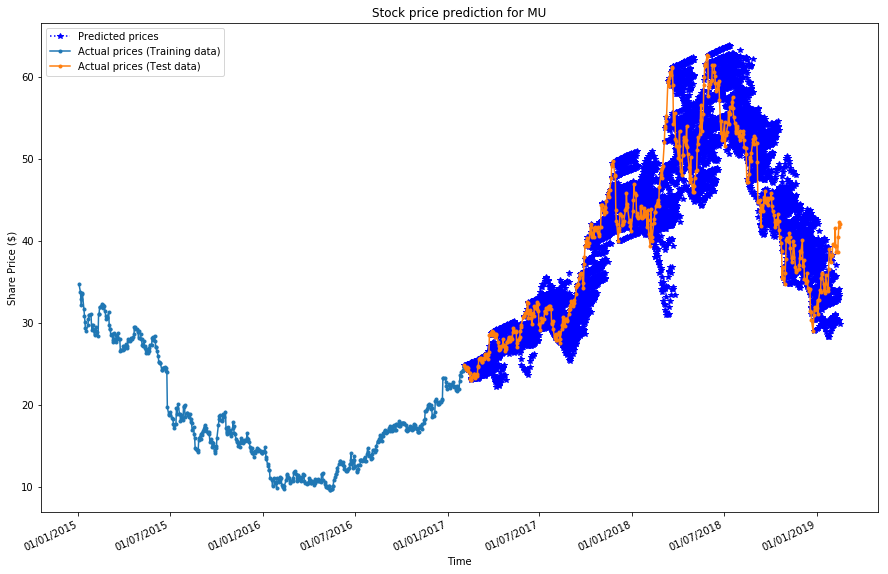

In [136]:
predictions = multi_step_lstm.predict()
multi_step_lstm.plot(predictions)
#display("next days predictions", multi_step_lstm.forecast_lstm_one_step())

In [137]:
trend_score = multi_step_lstm.score(metric="trend", predictions=predictions)
print("LSTM trend Score: ", trend_score)
lstm_score = multi_step_lstm.score(metric="rmse", predictions=predictions)
print("LSTM RMSE Score: US dollar", lstm_score)


Calculating trend score for  1
Price 1 day before:  24.75
Actual price:  24.79  | Predicted price:  [24.782736]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  24.79
Actual price:  24.6  | Predicted price:  [24.822737]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  24.6
Actual price:  24.34  | Predicted price:  [24.632713]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  24.34
Actual price:  24.6  | Predicted price:  [24.372736]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  24.6
Actual price:  24.21  | Predicted price:  [24.626772]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  24.21
Actual price:  24.45  | Predicted price:  [24.242735]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  24.45
Actual price:  24.05  | Predicted price:  [24.474041]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  24.05
Actual price:  23.9  | Predicted price:  [24.063723]
Actual trend:  down  | 

Actual trend:  up  | Predicted trend:  down
Price 1 day before:  31.08
Actual price:  31.48  | Predicted price:  [31.112736]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  31.48
Actual price:  31.61  | Predicted price:  [31.499739]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  31.61
Actual price:  31.97  | Predicted price:  [31.503279]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  31.97
Actual price:  32.6  | Predicted price:  [31.944681]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  32.6
Actual price:  32.07  | Predicted price:  [32.632732]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  32.07
Actual price:  32.25  | Predicted price:  [32.102734]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  32.25
Actual price:  32.79  | Predicted price:  [32.07842]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  32.79
Actual price:  32.45  | Predicted price:  [32.940975]
Actual tr

Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.88
Actual price:  43.95  | Predicted price:  [42.914936]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.95
Actual price:  43.08  | Predicted price:  [44.045662]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  43.08
Actual price:  43.01  | Predicted price:  [42.94675]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  43.01
Actual price:  43.67  | Predicted price:  [42.922737]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  43.67
Actual price:  43.29  | Predicted price:  [43.712296]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  43.29
Actual price:  41.67  | Predicted price:  [43.322735]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  41.67
Actual price:  43.72  | Predicted price:  [41.392044]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  43.72
Actual price:  42.49  | Predicted price:  [43.752735]
Act

Actual trend:  down  | Predicted trend:  up
Price 1 day before:  59.18
Actual price:  58.23  | Predicted price:  [59.33865]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  58.23
Actual price:  58.45  | Predicted price:  [58.262733]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  58.45
Actual price:  59.25  | Predicted price:  [58.60934]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  59.25
Actual price:  58.95  | Predicted price:  [58.817577]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  58.95
Actual price:  59.44  | Predicted price:  [58.976685]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  59.44
Actual price:  57.1  | Predicted price:  [59.472733]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  57.1
Actual price:  53.16  | Predicted price:  [57.132732]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  53.16
Actual price:  54.59  | Predicted price:  [53.749165]
Actual t

Actual trend:  down  | Predicted trend:  up
Price 1 day before:  39.92
Actual price:  39.8  | Predicted price:  [39.952732]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  39.8
Actual price:  40.93  | Predicted price:  [39.832733]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  40.93
Actual price:  40.44  | Predicted price:  [41.023533]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  40.44
Actual price:  39.11  | Predicted price:  [40.472733]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  39.11
Actual price:  37.44  | Predicted price:  [39.142735]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  37.44
Actual price:  37.85  | Predicted price:  [37.045307]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  37.85
Actual price:  38.03  | Predicted price:  [37.90372]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  38.03
Actual price:  39.91  | Predicted price:  [38.031597]
Actual 

Price 1 day before:  27.67
Actual price:  28.29  | Predicted price:  [27.692682]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.29
Actual price:  27.77  | Predicted price:  [27.717512]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  27.77
Actual price:  28.0  | Predicted price:  [28.352684]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.0
Actual price:  27.79  | Predicted price:  [27.832684]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  27.79
Actual price:  28.2  | Predicted price:  [28.062683]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.2
Actual price:  28.06  | Predicted price:  [27.877903]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  28.06
Actual price:  28.81  | Predicted price:  [28.262684]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.81
Actual price:  29.32  | Predicted price:  [28.124477]
Actual trend:  up  | Predicted trend:  down
Price 

Price 1 day before:  35.97
Actual price:  35.91  | Predicted price:  [36.01268]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  35.91
Actual price:  36.07  | Predicted price:  [36.03268]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  36.07
Actual price:  34.87  | Predicted price:  [35.97268]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  34.87
Actual price:  34.18  | Predicted price:  [36.13268]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  34.18
Actual price:  37.09  | Predicted price:  [34.93268]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  37.09
Actual price:  37.96  | Predicted price:  [34.24268]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  37.96
Actual price:  39.33  | Predicted price:  [37.103474]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  39.33
Actual price:  40.01  | Predicted price:  [37.697807]
Actual trend:  up  | Predicted trend:  down
Price 1 

Price 1 day before:  42.63
Actual price:  43.45  | Predicted price:  [41.749718]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  43.45
Actual price:  43.5  | Predicted price:  [42.69268]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  43.5
Actual price:  44.21  | Predicted price:  [43.632984]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  44.21
Actual price:  44.9  | Predicted price:  [43.094692]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  44.9
Actual price:  44.54  | Predicted price:  [44.27268]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  44.54
Actual price:  44.25  | Predicted price:  [44.99461]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  44.25
Actual price:  46.53  | Predicted price:  [44.60268]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  46.53
Actual price:  47.98  | Predicted price:  [43.788715]
Actual trend:  up  | Predicted trend:  down
Price 1 da

Actual trend:  up  | Predicted trend:  down
Price 1 day before:  54.31
Actual price:  55.74  | Predicted price:  [53.879917]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  55.74
Actual price:  54.18  | Predicted price:  [54.301285]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  54.18
Actual price:  55.45  | Predicted price:  [55.36742]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  55.45
Actual price:  56.35  | Predicted price:  [54.297157]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  56.35
Actual price:  56.15  | Predicted price:  [55.509403]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  56.15
Actual price:  56.96  | Predicted price:  [56.306053]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  56.96
Actual price:  57.45  | Predicted price:  [56.87615]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  57.45
Actual price:  56.22  | Predicted price:  [57.02268]
Act

Actual trend:  up  | Predicted trend:  down
Price 1 day before:  38.71
Actual price:  37.91  | Predicted price:  [36.57191]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  37.91
Actual price:  38.56  | Predicted price:  [38.77268]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  38.56
Actual price:  40.03  | Predicted price:  [37.4983]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  40.03
Actual price:  36.88  | Predicted price:  [37.933655]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  36.88
Actual price:  37.67  | Predicted price:  [39.68082]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  37.67
Actual price:  35.31  | Predicted price:  [36.94268]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  35.31
Actual price:  34.8  | Predicted price:  [37.758804]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  34.8
Actual price:  35.21  | Predicted price:  [35.184055]
Actual

Actual price:  28.29  | Predicted price:  [27.580816]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  28.29
Actual price:  28.99  | Predicted price:  [27.90555]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  28.99
Actual price:  29.43  | Predicted price:  [28.15315]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  29.43
Actual price:  29.76  | Predicted price:  [28.383152]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  29.76
Actual price:  30.7  | Predicted price:  [29.08315]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  30.7
Actual price:  30.77  | Predicted price:  [29.523151]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  30.77
Actual price:  30.76  | Predicted price:  [29.853151]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  30.76
Actual price:  31.21  | Predicted price:  [30.793152]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  31.21
Actua

Actual price:  40.4  | Predicted price:  [41.911125]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  40.4
Actual price:  41.49  | Predicted price:  [41.703148]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  41.49
Actual price:  40.39  | Predicted price:  [40.67315]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  40.39
Actual price:  41.65  | Predicted price:  [40.35682]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  41.65
Actual price:  41.31  | Predicted price:  [41.273277]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  41.31
Actual price:  41.5  | Predicted price:  [40.483147]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  41.5
Actual price:  41.56  | Predicted price:  [41.760303]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  41.56
Actual price:  41.6  | Predicted price:  [41.543377]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  41.6
Actual p

Price 1 day before:  55.22
Actual price:  54.59  | Predicted price:  [53.85242]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  54.59
Actual price:  59.37  | Predicted price:  [54.0562]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  59.37
Actual price:  59.43  | Predicted price:  [54.467957]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  59.43
Actual price:  59.78  | Predicted price:  [54.380802]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  59.78
Actual price:  58.84  | Predicted price:  [59.463146]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  58.84
Actual price:  60.58  | Predicted price:  [59.412086]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  60.58
Actual price:  60.14  | Predicted price:  [59.873146]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  60.14
Actual price:  61.15  | Predicted price:  [59.235497]
Actual trend:  up  | Predicted trend:  down

Price 1 day before:  52.79
Actual price:  52.29  | Predicted price:  [54.053146]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  52.29
Actual price:  53.4  | Predicted price:  [53.38141]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.4
Actual price:  52.81  | Predicted price:  [52.922855]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  52.81
Actual price:  52.67  | Predicted price:  [52.497463]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  52.67
Actual price:  53.04  | Predicted price:  [53.49315]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.04
Actual price:  53.39  | Predicted price:  [52.065624]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  53.39
Actual price:  52.26  | Predicted price:  [52.706177]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  52.26
Actual price:  51.37  | Predicted price:  [53.13315]
Actual trend:  down  | Predicted trend:  up
Pri

Price 1 day before:  30.32
Actual price:  29.02  | Predicted price:  [31.770298]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  29.02
Actual price:  30.89  | Predicted price:  [31.424656]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  30.89
Actual price:  31.93  | Predicted price:  [30.359743]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  31.93
Actual price:  31.57  | Predicted price:  [29.101341]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  31.57
Actual price:  31.73  | Predicted price:  [32.099396]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  31.73
Actual price:  32.75  | Predicted price:  [32.02315]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  32.75
Actual price:  31.0  | Predicted price:  [31.66315]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  31.0
Actual price:  32.7  | Predicted price:  [31.775526]
Actual trend:  up  | Predicted trend:  up
Price 1 d

Actual price:  30.56  | Predicted price:  [30.72999]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  30.56
Actual price:  29.86  | Predicted price:  [31.656792]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  29.86
Actual price:  31.2  | Predicted price:  [31.265947]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  31.2
Actual price:  30.83  | Predicted price:  [31.18999]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  30.83
Actual price:  32.01  | Predicted price:  [31.168573]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  32.01
Actual price:  31.89  | Predicted price:  [30.084812]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  31.89
Actual price:  31.73  | Predicted price:  [31.32999]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  31.73
Actual price:  32.5  | Predicted price:  [30.575802]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  32.5
Act

Actual price:  43.25  | Predicted price:  [44.21264]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  43.25
Actual price:  43.95  | Predicted price:  [44.535458]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.95
Actual price:  44.09  | Predicted price:  [44.469986]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  44.09
Actual price:  43.5  | Predicted price:  [43.839985]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  43.5
Actual price:  44.78  | Predicted price:  [43.379986]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  44.78
Actual price:  45.6  | Predicted price:  [44.083054]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  45.6
Actual price:  45.8  | Predicted price:  [43.53706]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  45.8
Actual price:  45.36  | Predicted price:  [42.945747]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  45.36
Actual p

Actual price:  51.55  | Predicted price:  [51.995636]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  51.55
Actual price:  53.39  | Predicted price:  [51.619987]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.39
Actual price:  49.84  | Predicted price:  [54.224293]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  49.84
Actual price:  48.46  | Predicted price:  [50.659878]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  48.46
Actual price:  47.96  | Predicted price:  [52.10101]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  47.96
Actual price:  50.48  | Predicted price:  [53.18567]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  50.48
Actual price:  50.48  | Predicted price:  [49.89939]
Actual trend:  neutral  | Predicted trend:  down
Price 1 day before:  50.48
Actual price:  52.59  | Predicted price:  [48.698734]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  52.59
Actu

Actual price:  49.7  | Predicted price:  [46.4591]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  49.7
Actual price:  50.7  | Predicted price:  [48.398643]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  50.7
Actual price:  52.07  | Predicted price:  [50.7324]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  52.07
Actual price:  52.34  | Predicted price:  [50.596375]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  52.34
Actual price:  51.83  | Predicted price:  [49.136658]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  51.83
Actual price:  52.76  | Predicted price:  [50.829987]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  52.76
Actual price:  52.52  | Predicted price:  [52.49827]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  52.52
Actual price:  51.93  | Predicted price:  [52.248173]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  51.93
Act

Actual trend:  down  | Predicted trend:  up
Price 1 day before:  23.12
Actual price:  23.02  | Predicted price:  [24.37739]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  23.02
Actual price:  22.98  | Predicted price:  [24.62562]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  22.98
Actual price:  23.35  | Predicted price:  [24.230152]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  23.35
Actual price:  23.77  | Predicted price:  [24.06739]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  23.77
Actual price:  23.75  | Predicted price:  [23.290533]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  23.75
Actual price:  23.48  | Predicted price:  [23.187391]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  23.48
Actual price:  23.24  | Predicted price:  [23.1677]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  23.24
Actual price:  23.76  | Predicted price:  [23.509987]
Act

Actual price:  30.5  | Predicted price:  [30.027391]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  30.5
Actual price:  31.37  | Predicted price:  [29.30739]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  31.37
Actual price:  31.45  | Predicted price:  [29.828419]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  31.45
Actual price:  31.13  | Predicted price:  [30.263988]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  31.13
Actual price:  31.79  | Predicted price:  [30.367392]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  31.79
Actual price:  31.72  | Predicted price:  [30.705986]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  31.72
Actual price:  31.9  | Predicted price:  [31.537392]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  31.9
Actual price:  31.82  | Predicted price:  [31.617392]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  31.82

Actual price:  43.74  | Predicted price:  [49.200108]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  43.74
Actual price:  42.39  | Predicted price:  [49.30739]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  42.39
Actual price:  41.99  | Predicted price:  [49.84739]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  41.99
Actual price:  39.9  | Predicted price:  [48.21739]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  39.9
Actual price:  41.21  | Predicted price:  [48.099308]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  41.21
Actual price:  41.58  | Predicted price:  [43.881264]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  41.58
Actual price:  43.2  | Predicted price:  [42.5762]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.2
Actual price:  43.21  | Predicted price:  [42.24778]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  43.21
Actual price:  4

Actual price:  47.6  | Predicted price:  [55.25785]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  47.6
Actual price:  50.14  | Predicted price:  [51.524933]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  50.14
Actual price:  47.52  | Predicted price:  [50.786633]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  47.52
Actual price:  45.98  | Predicted price:  [49.138]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  45.98
Actual price:  46.79  | Predicted price:  [47.27739]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  46.79
Actual price:  45.89  | Predicted price:  [49.177547]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  45.89
Actual price:  46.62  | Predicted price:  [50.30739]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  46.62
Actual price:  47.58  | Predicted price:  [47.68739]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  47.58
Actual price:  48.4

Actual price:  43.58  | Predicted price:  [44.138874]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  43.58
Actual price:  45.33  | Predicted price:  [43.781693]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  45.33
Actual price:  45.06  | Predicted price:  [42.009132]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  45.06
Actual price:  46.06  | Predicted price:  [42.61625]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  46.06
Actual price:  44.74  | Predicted price:  [44.420345]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  44.74
Actual price:  45.16  | Predicted price:  [43.79211]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  45.16
Actual price:  44.64  | Predicted price:  [45.194954]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  44.64
Actual price:  44.35  | Predicted price:  [44.721943]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  44.3

Actual trend:  down  | Predicted trend:  down
Price 1 day before:  25.15
Actual price:  25.18  | Predicted price:  [24.903246]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  25.18
Actual price:  25.7  | Predicted price:  [25.773245]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  25.7
Actual price:  25.58  | Predicted price:  [25.913244]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  25.58
Actual price:  26.12  | Predicted price:  [25.843245]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  26.12
Actual price:  26.04  | Predicted price:  [25.583244]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  26.04
Actual price:  25.8  | Predicted price:  [25.353245]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  25.8
Actual price:  26.21  | Predicted price:  [25.266788]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  26.21
Actual price:  25.52  | Predicted price:  [25.996784]
Ac

Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.34
Actual price:  28.63  | Predicted price:  [30.103245]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.63
Actual price:  27.83  | Predicted price:  [28.279182]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  27.83
Actual price:  27.92  | Predicted price:  [30.106918]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  27.92
Actual price:  28.59  | Predicted price:  [29.429987]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.59
Actual price:  28.84  | Predicted price:  [28.323246]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  28.84
Actual price:  28.58  | Predicted price:  [28.511208]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  28.58
Actual price:  27.49  | Predicted price:  [28.833244]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  27.49
Actual price:  28.01  | Predicted price:  [28.033245]
Actu

Actual trend:  down  | Predicted trend:  down
Price 1 day before:  44.42
Actual price:  44.12  | Predicted price:  [42.88352]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  44.12
Actual price:  42.25  | Predicted price:  [43.198956]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  42.25
Actual price:  42.48  | Predicted price:  [44.01908]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.48
Actual price:  41.81  | Predicted price:  [44.734604]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  41.81
Actual price:  41.12  | Predicted price:  [45.953243]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  41.12
Actual price:  43.67  | Predicted price:  [44.62324]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.67
Actual price:  44.98  | Predicted price:  [45.004917]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  44.98
Actual price:  46.88  | Predicted price:  [42.532883]
Act

Actual trend:  down  | Predicted trend:  down
Price 1 day before:  54.7
Actual price:  53.39  | Predicted price:  [52.873894]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  53.39
Actual price:  55.48  | Predicted price:  [51.971207]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  55.48
Actual price:  59.03  | Predicted price:  [53.449177]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  59.03
Actual price:  59.97  | Predicted price:  [54.21324]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  59.97
Actual price:  61.49  | Predicted price:  [56.703243]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  61.49
Actual price:  61.35  | Predicted price:  [53.34747]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  61.35
Actual price:  62.62  | Predicted price:  [53.593243]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  62.62
Actual price:  62.57  | Predicted price:  [55.6431]

Actual price:  42.27  | Predicted price:  [43.50991]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  42.27
Actual price:  41.61  | Predicted price:  [45.628048]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  41.61
Actual price:  41.97  | Predicted price:  [45.4245]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  41.97
Actual price:  42.47  | Predicted price:  [44.366543]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.47
Actual price:  42.34  | Predicted price:  [43.783245]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  42.34
Actual price:  43.21  | Predicted price:  [43.713524]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.21
Actual price:  42.35  | Predicted price:  [44.298042]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  42.35
Actual price:  41.3  | Predicted price:  [42.46074]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  41.3
Actual price

Actual trend:  down  | Predicted trend:  down
Price 1 day before:  28.9
Actual price:  28.64  | Predicted price:  [26.713614]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  28.64
Actual price:  28.59  | Predicted price:  [28.673615]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  28.59
Actual price:  28.26  | Predicted price:  [29.003614]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  28.26
Actual price:  28.62  | Predicted price:  [28.933615]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.62
Actual price:  28.52  | Predicted price:  [28.743614]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  28.52
Actual price:  27.64  | Predicted price:  [29.213614]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  27.64
Actual price:  27.18  | Predicted price:  [29.143614]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  27.18
Actual price:  26.69  | Predicted price:  [28.883614]

Actual trend:  neutral  | Predicted trend:  down
Price 1 day before:  30.45
Actual price:  30.22  | Predicted price:  [29.923615]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  30.22
Actual price:  30.29  | Predicted price:  [30.933615]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  30.29
Actual price:  31.08  | Predicted price:  [28.954464]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  31.08
Actual price:  31.48  | Predicted price:  [30.707615]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  31.48
Actual price:  31.61  | Predicted price:  [29.803614]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  31.61
Actual price:  31.97  | Predicted price:  [30.581432]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  31.97
Actual price:  32.6  | Predicted price:  [30.693615]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  32.6
Actual price:  32.07  | Predicted price:  [30.38918

Actual trend:  up  | Predicted trend:  up
Price 1 day before:  44.26
Actual price:  43.99  | Predicted price:  [47.00797]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  43.99
Actual price:  42.75  | Predicted price:  [43.14347]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  42.75
Actual price:  42.88  | Predicted price:  [43.55361]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.88
Actual price:  43.95  | Predicted price:  [44.25465]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.95
Actual price:  43.08  | Predicted price:  [42.30933]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  43.08
Actual price:  43.01  | Predicted price:  [43.293297]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  43.01
Actual price:  43.67  | Predicted price:  [44.50361]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.67
Actual price:  43.29  | Predicted price:  [44.233612]
Actual tre

Actual trend:  neutral  | Predicted trend:  down
Price 1 day before:  61.39
Actual price:  60.55  | Predicted price:  [58.983612]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  60.55
Actual price:  60.05  | Predicted price:  [60.092262]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  60.05
Actual price:  59.18  | Predicted price:  [59.65361]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  59.18
Actual price:  58.23  | Predicted price:  [59.66361]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  58.23
Actual price:  58.45  | Predicted price:  [59.87361]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  58.45
Actual price:  59.25  | Predicted price:  [60.775608]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  59.25
Actual price:  58.95  | Predicted price:  [61.63361]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  58.95
Actual price:  59.44  | Predicted price:  [60.79361

Actual trend:  up  | Predicted trend:  up
Price 1 day before:  37.72
Actual price:  40.12  | Predicted price:  [38.92361]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  40.12
Actual price:  40.32  | Predicted price:  [35.554417]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  40.32
Actual price:  39.92  | Predicted price:  [37.128605]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  39.92
Actual price:  39.8  | Predicted price:  [36.069443]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  39.8
Actual price:  40.93  | Predicted price:  [34.72699]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  40.93
Actual price:  40.44  | Predicted price:  [37.223225]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  40.44
Actual price:  39.11  | Predicted price:  [37.57094]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  39.11
Actual price:  37.44  | Predicted price:  [40.36361]
Ac

Price 1 day before:  26.99
Actual price:  26.79  | Predicted price:  [27.019682]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  26.79
Actual price:  27.63  | Predicted price:  [26.861044]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  27.63
Actual price:  27.67  | Predicted price:  [27.397562]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  27.67
Actual price:  28.29  | Predicted price:  [27.081625]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  28.29
Actual price:  27.77  | Predicted price:  [28.239681]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  27.77
Actual price:  28.0  | Predicted price:  [27.557947]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  28.0
Actual price:  27.79  | Predicted price:  [26.849682]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  27.79
Actual price:  28.2  | Predicted price:  [26.668657]
Actual trend:  up  | Predicted trend:  down
P

Price 1 day before:  34.65
Actual price:  35.43  | Predicted price:  [33.181168]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  35.43
Actual price:  35.95  | Predicted price:  [33.43418]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  35.95
Actual price:  35.97  | Predicted price:  [32.72968]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  35.97
Actual price:  35.91  | Predicted price:  [33.719677]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  35.91
Actual price:  36.07  | Predicted price:  [34.56968]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  36.07
Actual price:  34.87  | Predicted price:  [34.86968]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  34.87
Actual price:  34.18  | Predicted price:  [34.85968]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  34.18
Actual price:  37.09  | Predicted price:  [34.92968]
Actual trend:  up  | Predicted trend:  up
Pr

Actual trend:  down  | Predicted trend:  up
Price 1 day before:  40.0
Actual price:  40.41  | Predicted price:  [42.52608]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  40.41
Actual price:  42.19  | Predicted price:  [43.99968]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.19
Actual price:  42.63  | Predicted price:  [42.76968]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.63
Actual price:  43.45  | Predicted price:  [41.099678]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  43.45
Actual price:  43.5  | Predicted price:  [38.05493]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  43.5
Actual price:  44.21  | Predicted price:  [45.934765]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  44.21
Actual price:  44.9  | Predicted price:  [40.578705]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  44.9
Actual price:  44.54  | Predicted price:  [41.330856]
Actual trend:  do

Actual trend:  down  | Predicted trend:  up
Price 1 day before:  51.48
Actual price:  52.84  | Predicted price:  [57.379677]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  52.84
Actual price:  53.23  | Predicted price:  [55.15501]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.23
Actual price:  54.31  | Predicted price:  [56.26707]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  54.31
Actual price:  55.74  | Predicted price:  [54.63724]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  55.74
Actual price:  54.18  | Predicted price:  [53.419678]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  54.18
Actual price:  55.45  | Predicted price:  [52.86305]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  55.45
Actual price:  56.35  | Predicted price:  [54.863873]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  56.35
Actual price:  56.15  | Predicted price:  [52.51474]
Actual tren

Actual trend:  up  | Predicted trend:  up
Price 1 day before:  36.4
Actual price:  36.57  | Predicted price:  [38.03736]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  36.57
Actual price:  37.0  | Predicted price:  [38.446663]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  37.0
Actual price:  38.71  | Predicted price:  [40.047943]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  38.71
Actual price:  37.91  | Predicted price:  [39.57794]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  37.91
Actual price:  38.56  | Predicted price:  [37.10968]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  38.56
Actual price:  40.03  | Predicted price:  [38.110653]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  40.03
Actual price:  36.88  | Predicted price:  [35.82317]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  36.88
Actual price:  37.67  | Predicted price:  [36.8865]
Actual trend:  

Actual price:  27.48  | Predicted price:  [28.516695]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  27.48
Actual price:  27.82  | Predicted price:  [27.65464]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  27.82
Actual price:  28.06  | Predicted price:  [29.241713]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.06
Actual price:  28.29  | Predicted price:  [29.883055]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.29
Actual price:  28.99  | Predicted price:  [29.346695]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.99
Actual price:  29.43  | Predicted price:  [29.246695]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  29.43
Actual price:  29.76  | Predicted price:  [29.146694]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  29.76
Actual price:  30.7  | Predicted price:  [29.181128]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  30.7
Actual price:  

Price 1 day before:  40.96
Actual price:  41.98  | Predicted price:  [37.991783]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  41.98
Actual price:  41.61  | Predicted price:  [37.45089]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  41.61
Actual price:  40.58  | Predicted price:  [39.646694]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  40.58
Actual price:  40.4  | Predicted price:  [40.32669]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  40.4
Actual price:  41.49  | Predicted price:  [40.68669]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  41.49
Actual price:  40.39  | Predicted price:  [39.876694]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  40.39
Actual price:  41.65  | Predicted price:  [39.19788]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  41.65
Actual price:  41.31  | Predicted price:  [39.98669]
Actual trend:  down  | Predicted trend:  down

Price 1 day before:  52.03
Actual price:  53.74  | Predicted price:  [44.856693]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  53.74
Actual price:  53.97  | Predicted price:  [43.0695]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  53.97
Actual price:  55.22  | Predicted price:  [48.314323]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  55.22
Actual price:  54.59  | Predicted price:  [48.77927]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  54.59
Actual price:  59.37  | Predicted price:  [48.896694]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  59.37
Actual price:  59.43  | Predicted price:  [46.41022]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  59.43
Actual price:  59.78  | Predicted price:  [47.67583]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  59.78
Actual price:  58.84  | Predicted price:  [49.443756]
Actual trend:  down  | Predicted trend:  down
P

Price 1 day before:  53.76
Actual price:  53.96  | Predicted price:  [58.040245]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.96
Actual price:  53.01  | Predicted price:  [57.27669]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  53.01
Actual price:  52.79  | Predicted price:  [55.978195]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  52.79
Actual price:  52.29  | Predicted price:  [57.185875]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  52.29
Actual price:  53.4  | Predicted price:  [56.100735]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.4
Actual price:  52.81  | Predicted price:  [52.817833]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  52.81
Actual price:  52.67  | Predicted price:  [53.365185]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  52.67
Actual price:  53.04  | Predicted price:  [53.70669]
Actual trend:  up  | Predicted trend:  up
Price 1 

Price 1 day before:  34.11
Actual price:  31.41  | Predicted price:  [38.30785]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  31.41
Actual price:  31.28  | Predicted price:  [33.9367]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  31.28
Actual price:  30.32  | Predicted price:  [35.11669]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  30.32
Actual price:  29.02  | Predicted price:  [33.928177]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  29.02
Actual price:  30.89  | Predicted price:  [36.85956]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  30.89
Actual price:  31.93  | Predicted price:  [35.336693]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  31.93
Actual price:  31.57  | Predicted price:  [32.65835]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  31.57
Actual price:  31.73  | Predicted price:  [33.779957]
Actual trend:  up  | Predicted trend:  up
Price 1 day 

Actual price:  31.2  | Predicted price:  [30.120598]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  31.2
Actual price:  31.54  | Predicted price:  [31.060598]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  31.54
Actual price:  31.06  | Predicted price:  [31.130598]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  31.06
Actual price:  30.56  | Predicted price:  [31.120598]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  30.56
Actual price:  29.86  | Predicted price:  [31.570597]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  29.86
Actual price:  31.2  | Predicted price:  [31.570597]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  31.2
Actual price:  30.83  | Predicted price:  [31.930597]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  30.83
Actual price:  32.01  | Predicted price:  [32.5324]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  32.01
Actual p

Actual price:  44.38  | Predicted price:  [41.358143]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  44.38
Actual price:  44.34  | Predicted price:  [41.379097]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  44.34
Actual price:  43.71  | Predicted price:  [41.881668]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  43.71
Actual price:  43.25  | Predicted price:  [42.76578]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  43.25
Actual price:  43.95  | Predicted price:  [41.960594]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  43.95
Actual price:  44.09  | Predicted price:  [41.420597]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  44.09
Actual price:  43.5  | Predicted price:  [40.960594]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  43.5
Actual price:  44.78  | Predicted price:  [41.53389]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  44

Actual price:  51.49  | Predicted price:  [60.140594]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  51.49
Actual price:  52.14  | Predicted price:  [58.57208]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  52.14
Actual price:  50.06  | Predicted price:  [61.0315]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  50.06
Actual price:  51.55  | Predicted price:  [60.81816]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  51.55
Actual price:  53.39  | Predicted price:  [61.510597]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.39
Actual price:  49.84  | Predicted price:  [61.288174]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  49.84
Actual price:  48.46  | Predicted price:  [59.280594]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  48.46
Actual price:  47.96  | Predicted price:  [54.570595]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  47.96
Actual pri

Actual price:  48.07  | Predicted price:  [51.550842]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  48.07
Actual price:  49.94  | Predicted price:  [53.400597]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  49.94
Actual price:  50.24  | Predicted price:  [53.12208]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  50.24
Actual price:  49.7  | Predicted price:  [52.426693]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  49.7
Actual price:  50.7  | Predicted price:  [51.47768]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  50.7
Actual price:  52.07  | Predicted price:  [50.1325]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  52.07
Actual price:  52.34  | Predicted price:  [51.039932]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  52.34
Actual price:  51.83  | Predicted price:  [47.832134]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  51.83
Actual price: 

Price 1 day before:  36.01
Actual price:  34.67  | Predicted price:  [31.930597]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  34.67
Actual price:  33.99  | Predicted price:  [33.90233]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  33.99
Actual price:  33.58  | Predicted price:  [33.13171]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  33.58
Actual price:  33.88  | Predicted price:  [30.098478]
Actual trend:  up  | Predicted trend:  down
Correct counts:  238   Size of test set: 513

Calculating trend score for  11
Price 1 day before:  23.02
Actual price:  22.98  | Predicted price:  [25.15187]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  22.98
Actual price:  23.35  | Predicted price:  [25.191872]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  23.35
Actual price:  23.77  | Predicted price:  [25.00195]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  23.77
Actual price:  23.75  

Actual price:  30.51  | Predicted price:  [31.601871]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  30.51
Actual price:  30.1  | Predicted price:  [31.089243]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  30.1
Actual price:  30.2  | Predicted price:  [32.41187]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  30.2
Actual price:  30.5  | Predicted price:  [32.63315]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  30.5
Actual price:  31.37  | Predicted price:  [30.52784]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  31.37
Actual price:  31.45  | Predicted price:  [33.031944]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  31.45
Actual price:  31.13  | Predicted price:  [32.027985]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  31.13
Actual price:  31.79  | Predicted price:  [32.290646]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  31.79
Actual price:  31.72 

Actual price:  49.68  | Predicted price:  [44.23834]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  49.68
Actual price:  48.05  | Predicted price:  [42.755886]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  48.05
Actual price:  47.93  | Predicted price:  [45.18187]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  47.93
Actual price:  43.74  | Predicted price:  [45.758472]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  43.74
Actual price:  42.39  | Predicted price:  [46.20187]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  42.39
Actual price:  41.99  | Predicted price:  [45.76187]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  41.99
Actual price:  39.9  | Predicted price:  [46.75368]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  39.9
Actual price:  41.21  | Predicted price:  [46.298878]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  41.21
Act

Actual price:  50.62  | Predicted price:  [50.215664]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  50.62
Actual price:  49.02  | Predicted price:  [49.341194]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  49.02
Actual price:  47.11  | Predicted price:  [45.765423]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  47.11
Actual price:  47.6  | Predicted price:  [50.88187]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  47.6
Actual price:  50.14  | Predicted price:  [51.063194]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  50.14
Actual price:  47.52  | Predicted price:  [54.38289]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  47.52
Actual price:  45.98  | Predicted price:  [54.20266]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  45.98
Actual price:  46.79  | Predicted price:  [52.051872]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  46.79
Actua

Actual price:  41.74  | Predicted price:  [52.58261]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  41.74
Actual price:  43.62  | Predicted price:  [52.174355]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.62
Actual price:  44.3  | Predicted price:  [51.746185]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  44.3
Actual price:  43.58  | Predicted price:  [53.805256]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  43.58
Actual price:  45.33  | Predicted price:  [53.05563]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  45.33
Actual price:  45.06  | Predicted price:  [52.3017]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  45.06
Actual price:  46.06  | Predicted price:  [50.21029]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  46.06
Actual price:  44.74  | Predicted price:  [45.119644]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  44.74
Actual price:

Actual trend:  up  | Predicted trend:  down
Price 1 day before:  25.71
Actual price:  25.64  | Predicted price:  [23.489763]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  25.64
Actual price:  25.38  | Predicted price:  [23.769989]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  25.38
Actual price:  25.15  | Predicted price:  [24.213974]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  25.15
Actual price:  25.18  | Predicted price:  [24.193974]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  25.18
Actual price:  25.7  | Predicted price:  [23.923973]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  25.7
Actual price:  25.58  | Predicted price:  [23.683973]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  25.58
Actual price:  26.12  | Predicted price:  [24.203974]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  26.12
Actual price:  26.04  | Predicted price:  [23.88

Actual trend:  up  | Predicted trend:  up
Price 1 day before:  30.24
Actual price:  29.28  | Predicted price:  [31.893974]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  29.28
Actual price:  28.12  | Predicted price:  [31.573973]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  28.12
Actual price:  28.34  | Predicted price:  [32.23398]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.34
Actual price:  28.63  | Predicted price:  [33.271362]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.63
Actual price:  27.83  | Predicted price:  [32.943134]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  27.83
Actual price:  27.92  | Predicted price:  [32.57192]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  27.92
Actual price:  28.59  | Predicted price:  [32.427216]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.59
Actual price:  28.84  | Predicted price:  [32.45397]
Actual trend:

Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.71
Actual price:  43.98  | Predicted price:  [43.53093]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  43.98
Actual price:  45.75  | Predicted price:  [40.343975]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  45.75
Actual price:  44.42  | Predicted price:  [41.653976]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  44.42
Actual price:  44.12  | Predicted price:  [42.023975]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  44.12
Actual price:  42.25  | Predicted price:  [43.643974]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  42.25
Actual price:  42.48  | Predicted price:  [43.653973]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.48
Actual price:  41.81  | Predicted price:  [43.530495]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  41.81
Actual price:  41.12  | Predicted price:  [45.02562]


Actual price:  53.0  | Predicted price:  [50.583973]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  53.0
Actual price:  54.01  | Predicted price:  [47.963974]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  54.01
Actual price:  56.5  | Predicted price:  [44.24741]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  56.5
Actual price:  54.7  | Predicted price:  [47.771843]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  54.7
Actual price:  53.39  | Predicted price:  [46.28136]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  53.39
Actual price:  55.48  | Predicted price:  [46.35451]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  55.48
Actual price:  59.03  | Predicted price:  [48.023975]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  59.03
Actual price:  59.97  | Predicted price:  [49.28935]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  59.97
Actual

Actual price:  44.16  | Predicted price:  [44.340065]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  44.16
Actual price:  43.58  | Predicted price:  [43.26081]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  43.58
Actual price:  43.07  | Predicted price:  [43.255573]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  43.07
Actual price:  42.27  | Predicted price:  [45.517635]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  42.27
Actual price:  41.61  | Predicted price:  [45.603973]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  41.61
Actual price:  41.97  | Predicted price:  [45.083973]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  41.97
Actual price:  42.47  | Predicted price:  [44.793972]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.47
Actual price:  42.34  | Predicted price:  [45.25403]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  42.34


Actual trend:  down  | Predicted trend:  down
Price 1 day before:  28.69
Actual price:  28.5  | Predicted price:  [24.52069]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  28.5
Actual price:  28.97  | Predicted price:  [26.438595]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  28.97
Actual price:  28.9  | Predicted price:  [23.434898]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  28.9
Actual price:  28.64  | Predicted price:  [27.519976]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  28.64
Actual price:  28.59  | Predicted price:  [27.116165]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  28.59
Actual price:  28.26  | Predicted price:  [26.297169]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  28.26
Actual price:  28.62  | Predicted price:  [26.590729]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  28.62
Actual price:  28.52  | Predicted price:  [26.0

Actual trend:  up  | Predicted trend:  down
Price 1 day before:  30.38
Actual price:  29.56  | Predicted price:  [29.127169]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  29.56
Actual price:  30.45  | Predicted price:  [28.32717]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  30.45
Actual price:  30.45  | Predicted price:  [28.81474]
Actual trend:  neutral  | Predicted trend:  down
Price 1 day before:  30.45
Actual price:  30.22  | Predicted price:  [26.397375]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  30.22
Actual price:  30.29  | Predicted price:  [29.807652]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  30.29
Actual price:  31.08  | Predicted price:  [26.857397]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  31.08
Actual price:  31.48  | Predicted price:  [28.457495]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  31.48
Actual price:  31.61  | Predicted price:  [28.1

Actual trend:  down  | Predicted trend:  up
Price 1 day before:  42.82
Actual price:  42.81  | Predicted price:  [45.7781]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  42.81
Actual price:  42.92  | Predicted price:  [42.326416]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  42.92
Actual price:  44.26  | Predicted price:  [46.64458]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  44.26
Actual price:  43.99  | Predicted price:  [44.467613]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  43.99
Actual price:  42.75  | Predicted price:  [41.61717]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  42.75
Actual price:  42.88  | Predicted price:  [48.788116]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.88
Actual price:  43.95  | Predicted price:  [45.552658]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.95
Actual price:  43.08  | Predicted price:  [47.843906]
Actual t

Actual trend:  up  | Predicted trend:  down
Price 1 day before:  59.42
Actual price:  59.63  | Predicted price:  [53.88717]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  59.63
Actual price:  61.39  | Predicted price:  [54.364933]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  61.39
Actual price:  61.39  | Predicted price:  [60.57608]
Actual trend:  neutral  | Predicted trend:  down
Price 1 day before:  61.39
Actual price:  60.55  | Predicted price:  [60.214832]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  60.55
Actual price:  60.05  | Predicted price:  [61.98717]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  60.05
Actual price:  59.18  | Predicted price:  [61.67822]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  59.18
Actual price:  58.23  | Predicted price:  [63.11717]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  58.23
Actual price:  58.45  | Predicted price:  [63.06717]

Actual trend:  down  | Predicted trend:  up
Price 1 day before:  35.4
Actual price:  34.66  | Predicted price:  [43.209927]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  34.66
Actual price:  36.01  | Predicted price:  [42.218403]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  36.01
Actual price:  37.72  | Predicted price:  [41.39584]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  37.72
Actual price:  40.12  | Predicted price:  [43.33432]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  40.12
Actual price:  40.32  | Predicted price:  [43.70717]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  40.32
Actual price:  39.92  | Predicted price:  [43.33459]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  39.92
Actual price:  39.8  | Predicted price:  [38.932716]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  39.8
Actual price:  40.93  | Predicted price:  [41.434593]
Actual trend:

Price 1 day before:  27.96
Actual price:  27.32  | Predicted price:  [29.442001]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  27.32
Actual price:  26.57  | Predicted price:  [29.182001]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  26.57
Actual price:  26.99  | Predicted price:  [29.132002]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  26.99
Actual price:  26.79  | Predicted price:  [28.802002]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  26.79
Actual price:  27.63  | Predicted price:  [28.979359]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  27.63
Actual price:  27.67  | Predicted price:  [29.062002]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  27.67
Actual price:  28.29  | Predicted price:  [28.121176]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.29
Actual price:  27.77  | Predicted price:  [27.722002]
Actual trend:  down  | Predicted trend:  down
Price 

Actual trend:  up  | Predicted trend:  down
Price 1 day before:  34.29
Actual price:  34.59  | Predicted price:  [30.992002]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  34.59
Actual price:  34.58  | Predicted price:  [30.632034]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  34.58
Actual price:  34.65  | Predicted price:  [30.644417]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  34.65
Actual price:  35.43  | Predicted price:  [31.622002]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  35.43
Actual price:  35.95  | Predicted price:  [32.005905]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  35.95
Actual price:  35.97  | Predicted price:  [32.965237]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  35.97
Actual price:  35.91  | Predicted price:  [32.21461]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  35.91
Actual price:  36.07  | Predicted price:  [33.14200

Actual trend:  down  | Predicted trend:  up
Price 1 day before:  39.4
Actual price:  43.88  | Predicted price:  [44.802002]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.88
Actual price:  42.01  | Predicted price:  [44.532005]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  42.01
Actual price:  40.0  | Predicted price:  [43.292004]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  40.0
Actual price:  40.41  | Predicted price:  [43.526993]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  40.41
Actual price:  42.19  | Predicted price:  [44.14793]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.19
Actual price:  42.63  | Predicted price:  [43.41638]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.63
Actual price:  43.45  | Predicted price:  [44.251766]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.45
Actual price:  43.5  | Predicted price:  [44.156254]
Actual trend:  u

Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.14
Actual price:  52.44  | Predicted price:  [61.932003]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  52.44
Actual price:  54.48  | Predicted price:  [61.092003]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  54.48
Actual price:  51.48  | Predicted price:  [58.87566]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  51.48
Actual price:  52.84  | Predicted price:  [56.32772]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  52.84
Actual price:  53.23  | Predicted price:  [58.772003]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.23
Actual price:  54.31  | Predicted price:  [59.14884]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  54.31
Actual price:  55.74  | Predicted price:  [62.504555]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  55.74
Actual price:  54.18  | Predicted price:  [62.803043]
Actual trend:  

Actual trend:  down  | Predicted trend:  down
Price 1 day before:  36.83
Actual price:  36.12  | Predicted price:  [37.576275]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  36.12
Actual price:  36.38  | Predicted price:  [40.662003]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  36.38
Actual price:  36.4  | Predicted price:  [40.06919]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  36.4
Actual price:  36.57  | Predicted price:  [40.462]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  36.57
Actual price:  37.0  | Predicted price:  [40.342003]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  37.0
Actual price:  38.71  | Predicted price:  [42.071217]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  38.71
Actual price:  37.91  | Predicted price:  [40.982002]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  37.91
Actual price:  38.56  | Predicted price:  [39.652004]
Actual trend:  u

Price 1 day before:  28.93
Actual price:  28.83  | Predicted price:  [27.155876]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  28.83
Actual price:  29.02  | Predicted price:  [26.659958]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  29.02
Actual price:  27.0  | Predicted price:  [27.161507]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  27.0
Actual price:  27.48  | Predicted price:  [28.215876]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  27.48
Actual price:  27.82  | Predicted price:  [28.485598]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  27.82
Actual price:  28.06  | Predicted price:  [28.875877]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.06
Actual price:  28.29  | Predicted price:  [28.355877]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.29
Actual price:  28.99  | Predicted price:  [28.585876]
Actual trend:  up  | Predicted trend:  up
Price 1 

Price 1 day before:  39.56
Actual price:  39.37  | Predicted price:  [35.16588]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  39.37
Actual price:  39.67  | Predicted price:  [35.235878]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  39.67
Actual price:  40.96  | Predicted price:  [36.015877]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  40.96
Actual price:  41.98  | Predicted price:  [36.535877]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  41.98
Actual price:  41.61  | Predicted price:  [36.555878]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  41.61
Actual price:  40.58  | Predicted price:  [36.495876]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  40.58
Actual price:  40.4  | Predicted price:  [36.655876]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  40.4
Actual price:  41.49  | Predicted price:  [35.455875]
Actual trend:  up  | Predicted trend:  

Price 1 day before:  48.81
Actual price:  47.62  | Predicted price:  [39.712734]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  47.62
Actual price:  49.11  | Predicted price:  [42.187805]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  49.11
Actual price:  52.03  | Predicted price:  [32.21859]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  52.03
Actual price:  53.74  | Predicted price:  [42.508644]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  53.74
Actual price:  53.97  | Predicted price:  [43.215878]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  53.97
Actual price:  55.22  | Predicted price:  [42.214314]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  55.22
Actual price:  54.59  | Predicted price:  [43.463806]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  54.59
Actual price:  59.37  | Predicted price:  [44.795876]
Actual trend:  up  | Predicted trend:  do

Price 1 day before:  54.29
Actual price:  53.17  | Predicted price:  [53.587204]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  53.17
Actual price:  53.39  | Predicted price:  [51.776794]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  53.39
Actual price:  53.76  | Predicted price:  [53.98308]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.76
Actual price:  53.96  | Predicted price:  [57.201866]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.96
Actual price:  53.01  | Predicted price:  [55.977]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  53.01
Actual price:  52.79  | Predicted price:  [51.50169]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  52.79
Actual price:  52.29  | Predicted price:  [53.940987]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  52.29
Actual price:  53.4  | Predicted price:  [59.34494]
Actual trend:  up  | Predicted trend:  up
Price 1 d

Actual trend:  down  | Predicted trend:  up
Price 1 day before:  35.02
Actual price:  34.2  | Predicted price:  [37.28616]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  34.2
Actual price:  33.88  | Predicted price:  [38.468357]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  33.88
Actual price:  34.11  | Predicted price:  [35.92819]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  34.11
Actual price:  31.41  | Predicted price:  [37.136852]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  31.41
Actual price:  31.28  | Predicted price:  [39.295876]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  31.28
Actual price:  30.32  | Predicted price:  [38.24383]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  30.32
Actual price:  29.02  | Predicted price:  [36.32302]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  29.02
Actual price:  30.89  | Predicted price:  [38.969345]
Actual t

Actual price:  32.5  | Predicted price:  [29.458858]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  32.5
Actual price:  32.45  | Predicted price:  [29.377401]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  32.45
Actual price:  30.6  | Predicted price:  [27.192387]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  30.6
Actual price:  31.2  | Predicted price:  [27.833752]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  31.2
Actual price:  31.54  | Predicted price:  [28.712063]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  31.54
Actual price:  31.06  | Predicted price:  [28.688858]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  31.06
Actual price:  30.56  | Predicted price:  [28.91886]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  30.56
Actual price:  29.86  | Predicted price:  [29.618858]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  29.

Actual price:  40.85  | Predicted price:  [39.145893]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  40.85
Actual price:  41.65  | Predicted price:  [40.29886]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  41.65
Actual price:  44.31  | Predicted price:  [41.58886]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  44.31
Actual price:  44.38  | Predicted price:  [41.607193]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  44.38
Actual price:  44.34  | Predicted price:  [42.23886]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  44.34
Actual price:  43.71  | Predicted price:  [41.208862]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  43.71
Actual price:  43.25  | Predicted price:  [40.548447]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  43.25
Actual price:  43.95  | Predicted price:  [41.026913]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  43.

Actual price:  54.21  | Predicted price:  [49.92559]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  54.21
Actual price:  55.56  | Predicted price:  [49.629177]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  55.56
Actual price:  52.4  | Predicted price:  [52.65886]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  52.4
Actual price:  51.49  | Predicted price:  [53.581783]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  51.49
Actual price:  52.14  | Predicted price:  [54.839615]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  52.14
Actual price:  50.06  | Predicted price:  [51.320686]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  50.06
Actual price:  51.55  | Predicted price:  [54.399307]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  51.55
Actual price:  53.39  | Predicted price:  [59.99886]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.39
Actua

Price 1 day before:  50.62
Actual price:  47.49  | Predicted price:  [54.195236]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  47.49
Actual price:  47.1  | Predicted price:  [54.01886]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  47.1
Actual price:  47.11  | Predicted price:  [56.05905]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  47.11
Actual price:  48.07  | Predicted price:  [54.58886]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  48.07
Actual price:  49.94  | Predicted price:  [55.292393]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  49.94
Actual price:  50.24  | Predicted price:  [53.658512]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  50.24
Actual price:  49.7  | Predicted price:  [53.32168]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  49.7
Actual price:  50.7  | Predicted price:  [54.028862]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:

Price 1 day before:  33.74
Actual price:  35.44  | Predicted price:  [32.712254]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  35.44
Actual price:  35.91  | Predicted price:  [37.82463]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  35.91
Actual price:  36.01  | Predicted price:  [34.73886]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  36.01
Actual price:  34.67  | Predicted price:  [32.72164]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  34.67
Actual price:  33.99  | Predicted price:  [29.62403]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  33.99
Actual price:  33.58  | Predicted price:  [30.201254]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  33.58
Actual price:  33.88  | Predicted price:  [30.057732]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  33.88
Actual price:  35.76  | Predicted price:  [35.452324]
Actual trend:  up  | Predicted trend:  up
Pr

Actual trend:  up  | Predicted trend:  up
Price 1 day before:  32.01
Actual price:  31.67  | Predicted price:  [32.433296]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  31.67
Actual price:  29.9  | Predicted price:  [31.210129]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  29.9
Actual price:  29.81  | Predicted price:  [30.532444]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  29.81
Actual price:  30.24  | Predicted price:  [29.812443]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  30.24
Actual price:  29.28  | Predicted price:  [28.615898]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  29.28
Actual price:  28.12  | Predicted price:  [31.025429]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  28.12
Actual price:  28.34  | Predicted price:  [30.872444]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.34
Actual price:  28.63  | Predicted price:  [28.303135]
Actu

Actual price:  47.64  | Predicted price:  [41.272446]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  47.64
Actual price:  49.4  | Predicted price:  [42.029865]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  49.4
Actual price:  49.14  | Predicted price:  [42.37579]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  49.14
Actual price:  49.68  | Predicted price:  [43.68308]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  49.68
Actual price:  48.05  | Predicted price:  [45.0697]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  48.05
Actual price:  47.93  | Predicted price:  [45.012447]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  47.93
Actual price:  43.74  | Predicted price:  [44.382446]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  43.74
Actual price:  42.39  | Predicted price:  [43.922447]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  42.3

Actual price:  52.26  | Predicted price:  [59.592445]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  52.26
Actual price:  54.01  | Predicted price:  [54.882446]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  54.01
Actual price:  51.42  | Predicted price:  [56.23245]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  51.42
Actual price:  50.62  | Predicted price:  [52.663445]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  50.62
Actual price:  49.02  | Predicted price:  [52.16245]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  49.02
Actual price:  47.11  | Predicted price:  [55.758556]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  47.11
Actual price:  47.6  | Predicted price:  [51.050766]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  47.6
Actual price:  50.14  | Predicted price:  [52.414524]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  50.14
Actual price

Actual price:  44.86  | Predicted price:  [48.932934]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  44.86
Actual price:  44.9  | Predicted price:  [50.31316]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  44.9
Actual price:  43.6  | Predicted price:  [48.039604]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  43.6
Actual price:  41.74  | Predicted price:  [41.513527]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  41.74
Actual price:  43.62  | Predicted price:  [47.52365]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.62
Actual price:  44.3  | Predicted price:  [52.01592]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  44.3
Actual price:  43.58  | Predicted price:  [49.523537]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  43.58
Actual price:  45.33  | Predicted price:  [49.90277]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  45.33
Actual price:  45.

Actual trend:  up  | Predicted trend:  up
Price 1 day before:  24.55
Actual price:  24.7  | Predicted price:  [25.317347]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  24.7
Actual price:  25.57  | Predicted price:  [25.058912]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  25.57
Actual price:  25.71  | Predicted price:  [24.902128]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  25.71
Actual price:  25.64  | Predicted price:  [24.928911]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  25.64
Actual price:  25.38  | Predicted price:  [24.561296]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  25.38
Actual price:  25.15  | Predicted price:  [23.7199]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  25.15
Actual price:  25.18  | Predicted price:  [24.618912]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  25.18
Actual price:  25.7  | Predicted price:  [23.606964]
Actua

Actual trend:  down  | Predicted trend:  up
Price 1 day before:  31.67
Actual price:  29.9  | Predicted price:  [32.386894]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  29.9
Actual price:  29.81  | Predicted price:  [31.493616]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  29.81
Actual price:  30.24  | Predicted price:  [30.578913]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  30.24
Actual price:  29.28  | Predicted price:  [29.858912]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  29.28
Actual price:  28.12  | Predicted price:  [28.288776]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  28.12
Actual price:  28.34  | Predicted price:  [31.070284]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.34
Actual price:  28.63  | Predicted price:  [30.918913]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.63
Actual price:  27.83  | Predicted price:  [28.367914]
Actu

Actual price:  42.05  | Predicted price:  [43.487392]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.05
Actual price:  42.24  | Predicted price:  [46.11897]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.24
Actual price:  42.4  | Predicted price:  [48.358917]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.4
Actual price:  43.71  | Predicted price:  [49.32674]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.71
Actual price:  43.98  | Predicted price:  [49.858917]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.98
Actual price:  45.75  | Predicted price:  [50.39892]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  45.75
Actual price:  44.42  | Predicted price:  [48.768917]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  44.42
Actual price:  44.12  | Predicted price:  [48.507088]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  44.12
Actual price:  42

Actual price:  55.02  | Predicted price:  [57.718002]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  55.02
Actual price:  54.29  | Predicted price:  [53.94548]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  54.29
Actual price:  53.17  | Predicted price:  [57.80679]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  53.17
Actual price:  53.39  | Predicted price:  [53.858917]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.39
Actual price:  53.76  | Predicted price:  [50.88157]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  53.76
Actual price:  53.96  | Predicted price:  [53.54399]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  53.96
Actual price:  53.01  | Predicted price:  [51.132122]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  53.01
Actual price:  52.79  | Predicted price:  [54.298985]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  52.79
Ac

Actual price:  36.03  | Predicted price:  [36.57309]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  36.03
Actual price:  35.02  | Predicted price:  [42.880257]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  35.02
Actual price:  34.2  | Predicted price:  [42.410255]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  34.2
Actual price:  33.88  | Predicted price:  [37.54892]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  33.88
Actual price:  34.11  | Predicted price:  [40.668262]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  34.11
Actual price:  31.41  | Predicted price:  [38.280807]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  31.41
Actual price:  31.28  | Predicted price:  [38.81096]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  31.28
Actual price:  30.32  | Predicted price:  [36.40565]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  30.32
Actual pri

Actual trend:  up  | Predicted trend:  up
Price 1 day before:  29.68
Actual price:  30.69  | Predicted price:  [32.707573]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  30.69
Actual price:  29.62  | Predicted price:  [32.76813]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  29.62
Actual price:  30.38  | Predicted price:  [32.428135]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  30.38
Actual price:  29.56  | Predicted price:  [30.658125]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  29.56
Actual price:  30.45  | Predicted price:  [26.633749]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  30.45
Actual price:  30.45  | Predicted price:  [29.761457]
Actual trend:  neutral  | Predicted trend:  down
Price 1 day before:  30.45
Actual price:  30.22  | Predicted price:  [28.898523]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  30.22
Actual price:  30.29  | Predicted price:  [28.878126]


Actual trend:  down  | Predicted trend:  down
Price 1 day before:  45.55
Actual price:  42.97  | Predicted price:  [43.99895]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  42.97
Actual price:  43.31  | Predicted price:  [45.621983]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.31
Actual price:  42.82  | Predicted price:  [43.418186]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  42.82
Actual price:  42.81  | Predicted price:  [44.594147]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  42.81
Actual price:  42.92  | Predicted price:  [44.509716]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.92
Actual price:  44.26  | Predicted price:  [45.305367]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  44.26
Actual price:  43.99  | Predicted price:  [45.989094]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  43.99
Actual price:  42.75  | Predicted price:  [46.508133]
Act

Actual trend:  up  | Predicted trend:  down
Price 1 day before:  58.74
Actual price:  59.1  | Predicted price:  [50.34018]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  59.1
Actual price:  59.41  | Predicted price:  [47.73209]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  59.41
Actual price:  59.42  | Predicted price:  [51.76813]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  59.42
Actual price:  59.63  | Predicted price:  [53.645966]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  59.63
Actual price:  61.39  | Predicted price:  [51.464714]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  61.39
Actual price:  61.39  | Predicted price:  [54.649643]
Actual trend:  neutral  | Predicted trend:  down
Price 1 day before:  61.39
Actual price:  60.55  | Predicted price:  [54.76813]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  60.55
Actual price:  60.05  | Predicted price:  [57.258133]

Actual trend:  down  | Predicted trend:  up
Price 1 day before:  38.68
Actual price:  35.43  | Predicted price:  [44.709568]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  35.43
Actual price:  36.78  | Predicted price:  [45.988132]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  36.78
Actual price:  35.4  | Predicted price:  [38.879475]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  35.4
Actual price:  34.66  | Predicted price:  [43.417248]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  34.66
Actual price:  36.01  | Predicted price:  [49.81826]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  36.01
Actual price:  37.72  | Predicted price:  [44.98871]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  37.72
Actual price:  40.12  | Predicted price:  [44.338135]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  40.12
Actual price:  40.32  | Predicted price:  [45.424164]
Actual trend

Price 1 day before:  27.13
Actual price:  27.14  | Predicted price:  [26.820322]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  27.14
Actual price:  27.26  | Predicted price:  [26.318457]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  27.26
Actual price:  27.96  | Predicted price:  [26.676958]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  27.96
Actual price:  27.32  | Predicted price:  [27.268456]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  27.32
Actual price:  26.57  | Predicted price:  [29.228456]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  26.57
Actual price:  26.99  | Predicted price:  [29.558456]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  26.99
Actual price:  26.79  | Predicted price:  [29.488457]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  26.79
Actual price:  27.63  | Predicted price:  [29.298456]
Actual trend:  up  | Predicted trend:  up
Pr

Actual trend:  up  | Predicted trend:  down
Price 1 day before:  32.79
Actual price:  32.45  | Predicted price:  [29.279833]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  32.45
Actual price:  33.44  | Predicted price:  [29.183966]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  33.44
Actual price:  34.29  | Predicted price:  [30.41317]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  34.29
Actual price:  34.59  | Predicted price:  [30.478456]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  34.59
Actual price:  34.58  | Predicted price:  [31.488457]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  34.58
Actual price:  34.65  | Predicted price:  [28.423243]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  34.65
Actual price:  35.43  | Predicted price:  [28.576466]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  35.43
Actual price:  35.95  | Predicted price:  [30.35845

Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.72
Actual price:  42.49  | Predicted price:  [45.93757]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  42.49
Actual price:  40.82  | Predicted price:  [49.001102]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  40.82
Actual price:  39.4  | Predicted price:  [47.79267]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  39.4
Actual price:  43.88  | Predicted price:  [50.426582]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.88
Actual price:  42.01  | Predicted price:  [45.94125]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  42.01
Actual price:  40.0  | Predicted price:  [44.108467]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  40.0
Actual price:  40.41  | Predicted price:  [48.921562]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  40.41
Actual price:  42.19  | Predicted price:  [41.975056]
Actual trend:

Actual trend:  up  | Predicted trend:  up
Price 1 day before:  56.35
Actual price:  56.15  | Predicted price:  [59.028465]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  56.15
Actual price:  56.96  | Predicted price:  [59.594288]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  56.96
Actual price:  57.45  | Predicted price:  [61.4119]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  57.45
Actual price:  56.22  | Predicted price:  [62.595497]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  56.22
Actual price:  55.02  | Predicted price:  [60.238464]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  55.02
Actual price:  54.29  | Predicted price:  [57.898464]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  54.29
Actual price:  53.17  | Predicted price:  [57.49534]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  53.17
Actual price:  53.39  | Predicted price:  [53.159386]
Actual tr

Actual trend:  up  | Predicted trend:  down
Price 1 day before:  38.24
Actual price:  38.22  | Predicted price:  [32.503677]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  38.22
Actual price:  39.6  | Predicted price:  [29.619747]
Actual trend:  up  | Predicted trend:  down
Correct counts:  242   Size of test set: 513

Calculating trend score for  21
Price 1 day before:  24.7
Actual price:  25.57  | Predicted price:  [25.587572]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  25.57
Actual price:  25.71  | Predicted price:  [25.627573]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  25.71
Actual price:  25.64  | Predicted price:  [25.435614]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  25.64
Actual price:  25.38  | Predicted price:  [25.177572]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  25.38
Actual price:  25.15  | Predicted price:  [24.9162]
Actual trend:  down  | Predicted trend:  down
Pri

Price 1 day before:  32.0
Actual price:  32.01  | Predicted price:  [32.84758]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  32.01
Actual price:  31.67  | Predicted price:  [34.00604]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  31.67
Actual price:  29.9  | Predicted price:  [30.966002]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  29.9
Actual price:  29.81  | Predicted price:  [33.824844]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  29.81
Actual price:  30.24  | Predicted price:  [32.370632]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  30.24
Actual price:  29.28  | Predicted price:  [32.563522]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  29.28
Actual price:  28.12  | Predicted price:  [31.589666]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  28.12
Actual price:  28.34  | Predicted price:  [30.697573]
Actual trend:  up  | Predicted trend:  up
Price 1 d

Price 1 day before:  43.01
Actual price:  41.86  | Predicted price:  [45.61758]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  41.86
Actual price:  42.05  | Predicted price:  [46.081337]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.05
Actual price:  42.24  | Predicted price:  [46.63758]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.24
Actual price:  42.4  | Predicted price:  [46.197582]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.4
Actual price:  43.71  | Predicted price:  [42.749954]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.71
Actual price:  43.98  | Predicted price:  [46.012363]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.98
Actual price:  45.75  | Predicted price:  [48.47758]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  45.75
Actual price:  44.42  | Predicted price:  [49.600483]
Actual trend:  down  | Predicted trend:  up
Price 1 day befor

Price 1 day before:  57.45
Actual price:  56.22  | Predicted price:  [61.716152]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  56.22
Actual price:  55.02  | Predicted price:  [62.764164]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  55.02
Actual price:  54.29  | Predicted price:  [60.27758]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  54.29
Actual price:  53.17  | Predicted price:  [57.93758]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  53.17
Actual price:  53.39  | Predicted price:  [57.447624]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.39
Actual price:  53.76  | Predicted price:  [53.428192]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.76
Actual price:  53.96  | Predicted price:  [57.41907]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.96
Actual price:  53.01  | Predicted price:  [53.97758]
Actual trend:  down  | Predicted trend:  up
Price 1 da

Actual price:  26.06  | Predicted price:  [24.18799]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  26.06
Actual price:  26.47  | Predicted price:  [24.646103]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  26.47
Actual price:  28.43  | Predicted price:  [24.626102]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  28.43
Actual price:  28.76  | Predicted price:  [24.356102]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  28.76
Actual price:  28.69  | Predicted price:  [24.116102]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  28.69
Actual price:  28.5  | Predicted price:  [24.636103]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  28.5
Actual price:  28.97  | Predicted price:  [24.316103]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  28.97
Actual price:  28.9  | Predicted price:  [25.426102]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  28.9

Actual price:  41.6  | Predicted price:  [36.94611]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  41.6
Actual price:  41.06  | Predicted price:  [35.74611]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  41.06
Actual price:  40.6  | Predicted price:  [35.05611]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  40.6
Actual price:  40.85  | Predicted price:  [38.534935]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  40.85
Actual price:  41.65  | Predicted price:  [37.371666]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  41.65
Actual price:  44.31  | Predicted price:  [40.206112]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  44.31
Actual price:  44.38  | Predicted price:  [40.88611]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  44.38
Actual price:  44.34  | Predicted price:  [41.24611]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  44.34
Act

Actual price:  61.15  | Predicted price:  [43.51276]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  61.15
Actual price:  61.07  | Predicted price:  [45.08611]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  61.07
Actual price:  58.92  | Predicted price:  [44.168285]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  58.92
Actual price:  54.21  | Predicted price:  [45.41611]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  54.21
Actual price:  55.56  | Predicted price:  [42.584187]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  55.56
Actual price:  52.4  | Predicted price:  [48.83793]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  52.4
Actual price:  51.49  | Predicted price:  [46.78427]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  51.49
Actual price:  52.14  | Predicted price:  [49.456112]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  52.

Price 1 day before:  52.07
Actual price:  52.34  | Predicted price:  [54.83611]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  52.34
Actual price:  51.83  | Predicted price:  [55.199238]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  51.83
Actual price:  52.76  | Predicted price:  [54.003693]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  52.76
Actual price:  52.52  | Predicted price:  [53.575474]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  52.52
Actual price:  51.93  | Predicted price:  [54.27611]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  51.93
Actual price:  49.54  | Predicted price:  [49.086525]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  49.54
Actual price:  44.65  | Predicted price:  [52.031097]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  44.65
Actual price:  44.86  | Predicted price:  [53.91611]
Actual trend:  up  | Predicted trend:  up
Price 1

Actual trend:  up  | Predicted trend:  down
Price 1 day before:  26.74
Actual price:  27.13  | Predicted price:  [22.74722]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  27.13
Actual price:  27.14  | Predicted price:  [26.88621]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  27.14
Actual price:  27.26  | Predicted price:  [27.642977]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  27.26
Actual price:  27.96  | Predicted price:  [26.712616]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  27.96
Actual price:  27.32  | Predicted price:  [26.963522]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  27.32
Actual price:  26.57  | Predicted price:  [26.432617]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  26.57
Actual price:  26.99  | Predicted price:  [26.833717]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  26.99
Actual price:  26.79  | Predicted price:  [27.382616]
Ac

Actual price:  32.25  | Predicted price:  [28.742617]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  32.25
Actual price:  32.79  | Predicted price:  [29.473953]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  32.79
Actual price:  32.45  | Predicted price:  [27.61341]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  32.45
Actual price:  33.44  | Predicted price:  [30.511568]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  33.44
Actual price:  34.29  | Predicted price:  [28.36162]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  34.29
Actual price:  34.59  | Predicted price:  [29.161314]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  34.59
Actual price:  34.58  | Predicted price:  [29.257185]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  34.58
Actual price:  34.65  | Predicted price:  [30.507988]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  34.6

Actual price:  41.67  | Predicted price:  [40.986897]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  41.67
Actual price:  43.72  | Predicted price:  [49.28681]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.72
Actual price:  42.49  | Predicted price:  [45.367672]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  42.49
Actual price:  40.82  | Predicted price:  [42.032623]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  40.82
Actual price:  39.4  | Predicted price:  [48.893436]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  39.4
Actual price:  43.88  | Predicted price:  [46.01439]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.88
Actual price:  42.01  | Predicted price:  [49.006615]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  42.01
Actual price:  40.0  | Predicted price:  [47.657032]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  40.0
Actual

Actual price:  57.1  | Predicted price:  [52.199177]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  57.1
Actual price:  53.16  | Predicted price:  [59.02603]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  53.16
Actual price:  54.59  | Predicted price:  [60.226273]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  54.59
Actual price:  52.26  | Predicted price:  [62.402626]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  52.26
Actual price:  53.14  | Predicted price:  [61.823185]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.14
Actual price:  52.44  | Predicted price:  [63.532623]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  52.44
Actual price:  54.48  | Predicted price:  [63.482624]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  54.48
Actual price:  51.48  | Predicted price:  [58.502625]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  51.48
Actual 

Actual price:  37.85  | Predicted price:  [42.215725]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  37.85
Actual price:  38.03  | Predicted price:  [41.458828]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  38.03
Actual price:  39.91  | Predicted price:  [43.817364]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  39.91
Actual price:  39.44  | Predicted price:  [44.122623]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  39.44
Actual price:  36.83  | Predicted price:  [44.048897]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  36.83
Actual price:  36.12  | Predicted price:  [40.77821]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  36.12
Actual price:  36.38  | Predicted price:  [42.1489]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  36.38
Actual price:  36.4  | Predicted price:  [40.235855]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  36.4
Actual price:  

Actual trend:  down  | Predicted trend:  up
Price 1 day before:  28.06
Actual price:  28.81  | Predicted price:  [29.535933]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.81
Actual price:  29.32  | Predicted price:  [29.205933]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  29.32
Actual price:  29.03  | Predicted price:  [29.383692]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  29.03
Actual price:  28.93  | Predicted price:  [29.465933]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  28.93
Actual price:  28.83  | Predicted price:  [28.521431]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  28.83
Actual price:  29.02  | Predicted price:  [28.125933]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  29.02
Actual price:  27.0  | Predicted price:  [27.531147]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  27.0
Actual price:  27.48  | Predicted price:  [27.685932]
Ac

Actual trend:  up  | Predicted trend:  down
Price 1 day before:  37.96
Actual price:  39.33  | Predicted price:  [31.048761]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  39.33
Actual price:  40.01  | Predicted price:  [32.025932]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  40.01
Actual price:  40.37  | Predicted price:  [32.408867]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  40.37
Actual price:  39.56  | Predicted price:  [33.002]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  39.56
Actual price:  39.37  | Predicted price:  [32.61144]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  39.37
Actual price:  39.67  | Predicted price:  [33.54594]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  39.67
Actual price:  40.96  | Predicted price:  [33.01594]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  40.96
Actual price:  41.98  | Predicted price:  [32.660812]
Ac

Actual trend:  down  | Predicted trend:  up
Price 1 day before:  44.25
Actual price:  46.53  | Predicted price:  [43.695942]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  46.53
Actual price:  47.98  | Predicted price:  [43.993202]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  47.98
Actual price:  48.58  | Predicted price:  [44.70927]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  48.58
Actual price:  48.81  | Predicted price:  [43.80788]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  48.81
Actual price:  47.62  | Predicted price:  [44.339756]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  47.62
Actual price:  49.11  | Predicted price:  [44.585365]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  49.11
Actual price:  52.03  | Predicted price:  [44.235943]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  52.03
Actual price:  53.74  | Predicted price:  [42.207764]


Actual price:  47.1  | Predicted price:  [58.391678]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  47.1
Actual price:  47.11  | Predicted price:  [61.488533]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  47.11
Actual price:  48.07  | Predicted price:  [57.90594]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  48.07
Actual price:  49.94  | Predicted price:  [55.670887]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  49.94
Actual price:  50.24  | Predicted price:  [52.13996]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  50.24
Actual price:  49.7  | Predicted price:  [51.501553]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  49.7
Actual price:  50.7  | Predicted price:  [52.510345]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  50.7
Actual price:  52.07  | Predicted price:  [54.354992]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  52.07
Actual price:  52.34

Actual trend:  up  | Predicted trend:  down
Price 1 day before:  26.21
Actual price:  25.52  | Predicted price:  [24.886717]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  25.52
Actual price:  26.06  | Predicted price:  [23.896194]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  26.06
Actual price:  26.47  | Predicted price:  [24.006718]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  26.47
Actual price:  28.43  | Predicted price:  [24.0321]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  28.43
Actual price:  28.76  | Predicted price:  [24.312887]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  28.76
Actual price:  28.69  | Predicted price:  [24.756718]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  28.69
Actual price:  28.5  | Predicted price:  [24.736717]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  28.5
Actual price:  28.97  | Predicted price:  [24.466717

Actual trend:  down  | Predicted trend:  up
Price 1 day before:  27.49
Actual price:  28.01  | Predicted price:  [31.186718]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.01
Actual price:  29.24  | Predicted price:  [28.899004]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  29.24
Actual price:  29.68  | Predicted price:  [32.356728]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  29.68
Actual price:  30.69  | Predicted price:  [32.43673]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  30.69
Actual price:  29.62  | Predicted price:  [32.11672]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  29.62
Actual price:  30.38  | Predicted price:  [32.776733]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  30.38
Actual price:  29.56  | Predicted price:  [33.275116]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  29.56
Actual price:  30.45  | Predicted price:  [34.898323]
Actual trend

Actual trend:  up  | Predicted trend:  down
Price 1 day before:  60.58
Actual price:  60.14  | Predicted price:  [33.397785]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  60.14
Actual price:  61.15  | Predicted price:  [42.800735]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  61.15
Actual price:  61.07  | Predicted price:  [43.61673]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  61.07
Actual price:  58.92  | Predicted price:  [43.581726]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  58.92
Actual price:  54.21  | Predicted price:  [43.949738]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  54.21
Actual price:  55.56  | Predicted price:  [45.196728]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  55.56
Actual price:  52.4  | Predicted price:  [44.784733]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  52.4
Actual price:  51.49  | Predicted price:  [45.5

Actual trend:  up  | Predicted trend:  down
Price 1 day before:  53.39
Actual price:  52.26  | Predicted price:  [54.40854]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  52.26
Actual price:  51.37  | Predicted price:  [56.594513]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  51.37
Actual price:  51.34  | Predicted price:  [55.804176]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  51.34
Actual price:  50.62  | Predicted price:  [52.795383]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  50.62
Actual price:  47.49  | Predicted price:  [54.779537]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  47.49
Actual price:  47.1  | Predicted price:  [59.81746]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  47.1
Actual price:  47.11  | Predicted price:  [58.094563]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  47.11
Actual price:  48.07  | Predicted price:  [61.53747]
Actual 

Price 1 day before:  27.18
Actual price:  26.69  | Predicted price:  [26.664898]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  26.69
Actual price:  26.74  | Predicted price:  [26.404898]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  26.74
Actual price:  27.13  | Predicted price:  [26.174898]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  27.13
Actual price:  27.14  | Predicted price:  [24.31582]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  27.14
Actual price:  27.26  | Predicted price:  [26.48385]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  27.26
Actual price:  27.96  | Predicted price:  [23.453577]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  27.96
Actual price:  27.32  | Predicted price:  [27.13744]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  27.32
Actual price:  26.57  | Predicted price:  [27.69786]
Actual trend:  down  | Predicted trend:  up


Actual trend:  up  | Predicted trend:  down
Price 1 day before:  40.37
Actual price:  39.56  | Predicted price:  [32.1049]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  39.56
Actual price:  39.37  | Predicted price:  [32.492214]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  39.37
Actual price:  39.67  | Predicted price:  [32.94866]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  39.67
Actual price:  40.96  | Predicted price:  [32.675247]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  40.96
Actual price:  41.98  | Predicted price:  [33.62491]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  41.98
Actual price:  41.61  | Predicted price:  [33.09491]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  41.61
Actual price:  40.58  | Predicted price:  [32.906315]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  40.58
Actual price:  40.4  | Predicted price:  [34.43946]

Actual price:  52.14  | Predicted price:  [45.56491]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  52.14
Actual price:  50.06  | Predicted price:  [42.905434]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  50.06
Actual price:  51.55  | Predicted price:  [48.449986]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  51.55
Actual price:  53.39  | Predicted price:  [47.95677]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  53.39
Actual price:  49.84  | Predicted price:  [49.60491]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  49.84
Actual price:  48.46  | Predicted price:  [46.181377]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  48.46
Actual price:  47.96  | Predicted price:  [50.05164]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  47.96
Actual price:  50.48  | Predicted price:  [50.04288]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  50.48
A

Price 1 day before:  52.76
Actual price:  52.52  | Predicted price:  [55.676357]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  52.52
Actual price:  51.93  | Predicted price:  [54.98491]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  51.93
Actual price:  49.54  | Predicted price:  [54.84749]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  49.54
Actual price:  44.65  | Predicted price:  [54.20331]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  44.65
Actual price:  44.86  | Predicted price:  [53.693222]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  44.86
Actual price:  44.9  | Predicted price:  [54.42491]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  44.9
Actual price:  43.6  | Predicted price:  [50.010735]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  43.6
Actual price:  41.74  | Predicted price:  [52.750423]
Actual trend:  down  | Predicted trend:  up
Price 1 day 

Actual price:  28.2  | Predicted price:  [29.756859]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.2
Actual price:  28.06  | Predicted price:  [29.566858]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  28.06
Actual price:  28.81  | Predicted price:  [30.036858]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.81
Actual price:  29.32  | Predicted price:  [29.966858]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  29.32
Actual price:  29.03  | Predicted price:  [29.706858]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  29.03
Actual price:  28.93  | Predicted price:  [29.656858]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  28.93
Actual price:  28.83  | Predicted price:  [29.326859]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  28.83
Actual price:  29.02  | Predicted price:  [29.4963]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  29.02
Actual price

Actual price:  43.2  | Predicted price:  [42.735844]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.2
Actual price:  43.21  | Predicted price:  [44.64852]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.21
Actual price:  43.01  | Predicted price:  [45.453]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  43.01
Actual price:  41.86  | Predicted price:  [45.406868]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  41.86
Actual price:  42.05  | Predicted price:  [44.776867]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.05
Actual price:  42.24  | Predicted price:  [44.316868]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.24
Actual price:  42.4  | Predicted price:  [45.002872]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.4
Actual price:  43.71  | Predicted price:  [44.992275]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.71
Actual price:  43.98

Actual price:  46.62  | Predicted price:  [56.62687]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  46.62
Actual price:  47.58  | Predicted price:  [53.285748]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  47.58
Actual price:  48.48  | Predicted price:  [52.55687]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  48.48
Actual price:  48.57  | Predicted price:  [55.51749]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  48.57
Actual price:  51.01  | Predicted price:  [51.240116]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  51.01
Actual price:  52.66  | Predicted price:  [52.663567]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  52.66
Actual price:  51.82  | Predicted price:  [53.38584]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  51.82
Actual price:  53.0  | Predicted price:  [50.889854]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  53.0
Actual price:  54.

Actual price:  37.67  | Predicted price:  [38.005386]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  37.67
Actual price:  35.31  | Predicted price:  [36.77343]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  35.31
Actual price:  34.8  | Predicted price:  [38.28871]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  34.8
Actual price:  35.21  | Predicted price:  [38.487175]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  35.21
Actual price:  36.03  | Predicted price:  [41.186867]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  36.03
Actual price:  35.02  | Predicted price:  [41.040367]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  35.02
Actual price:  34.2  | Predicted price:  [40.986866]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  34.2
Actual price:  33.88  | Predicted price:  [40.866867]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  33.88
Actual pri

Actual price:  28.58  | Predicted price:  [32.12289]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  28.58
Actual price:  27.49  | Predicted price:  [30.97033]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  27.49
Actual price:  28.01  | Predicted price:  [30.250328]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  28.01
Actual price:  29.24  | Predicted price:  [29.400476]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  29.24
Actual price:  29.68  | Predicted price:  [31.385572]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  29.68
Actual price:  30.69  | Predicted price:  [31.31033]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  30.69
Actual price:  29.62  | Predicted price:  [29.6228]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  29.62
Actual price:  30.38  | Predicted price:  [32.480335]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  30.38
Actual price:

Actual price:  58.84  | Predicted price:  [41.930336]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  58.84
Actual price:  60.58  | Predicted price:  [36.82716]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  60.58
Actual price:  60.14  | Predicted price:  [43.422016]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  60.14
Actual price:  61.15  | Predicted price:  [40.17052]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  61.15
Actual price:  61.07  | Predicted price:  [41.86858]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  61.07
Actual price:  58.92  | Predicted price:  [34.358864]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  58.92
Actual price:  54.21  | Predicted price:  [42.775467]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  54.21
Actual price:  55.56  | Predicted price:  [43.740337]
Actual trend:  up  | Predicted trend:  down
Price 1 day before: 

Actual price:  53.04  | Predicted price:  [57.103725]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.04
Actual price:  53.39  | Predicted price:  [54.250336]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.39
Actual price:  52.26  | Predicted price:  [51.962715]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  52.26
Actual price:  51.37  | Predicted price:  [54.43663]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  51.37
Actual price:  51.34  | Predicted price:  [52.02254]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  51.34
Actual price:  50.62  | Predicted price:  [54.520424]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  50.62
Actual price:  47.49  | Predicted price:  [56.85595]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  47.49
Actual price:  47.1  | Predicted price:  [55.93207]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  47.1
Actual p

Actual trend:  down  | Predicted trend:  down
Price 1 day before:  27.64
Actual price:  27.18  | Predicted price:  [25.706205]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  27.18
Actual price:  26.69  | Predicted price:  [25.856207]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  26.69
Actual price:  26.74  | Predicted price:  [26.726206]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  26.74
Actual price:  27.13  | Predicted price:  [26.866205]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  27.13
Actual price:  27.14  | Predicted price:  [26.796206]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  27.14
Actual price:  27.26  | Predicted price:  [26.536205]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  27.26
Actual price:  27.96  | Predicted price:  [26.306206]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  27.96
Actual price:  27.32  | Predicted price:  [24.484825

Actual trend:  up  | Predicted trend:  down
Price 1 day before:  44.78
Actual price:  45.6  | Predicted price:  [41.526215]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  45.6
Actual price:  45.8  | Predicted price:  [40.716217]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  45.8
Actual price:  45.36  | Predicted price:  [39.730576]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  45.36
Actual price:  46.18  | Predicted price:  [40.826214]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  46.18
Actual price:  46.16  | Predicted price:  [42.116215]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  46.16
Actual price:  47.64  | Predicted price:  [42.31227]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  47.64
Actual price:  49.4  | Predicted price:  [42.766216]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  49.4
Actual price:  49.14  | Predicted price:  [41.736217]
Act

Actual trend:  up  | Predicted trend:  down
Price 1 day before:  59.25
Actual price:  58.95  | Predicted price:  [52.166214]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  58.95
Actual price:  59.44  | Predicted price:  [53.83321]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  59.44
Actual price:  57.1  | Predicted price:  [52.89317]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  57.1
Actual price:  53.16  | Predicted price:  [54.76369]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  53.16
Actual price:  54.59  | Predicted price:  [55.166214]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  54.59
Actual price:  52.26  | Predicted price:  [57.656216]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  52.26
Actual price:  53.14  | Predicted price:  [52.941555]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  53.14
Actual price:  52.44  | Predicted price:  [54.546215]
Act

Actual trend:  down  | Predicted trend:  up
Price 1 day before:  40.44
Actual price:  39.11  | Predicted price:  [40.997]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  39.11
Actual price:  37.44  | Predicted price:  [44.85723]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  37.44
Actual price:  37.85  | Predicted price:  [48.341232]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  37.85
Actual price:  38.03  | Predicted price:  [45.32147]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  38.03
Actual price:  39.91  | Predicted price:  [44.736217]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  39.91
Actual price:  39.44  | Predicted price:  [45.31375]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  39.44
Actual price:  36.83  | Predicted price:  [46.844048]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  36.83
Actual price:  36.12  | Predicted price:  [43.978962]
Actual trend

Price 1 day before:  31.79
Actual price:  31.72  | Predicted price:  [32.423443]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  31.72
Actual price:  31.9  | Predicted price:  [32.423443]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  31.9
Actual price:  31.82  | Predicted price:  [32.78345]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  31.82
Actual price:  32.0  | Predicted price:  [33.091694]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  32.0
Actual price:  32.01  | Predicted price:  [33.663452]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  32.01
Actual price:  31.67  | Predicted price:  [31.813442]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  31.67
Actual price:  29.9  | Predicted price:  [31.23371]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  29.9
Actual price:  29.81  | Predicted price:  [34.18712]
Actual trend:  down  | Predicted trend:  up
Price 1 day

Actual trend:  up  | Predicted trend:  up
Price 1 day before:  41.21
Actual price:  41.58  | Predicted price:  [42.81345]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  41.58
Actual price:  43.2  | Predicted price:  [42.273453]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  43.2
Actual price:  43.21  | Predicted price:  [41.81345]
Actual trend:  up  | Predicted trend:  down
Price 1 day before:  43.21
Actual price:  43.01  | Predicted price:  [42.675907]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  43.01
Actual price:  41.86  | Predicted price:  [42.884125]
Actual trend:  down  | Predicted trend:  down
Price 1 day before:  41.86
Actual price:  42.05  | Predicted price:  [44.645805]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.05
Actual price:  42.24  | Predicted price:  [45.600132]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  42.24
Actual price:  42.4  | Predicted price:  [45.55345]
Actual trend

Actual trend:  up  | Predicted trend:  up
Price 1 day before:  55.45
Actual price:  56.35  | Predicted price:  [58.80345]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  56.35
Actual price:  56.15  | Predicted price:  [59.953453]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  56.15
Actual price:  56.96  | Predicted price:  [61.00195]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  56.96
Actual price:  57.45  | Predicted price:  [60.62345]
Actual trend:  up  | Predicted trend:  up
Price 1 day before:  57.45
Actual price:  56.22  | Predicted price:  [60.63345]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  56.22
Actual price:  55.02  | Predicted price:  [60.843452]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  55.02
Actual price:  54.29  | Predicted price:  [60.537]
Actual trend:  down  | Predicted trend:  up
Price 1 day before:  54.29
Actual price:  53.17  | Predicted price:  [62.60345]
Actual trend:  d

Actual trend:  down  | Predicted trend:  down
Correct counts:  256   Size of test set: 513
LSTM trend Score:  [0.47173489278752434, 0.4600389863547758, 0.4873294346978557, 0.4873294346978557, 0.4619883040935672, 0.49317738791423, 0.49902534113060426, 0.47953216374269003, 0.4951267056530214, 0.46393762183235865, 0.4678362573099415, 0.4756335282651072, 0.48927875243664715, 0.48927875243664715, 0.5029239766081871, 0.50682261208577, 0.49122807017543857, 0.48148148148148145, 0.4678362573099415, 0.47173489278752434, 0.4502923976608187, 0.4834307992202729, 0.46393762183235865, 0.4756335282651072, 0.4834307992202729, 0.4834307992202729, 0.4619883040935672, 0.4600389863547758, 0.49317738791423, 0.49902534113060426]
t+1 RMSE: 1.216010
t+2 RMSE: 1.728693
t+3 RMSE: 2.136382
t+4 RMSE: 2.525922
t+5 RMSE: 2.838474
t+6 RMSE: 3.115064
t+7 RMSE: 3.361279
t+8 RMSE: 3.572011
t+9 RMSE: 3.768920
t+10 RMSE: 3.999099
t+11 RMSE: 4.218478
t+12 RMSE: 4.419216
t+13 RMSE: 4.578133
t+14 RMSE: 4.766422
t+15 RMSE: 4.